In [1]:

import numpy as np
import pandas as pd
from collections import namedtuple
from dataclasses import make_dataclass
from functools import partial
import datetime

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
s.dtype

dtype('float64')

In [4]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

In [5]:
s.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6 entries, 0 to 5
Series name: None
Non-Null Count  Dtype  
--------------  -----  
5 non-null      float64
dtypes: float64(1)
memory usage: 176.0 bytes


In [6]:
dates = pd.date_range("20130101", periods=6,)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.511663,0.786612,0.374886,-0.993867
2013-01-02,0.118822,1.379237,1.988240,0.799176
2013-01-03,0.213473,1.098314,-2.142961,0.001828
2013-01-04,0.973515,0.805149,-0.981788,1.460454
2013-01-05,0.016314,2.770415,0.198967,-0.262191
2013-01-06,1.324485,0.233106,0.784447,-0.692814


In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
pd.DataFrame({'a': 1, 'b': 3}, index=[0])

,a,b
0,1,3


In [10]:
pd.DataFrame({'a': [1], 'b': [3]})

,a,b
0,1,3


In [11]:
pd.DataFrame({'a': [1, 2], 'b': [3]}, index=[0, 1])

,a,b
0,1,3
1,2,3


In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [13]:
df.head()

,A,B,C,D
2013-01-01,-0.511663,0.786612,0.374886,-0.993867
2013-01-02,0.118822,1.379237,1.988240,0.799176
2013-01-03,0.213473,1.098314,-2.142961,0.001828
2013-01-04,0.973515,0.805149,-0.981788,1.460454
2013-01-05,0.016314,2.770415,0.198967,-0.262191


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,0.973515,0.805149,-0.981788,1.460454
2013-01-05,0.016314,2.770415,0.198967,-0.262191
2013-01-06,1.324485,0.233106,0.784447,-0.692814


In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df_np = df.to_numpy() # return a view

In [18]:
df_np

array([[-5.11663070e-01,  7.86611887e-01,  3.74885579e-01,
        -9.93866654e-01],
       [ 1.18821970e-01,  1.37923694e+00,  1.98824001e+00,
         7.99176042e-01],
       [ 2.13473293e-01,  1.09831379e+00, -2.14296086e+00,
         1.82820141e-03],
       [ 9.73514991e-01,  8.05149311e-01, -9.81788273e-01,
         1.46045447e+00],
       [ 1.63142793e-02,  2.77041529e+00,  1.98967288e-01,
        -2.62191018e-01],
       [ 1.32448502e+00,  2.33105612e-01,  7.84446535e-01,
        -6.92814415e-01]])

In [19]:
df_np[0, ...] = 0.0
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.000000,0.000000
2013-01-02,0.118822,1.379237,1.988240,0.799176
2013-01-03,0.213473,1.098314,-2.142961,0.001828
2013-01-04,0.973515,0.805149,-0.981788,1.460454
2013-01-05,0.016314,2.770415,0.198967,-0.262191
2013-01-06,1.324485,0.233106,0.784447,-0.692814


In [20]:
df_np = df.to_numpy(copy=True)
df_np[0, ...] = -1.0
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.000000,0.000000
2013-01-02,0.118822,1.379237,1.988240,0.799176
2013-01-03,0.213473,1.098314,-2.142961,0.001828
2013-01-04,0.973515,0.805149,-0.981788,1.460454
2013-01-05,0.016314,2.770415,0.198967,-0.262191
2013-01-06,1.324485,0.233106,0.784447,-0.692814


In [21]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [22]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.441102,1.047703,-0.025516,0.217742
std,0.564717,0.989979,1.425505,0.779215
min,0.000000,0.000000,-2.142961,-0.692814
25%,0.041941,0.376117,-0.736341,-0.196643
50%,0.166148,0.951732,0.099484,0.000914
75%,0.783505,1.309006,0.638077,0.599839
max,1.324485,2.770415,1.988240,1.460454


In [23]:
df2.describe(include=[np.number])

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [24]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.0,0.118822,0.213473,0.973515,0.016314,1.324485
B,0.0,1.379237,1.098314,0.805149,2.770415,0.233106
C,0.0,1.988240,-2.142961,-0.981788,0.198967,0.784447
D,0.0,0.799176,0.001828,1.460454,-0.262191,-0.692814


In [25]:
df = pd.DataFrame(np.random.randn(6, 8), index=dates, columns=list("ABCDEFGH"))
df.sort_index(axis=1, ascending=False) # Returns a new DataFrame sorted by label 

,H,G,F,E,D,C,B,A
2013-01-01,-1.478393,1.776873,-0.260118,-0.018471,-0.114210,-1.601878,-0.445317,-0.926587
2013-01-02,-0.453054,-1.723727,-0.107940,0.480790,1.170418,0.656824,0.742830,0.681256
2013-01-03,0.451609,0.399363,1.529667,0.052669,-1.006742,-2.180268,-1.555982,-0.202194
2013-01-04,-1.136121,0.597807,0.650226,-1.123112,-0.300629,-1.271894,1.498716,0.008154
2013-01-05,0.445255,-1.106424,-1.201904,-0.407412,0.394588,0.356527,1.031296,0.409273
2013-01-06,-1.662471,2.601265,0.817657,-1.763430,-1.135790,0.303181,1.527399,-0.280538


In [26]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [27]:
_df = pd.DataFrame({"a": [1, 2, 3, 4]}, index=['A', 'b', 'C', 'd'])

In [28]:
_df.sort_index()

,a
A,1
C,3
b,2
d,4


In [29]:
_df.sort_index(key=lambda x: x.str.lower())

,a
A,1
b,2
C,3
d,4


In [30]:
df = pd.DataFrame([1, 2, 3, 4, 5], index=[100, 29, 234, 1, 150],
                  columns=['A'])
df.sort_index()


,A
1,4
29,2
100,1
150,5
234,3


In [31]:
df = pd.DataFrame(np.random.randn(6, 8), index=dates, columns=list("ABCDEFGH"))
df.sort_values(by="B")

,A,B,C,D,E,F,G,H
2013-01-03,0.966103,-1.591580,0.146032,-0.811361,1.251514,-1.180503,-2.069974,1.593157
2013-01-01,-0.503461,-1.072397,0.636170,0.630080,-0.828976,1.007387,-0.089978,0.185931
2013-01-04,-1.268319,-0.800493,-0.521663,0.224263,0.918737,-0.188994,1.752747,1.399849
2013-01-02,0.652320,-0.734991,1.263458,-0.042856,-0.446095,-0.250924,-1.185955,-0.827220
2013-01-05,0.421368,-0.626702,-1.495293,1.168900,1.535888,0.136831,-0.286990,-0.694993
2013-01-06,-0.747548,0.960678,-0.258971,2.348031,0.040314,-0.079229,1.194760,-0.835558


In [32]:
s = pd.Series(np.random.randn(5),)
s

0   -0.231471
1   -0.271330
2    1.761288
3   -0.850283
4    0.516322
dtype: float64

In [33]:
s.index = ["a", "b", "c", "d", "e"]
s

a   -0.231471
b   -0.271330
c    1.761288
d   -0.850283
e    0.516322
dtype: float64

In [34]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a   -0.166935
b    1.576414
c    0.441488
d   -0.800894
e    1.318548
dtype: float64

In [35]:
d = {"b": 1, "a": 0, "c": 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [36]:
d = {"b": 1, "a": 0, "c": 2}
pd.Series(d)['c']

2

In [37]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}

In [38]:
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [39]:
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [40]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [41]:
s

a   -0.166935
b    1.576414
c    0.441488
d   -0.800894
e    1.318548
dtype: float64

In [42]:
s[0]

-0.16693467788845429

In [43]:
s['a']

-0.16693467788845429

In [44]:
s[:3]

a   -0.166935
b    1.576414
c    0.441488
dtype: float64

In [45]:
s.iloc[:3]

a   -0.166935
b    1.576414
c    0.441488
dtype: float64

In [46]:
s[s > s.median()]

b    1.576414
e    1.318548
dtype: float64

In [47]:
s[[1, 2]]

b    1.576414
c    0.441488
dtype: float64

In [48]:
np.exp(s)

a    0.846255
b    4.837576
c    1.555020
d    0.448927
e    3.737990
dtype: float64

In [49]:
s.dtype, s.array

(dtype('float64'),
 <PandasArray>
 [-0.16693467788845429,   1.5764138463015966,   0.4414880875169821,
    -0.800894041183805,   1.3185481162900075]
 Length: 5, dtype: float64)

In [50]:
s.array[0] = 0
s

a    0.000000
b    1.576414
c    0.441488
d   -0.800894
e    1.318548
dtype: float64

In [51]:
s['b'] = -1

In [52]:
s

a    0.000000
b   -1.000000
c    0.441488
d   -0.800894
e    1.318548
dtype: float64

In [53]:
"e" in s

True

In [54]:
s.get("f", np.nan)

nan

In [55]:
np.exp(s)

a    1.000000
b    0.367879
c    1.555020
d    0.448927
e    3.737990
dtype: float64

In [56]:
s[1:] + s[:-1]

a         NaN
b   -2.000000
c    0.882976
d   -1.601788
e         NaN
dtype: float64

In [57]:
s.name

In [58]:
s = pd.Series(np.random.randn(5), name="something")

In [59]:
s

0    0.094037
1    0.037462
2   -0.874076
3   -0.564178
4   -1.482815
Name: something, dtype: float64

In [60]:
s.name

'something'

In [61]:
s2 = s.rename("different")
s2

0    0.094037
1    0.037462
2   -0.874076
3   -0.564178
4   -1.482815
Name: different, dtype: float64

In [62]:
s2[0] = 0
s2

0    0.000000
1    0.037462
2   -0.874076
3   -0.564178
4   -1.482815
Name: different, dtype: float64

In [63]:
s

0    0.094037
1    0.037462
2   -0.874076
3   -0.564178
4   -1.482815
Name: something, dtype: float64

In [64]:
s2[10] = 5

In [65]:
s2

0     0.000000
1     0.037462
2    -0.874076
3    -0.564178
4    -1.482815
10    5.000000
Name: different, dtype: float64

In [66]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
    "three": 1
}
df = pd.DataFrame(d)
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1


In [67]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two,three
d,NaN,4.0,1
b,2.0,2.0,1
a,1.0,1.0,1


In [68]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,1
b,2.0,1
a,1.0,1


In [69]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "four"])

,two,four
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [70]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [71]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [72]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [73]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [74]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [75]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [76]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


In [77]:
df = pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

In [78]:
df

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [79]:
df['a']

b    a    c
A B  1.0  4.0  5.0
  C  2.0  3.0  6.0
  D  NaN  NaN  NaN

In [80]:
df['a']['b']['A']

B    1.0
C    2.0
D    NaN
Name: b, dtype: float64

In [81]:
df[('a', 'b')][('A', 'B')]

1.0

In [82]:
df.loc[('A', 'B'),('a', 'b')]

1.0

In [83]:
ser = pd.Series(range(3), index=list("abc"), name='ser')

In [84]:
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


In [85]:
Point = namedtuple("Point", "x y")


In [86]:
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [87]:
Point3D = namedtuple("Point3D", "x y z")
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


In [88]:
Point = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [89]:
dict([("A", [1, 2, 3]), ("B", [4, 5, 6])])

{'A': [1, 2, 3], 'B': [4, 5, 6]}

In [90]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [91]:
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient="index",
    columns=["one", "two", "three"],
)

,one,two,three
A,1,2,3
B,4,5,6


In [92]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [93]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


In [94]:
df

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [95]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
    "three": 1
}
df = pd.DataFrame(d)
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1


In [96]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [97]:
df['one']['a']

1.0

In [98]:
df["three"] = df["one"] * df["two"]

In [99]:
df["flag"] = df["one"] > 2


In [100]:
del df["two"]

In [101]:
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False


In [102]:
three = df.pop("three")

In [103]:
three

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

In [104]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [105]:
d['one'][0] = 0
d['one']

a    0.0
b    2.0
c    3.0
dtype: float64

In [106]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [107]:
df.insert(1, 'four', 99)
df

,one,four,flag
a,1.0,99,False
b,2.0,99,False
c,3.0,99,True
d,NaN,99,False


In [108]:
df.insert(2, 'four', -10, allow_duplicates=True)

In [109]:
df

,one,four,four,flag
a,1.0,99,-10,False
b,2.0,99,-10,False
c,3.0,99,-10,True
d,NaN,99,-10,False


In [110]:
df.columns

Index(['one', 'four', 'four', 'flag'], dtype='object')

In [111]:
df['four']['four']['four']

,four,four
a,99,-10
b,99,-10
c,99,-10
d,99,-10


In [112]:
df.insert(3, 'five', pd.Series([5, 6], index=[1, 2]))

In [113]:
df

,one,four,four,five,flag
a,1.0,99,-10,NaN,False
b,2.0,99,-10,NaN,False
c,3.0,99,-10,NaN,True
d,NaN,99,-10,NaN,False


In [114]:
df.insert(3, 'six', pd.Series([5, 6], index=['c', 'b']))

In [115]:
df

,one,four,four,six,five,flag
a,1.0,99,-10,NaN,NaN,False
b,2.0,99,-10,6.0,NaN,False
c,3.0,99,-10,5.0,NaN,True
d,NaN,99,-10,NaN,NaN,False


In [116]:
df['one'][2:]

c    3.0
d    NaN
Name: one, dtype: float64

In [117]:
df['one'][2]

3.0

In [118]:
df = pd.DataFrame(np.random.randn(6, 8), index=dates, columns=list("ABCDEFGH"))
df.sort_values(by="B")
df

,A,B,C,D,E,F,G,H
2013-01-01,0.645669,0.208845,0.392396,0.275146,1.181599,0.341130,2.279192,0.734417
2013-01-02,-2.064781,-1.276392,1.085277,0.089201,0.244508,1.300887,0.358286,-0.512000
2013-01-03,-0.135369,0.896459,-0.085125,0.048922,2.536326,-2.746797,0.345396,-0.343456
2013-01-04,-0.080416,0.046595,0.965174,2.142076,-0.326320,0.098474,0.622654,-0.151011
2013-01-05,-1.411820,0.817117,-1.511800,-0.057181,0.789460,0.039893,0.456129,0.701400
2013-01-06,-1.777464,-0.308247,1.538737,-0.176102,-1.412703,0.363311,-0.882043,-1.095557


In [119]:
df.assign(I=df['A'] + df['B'])

,A,B,C,D,E,F,G,H,I
2013-01-01,0.645669,0.208845,0.392396,0.275146,1.181599,0.341130,2.279192,0.734417,0.854514
2013-01-02,-2.064781,-1.276392,1.085277,0.089201,0.244508,1.300887,0.358286,-0.512000,-3.341172
2013-01-03,-0.135369,0.896459,-0.085125,0.048922,2.536326,-2.746797,0.345396,-0.343456,0.761089
2013-01-04,-0.080416,0.046595,0.965174,2.142076,-0.326320,0.098474,0.622654,-0.151011,-0.033821
2013-01-05,-1.411820,0.817117,-1.511800,-0.057181,0.789460,0.039893,0.456129,0.701400,-0.594703
2013-01-06,-1.777464,-0.308247,1.538737,-0.176102,-1.412703,0.363311,-0.882043,-1.095557,-2.085711


In [120]:
df

,A,B,C,D,E,F,G,H
2013-01-01,0.645669,0.208845,0.392396,0.275146,1.181599,0.341130,2.279192,0.734417
2013-01-02,-2.064781,-1.276392,1.085277,0.089201,0.244508,1.300887,0.358286,-0.512000
2013-01-03,-0.135369,0.896459,-0.085125,0.048922,2.536326,-2.746797,0.345396,-0.343456
2013-01-04,-0.080416,0.046595,0.965174,2.142076,-0.326320,0.098474,0.622654,-0.151011
2013-01-05,-1.411820,0.817117,-1.511800,-0.057181,0.789460,0.039893,0.456129,0.701400
2013-01-06,-1.777464,-0.308247,1.538737,-0.176102,-1.412703,0.363311,-0.882043,-1.095557


In [121]:
df.assign(J=lambda x: x.A + x.B)

,A,B,C,D,E,F,G,H,J
2013-01-01,0.645669,0.208845,0.392396,0.275146,1.181599,0.341130,2.279192,0.734417,0.854514
2013-01-02,-2.064781,-1.276392,1.085277,0.089201,0.244508,1.300887,0.358286,-0.512000,-3.341172
2013-01-03,-0.135369,0.896459,-0.085125,0.048922,2.536326,-2.746797,0.345396,-0.343456,0.761089
2013-01-04,-0.080416,0.046595,0.965174,2.142076,-0.326320,0.098474,0.622654,-0.151011,-0.033821
2013-01-05,-1.411820,0.817117,-1.511800,-0.057181,0.789460,0.039893,0.456129,0.701400,-0.594703
2013-01-06,-1.777464,-0.308247,1.538737,-0.176102,-1.412703,0.363311,-0.882043,-1.095557,-2.085711


In [122]:
d = pd.Series(range(10), name='ser')
ser_mod_df = pd.DataFrame(d)
d[0] = 10

In [123]:
d

0    10
1     1
2     2
3     3
4     4
5     5
6     6
7     7
8     8
9     9
Name: ser, dtype: int64

In [124]:
ser_mod_df

,ser
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [125]:
d = np.array(list(range(10)), dtype='int32')
ser_mod_df = pd.DataFrame(d,)
d[0] = 10

In [126]:
d

array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int32)

In [127]:
ser_mod_df

,0
0,10
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [128]:
d = list(range(10))
ser_mod_df = pd.DataFrame(d,)
d[0] = 10
d, ser_mod_df

([10, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    0
 0  0
 1  1
 2  2
 3  3
 4  4
 5  5
 6  6
 7  7
 8  8
 9  9)

In [129]:
d = np.array(list(range(10)), dtype='int32')
series = pd.Series(d, name='ser')
ser_mod_df = pd.DataFrame(series,)
d[0] = 10
d, ser_mod_df, series

(array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int32),
    ser
 0    0
 1    1
 2    2
 3    3
 4    4
 5    5
 6    6
 7    7
 8    8
 9    9,
 0    10
 1     1
 2     2
 3     3
 4     4
 5     5
 6     6
 7     7
 8     8
 9     9
 Name: ser, dtype: int32)

In [130]:
df

,A,B,C,D,E,F,G,H
2013-01-01,0.645669,0.208845,0.392396,0.275146,1.181599,0.341130,2.279192,0.734417
2013-01-02,-2.064781,-1.276392,1.085277,0.089201,0.244508,1.300887,0.358286,-0.512000
2013-01-03,-0.135369,0.896459,-0.085125,0.048922,2.536326,-2.746797,0.345396,-0.343456
2013-01-04,-0.080416,0.046595,0.965174,2.142076,-0.326320,0.098474,0.622654,-0.151011
2013-01-05,-1.411820,0.817117,-1.511800,-0.057181,0.789460,0.039893,0.456129,0.701400
2013-01-06,-1.777464,-0.308247,1.538737,-0.176102,-1.412703,0.363311,-0.882043,-1.095557


In [131]:
df.index[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [132]:
df.loc['2013-01-01']

A    0.645669
B    0.208845
C    0.392396
D    0.275146
E    1.181599
F    0.341130
G    2.279192
H    0.734417
Name: 2013-01-01 00:00:00, dtype: float64

In [133]:
df.loc[['2013-01-01']]

,A,B,C,D,E,F,G,H
2013-01-01,0.645669,0.208845,0.392396,0.275146,1.181599,0.34113,2.279192,0.734417


In [134]:
df.iloc[0]

A    0.645669
B    0.208845
C    0.392396
D    0.275146
E    1.181599
F    0.341130
G    2.279192
H    0.734417
Name: 2013-01-01 00:00:00, dtype: float64

In [135]:
df.iloc[[0]]

,A,B,C,D,E,F,G,H
2013-01-01,0.645669,0.208845,0.392396,0.275146,1.181599,0.34113,2.279192,0.734417


In [136]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

In [137]:
df

,A,B,C,D
0,-0.448560,1.067697,0.181362,1.269796
1,-1.358257,-0.914283,0.443003,1.017747
2,1.176720,0.229752,0.977548,0.815385
3,0.778208,0.697104,-1.661598,-0.237929
4,0.299082,1.056379,-1.621263,-0.331329
5,-0.293290,-0.536552,0.219214,0.007787
6,1.518777,1.040839,1.338930,-0.254556
7,-1.949489,1.112012,-0.267033,0.229463
8,0.928344,-1.755673,0.936253,0.164752
9,-0.595672,0.016996,-0.684164,0.491048


In [138]:
df2

,A,B,C
0,-0.748193,-1.276964,0.225814
1,-0.214255,0.166482,1.359741
2,1.331250,0.482834,-0.047196
3,-0.415036,-1.308271,-0.677301
4,0.957125,0.835215,-0.148834
5,0.109643,0.840863,0.627523
6,0.131971,-0.494492,-0.308560


In [139]:
df + df2

,A,B,C,D
0,-1.196753,-0.209267,0.407176,NaN
1,-1.572512,-0.747801,1.802743,NaN
2,2.507969,0.712586,0.930352,NaN
3,0.363173,-0.611167,-2.338900,NaN
4,1.256207,1.891594,-1.770097,NaN
5,-0.183647,0.304311,0.846737,NaN
6,1.650748,0.546347,1.030371,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [140]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.909697,-1.981981,0.261641,-0.252049
2,1.625280,-0.837945,0.796187,-0.454411
3,1.226768,-0.370593,-1.842960,-1.507725
4,0.747642,-0.011318,-1.802624,-1.601125
5,0.155270,-1.604249,0.037852,-1.262009
6,1.967336,-0.026858,1.157569,-1.524353
7,-1.500929,0.044315,-0.448395,-1.040333
8,1.376904,-2.823371,0.754891,-1.105044
9,-0.147112,-1.050702,-0.865525,-0.778748


In [141]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1], }, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)
df1

,a,b
0,True,False
1,False,True
2,True,True


In [142]:
df2

,a,b
0,False,True
1,True,True
2,True,False


In [143]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [144]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [145]:
df

,A,B,C,D
0,-0.448560,1.067697,0.181362,1.269796
1,-1.358257,-0.914283,0.443003,1.017747
2,1.176720,0.229752,0.977548,0.815385
3,0.778208,0.697104,-1.661598,-0.237929
4,0.299082,1.056379,-1.621263,-0.331329
5,-0.293290,-0.536552,0.219214,0.007787
6,1.518777,1.040839,1.338930,-0.254556
7,-1.949489,1.112012,-0.267033,0.229463
8,0.928344,-1.755673,0.936253,0.164752
9,-0.595672,0.016996,-0.684164,0.491048


In [146]:
df[:5].T

,0,1,2,3,4
A,-0.448560,-1.358257,1.176720,0.778208,0.299082
B,1.067697,-0.914283,0.229752,0.697104,1.056379
C,0.181362,0.443003,0.977548,-1.661598,-1.621263
D,1.269796,1.017747,0.815385,-0.237929,-0.331329


In [147]:
np.exp(df)

,A,B,C,D
0,0.638547,2.908674,1.198849,3.560126
1,0.257109,0.400804,1.557377,2.766955
2,3.243716,1.258288,2.657932,2.260046
3,2.177567,2.007929,0.189835,0.788258
4,1.348620,2.875938,0.197649,0.717969
5,0.745806,0.584761,1.245097,1.007818
6,4.566635,2.831592,3.814961,0.775260
7,0.142347,3.040470,0.765648,1.257924
8,2.530317,0.172791,2.550406,1.179101
9,0.551192,1.017141,0.504512,1.634028


In [148]:
np.asarray(df)

array([[-0.44855984,  1.06769731,  0.18136165,  1.26979602],
       [-1.35825705, -0.91428348,  0.44300279,  1.01774729],
       [ 1.17671971,  0.22975193,  0.97754827,  0.8153852 ],
       [ 0.77820839,  0.69710404, -1.6615985 , -0.23792931],
       [ 0.29908196,  1.05637894, -1.62126258, -0.33132903],
       [-0.29328994, -0.536552  ,  0.21921369,  0.00778744],
       [ 1.51877655,  1.04083905,  1.33893035, -0.2545565 ],
       [-1.94948925,  1.11201224, -0.26703304,  0.22946254],
       [ 0.92834444, -1.75567337,  0.93625251,  0.16475191],
       [-0.59567179,  0.0169957 , -0.68416379,  0.49104786]])

In [149]:
ser = pd.Series([1, 2, 3, 4])

In [150]:
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

In [151]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser2 = pd.Series([1, 3, 5, 10], index=["b", "a", "c", "d"])

In [152]:
ser1

a    1
b    2
c    3
dtype: int64

In [153]:
ser2

b     1
a     3
c     5
d    10
dtype: int64

In [154]:
np.remainder(ser1, ser2)

a    1.0
b    0.0
c    3.0
d    NaN
dtype: float64

In [155]:
ser = pd.Series([1, 2, 3])
ser

0    1
1    2
2    3
dtype: int64

In [156]:
ser.min()

1

In [157]:
idx = pd.Index([4, 5, 6])

In [158]:
idx

Int64Index([4, 5, 6], dtype='int64')

In [159]:
np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

In [160]:
df

,A,B,C,D
0,-0.448560,1.067697,0.181362,1.269796
1,-1.358257,-0.914283,0.443003,1.017747
2,1.176720,0.229752,0.977548,0.815385
3,0.778208,0.697104,-1.661598,-0.237929
4,0.299082,1.056379,-1.621263,-0.331329
5,-0.293290,-0.536552,0.219214,0.007787
6,1.518777,1.040839,1.338930,-0.254556
7,-1.949489,1.112012,-0.267033,0.229463
8,0.928344,-1.755673,0.936253,0.164752
9,-0.595672,0.016996,-0.684164,0.491048


In [161]:
df.to_string()

'          A         B         C         D\n0 -0.448560  1.067697  0.181362  1.269796\n1 -1.358257 -0.914283  0.443003  1.017747\n2  1.176720  0.229752  0.977548  0.815385\n3  0.778208  0.697104 -1.661598 -0.237929\n4  0.299082  1.056379 -1.621263 -0.331329\n5 -0.293290 -0.536552  0.219214  0.007787\n6  1.518777  1.040839  1.338930 -0.254556\n7 -1.949489  1.112012 -0.267033  0.229463\n8  0.928344 -1.755673  0.936253  0.164752\n9 -0.595672  0.016996 -0.684164  0.491048'

In [162]:
pd.set_option("display.width", 4)

In [163]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.306615,1.385469,1.163432,0.249653,0.558536,-0.629781,1.403471,1.143593,1.156689,0.881664,0.741460,-1.170840
1,0.140637,-0.151096,0.346593,0.245649,0.169060,1.387957,-0.866153,-0.484336,0.362040,-1.151827,-0.226341,1.388159
2,-0.503808,0.860126,-0.325513,0.311287,-0.534230,0.607921,-0.228212,2.216574,0.029215,2.025121,0.515309,-0.231965


In [164]:
pd.set_option("display.max_colwidth", 30)

In [165]:
pd.DataFrame(np.random.randn(100, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.399757,0.680245,0.757481,-0.052267,0.419369,0.060811,-1.592932,-0.334121,-0.691152,-0.593821,-2.016258,-0.226150
1,0.023206,0.186331,-0.646158,0.902221,-1.704547,0.569674,1.443094,-1.252123,-0.072586,0.657854,-2.667268,1.319506
2,0.097323,-1.481416,0.703766,-0.928087,-0.986031,-0.350711,0.217172,-0.620908,0.677224,-0.845682,-0.390211,-0.857911
3,0.621582,-1.611521,-0.847704,0.065808,1.414815,-0.081432,-0.282515,-0.074353,-0.041637,-0.072841,1.274677,-1.619074
4,0.605712,1.443692,-0.525890,1.135791,0.432548,-1.827436,1.905607,-0.468395,0.214806,-0.160174,-0.771620,0.662089
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.816325,1.048975,-0.445746,-0.042853,0.757477,0.975227,-1.601658,1.019193,0.212181,-0.590729,-0.957676,-0.793380
96,-1.663409,0.258567,0.889841,0.898186,-0.931377,-0.883723,-1.294113,-0.038663,-0.104658,-1.304370,-0.144392,-1.400005
97,-0.216370,-1.414840,1.332124,1.048373,-1.927556,-0.464018,-0.036243,1.450408,0.629976,-1.475278,-0.220915,-0.628024
98,0.334752,0.428758,-1.201539,-1.171798,0.900424,-1.086321,-0.101228,1.396900,0.410764,-0.483636,1.324425,1.250007


In [166]:
pd.options.display.max_columns

20

In [167]:
pd.options.display.max_columns = 5

In [168]:
pd.DataFrame(np.random.randn(100, 12))

,0,1,...,10,11
0,-0.573055,-1.028626,...,-0.967357,1.182294
1,-0.073207,0.632179,...,-2.977049,-1.494497
2,0.363867,-1.860884,...,1.491291,0.232281
3,0.678212,0.340487,...,0.978896,-0.106765
4,1.338987,1.000674,...,-1.666286,1.243760
...,...,...,...,...,...
95,0.412161,-1.345063,...,-0.188343,-0.073110
96,0.383174,0.565576,...,-1.015182,-0.122625
97,1.086084,0.407193,...,0.480537,-2.709126
98,0.263544,0.876351,...,-0.774282,1.507893


In [169]:
pd.options.display.max_columns = 20

In [170]:
pd.get_option('display.max_rows')

60

In [171]:
long_series = pd.Series(np.random.randn(1000))

In [172]:
long_series

0     -0.940368
1     -0.479575
2     -1.518532
3     -1.216435
4      0.844554
         ...   
995   -0.303192
996   -1.392045
997    0.771604
998    1.077550
999   -0.045735
Length: 1000, dtype: float64

In [173]:
long_series.tail(3)

997    0.771604
998    1.077550
999   -0.045735
dtype: float64

In [174]:
df

,A,B,C,D
0,-0.448560,1.067697,0.181362,1.269796
1,-1.358257,-0.914283,0.443003,1.017747
2,1.176720,0.229752,0.977548,0.815385
3,0.778208,0.697104,-1.661598,-0.237929
4,0.299082,1.056379,-1.621263,-0.331329
5,-0.293290,-0.536552,0.219214,0.007787
6,1.518777,1.040839,1.338930,-0.254556
7,-1.949489,1.112012,-0.267033,0.229463
8,0.928344,-1.755673,0.936253,0.164752
9,-0.595672,0.016996,-0.684164,0.491048


In [175]:
df.columns = [x.lower() for x in df.columns]

In [176]:
df

,a,b,c,d
0,-0.448560,1.067697,0.181362,1.269796
1,-1.358257,-0.914283,0.443003,1.017747
2,1.176720,0.229752,0.977548,0.815385
3,0.778208,0.697104,-1.661598,-0.237929
4,0.299082,1.056379,-1.621263,-0.331329
5,-0.293290,-0.536552,0.219214,0.007787
6,1.518777,1.040839,1.338930,-0.254556
7,-1.949489,1.112012,-0.267033,0.229463
8,0.928344,-1.755673,0.936253,0.164752
9,-0.595672,0.016996,-0.684164,0.491048


In [177]:
s

0    0.094037
1    0.037462
2   -0.874076
3   -0.564178
4   -1.482815
Name: something, dtype: float64

In [178]:
s.array

<PandasArray>
[0.09403681406643676,
 0.03746213821887828,
 -0.8740759176692581,
 -0.5641776261933105,
 -1.4828152565320052]
Length: 5, dtype: float64

In [179]:
s.array[0] = -1

In [180]:
s

0   -1.000000
1    0.037462
2   -0.874076
3   -0.564178
4   -1.482815
Name: something, dtype: float64

In [181]:
s.to_numpy()[1] = -2

In [182]:
s

0   -1.000000
1   -2.000000
2   -0.874076
3   -0.564178
4   -1.482815
Name: something, dtype: float64

In [183]:
np.asarray(s)[2] = -3

In [184]:
s

0   -1.000000
1   -2.000000
2   -3.000000
3   -0.564178
4   -1.482815
Name: something, dtype: float64

In [185]:
pd.get_option('compute.use_bottleneck')

True

In [186]:
pd.get_option('compute.use_numexpr')

True

In [187]:
df = pd.DataFrame(
    {
        "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
    }
)
df

,one,two,three
a,-0.258079,-2.028840,NaN
b,0.745715,0.365561,0.634858
c,0.447002,-1.243514,0.795661
d,NaN,0.033967,1.837139


In [188]:
row = df.iloc[1]

In [189]:
row

one      0.745715
two      0.365561
three    0.634858
Name: b, dtype: float64

In [190]:
column = df["two"]
column

a   -2.028840
b    0.365561
c   -1.243514
d    0.033967
Name: two, dtype: float64

In [191]:
df.sub(row, axis="columns")

,one,two,three
a,-1.003794,-2.394401,NaN
b,0.000000,0.000000,0.000000
c,-0.298714,-1.609075,0.160803
d,NaN,-0.331594,1.202281


In [192]:
df.sub(row, axis=1)

,one,two,three
a,-1.003794,-2.394401,NaN
b,0.000000,0.000000,0.000000
c,-0.298714,-1.609075,0.160803
d,NaN,-0.331594,1.202281


In [193]:
df.sub(column, axis="index")

,one,two,three
a,1.770761,0.0,NaN
b,0.380154,0.0,0.269297
c,1.690516,0.0,2.039175
d,NaN,0.0,1.803173


In [194]:
df.sub(column, axis=0)

,one,two,three
a,1.770761,0.0,NaN
b,0.380154,0.0,0.269297
c,1.690516,0.0,2.039175
d,NaN,0.0,1.803173


In [195]:
dfmi = df.copy()
dfmi.index = pd.MultiIndex.from_tuples(
    [(1, "a"), (1, "b"), (1, "c"), (2, "a")], names=["first", "second"]
)
dfmi

one  \
first second             
1     a      -0.258079   
      b       0.745715   
      c       0.447002   
2     a            NaN   

                   two  \
first second             
1     a      -2.028840   
      b       0.365561   
      c      -1.243514   
2     a       0.033967   

                 three  
first second            
1     a            NaN  
      b       0.634858  
      c       0.795661  
2     a       1.837139

In [196]:
dfmi.sub(column, axis=0, level="second")

one  \
first second             
1     a       1.770761   
      b       0.380154   
      c       1.690516   
2     a            NaN   

                   two  \
first second             
1     a       0.000000   
      b       0.000000   
      c       0.000000   
2     a       2.062807   

                 three  
first second            
1     a            NaN  
      b       0.269297  
      c       2.039175  
2     a       3.865979

In [197]:
0.699704 - 0.482787

0.21691699999999997

In [198]:
df

,one,two,three
a,-0.258079,-2.028840,NaN
b,0.745715,0.365561,0.634858
c,0.447002,-1.243514,0.795661
d,NaN,0.033967,1.837139


In [199]:
df2

,a,b
0,False,True
1,True,True
2,True,False


In [200]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

In [201]:
df + df2

,A,B,C,D
0,-0.274571,-0.333212,-2.775155,NaN
1,-0.727316,2.714087,0.363279,NaN
2,0.318781,1.783661,1.608934,NaN
3,-2.182819,-2.639057,-1.033496,NaN
4,1.068124,-1.059324,-0.274953,NaN
5,-2.262646,-1.924120,-0.554665,NaN
6,-0.215728,-0.330965,-0.247464,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [202]:
df

,A,B,C,D
0,-0.652508,0.090513,-1.772568,-0.661923
1,0.487834,2.060591,-0.232841,-0.236901
2,-0.277860,0.364337,0.207005,0.279218
3,-1.665721,-1.851798,-1.165052,-0.141597
4,-0.127844,-1.377877,0.068957,-1.782615
5,-1.519209,-1.389588,-0.707823,0.953808
6,-0.689449,0.095948,1.132638,-0.471013
7,-0.025188,0.572295,0.406795,-0.456170
8,1.042289,1.406815,0.782221,-1.007999
9,-1.198961,0.721784,2.125701,0.056024


In [203]:
df.add(df2, fill_value=0.0)

,A,B,C,D
0,-0.274571,-0.333212,-2.775155,-0.661923
1,-0.727316,2.714087,0.363279,-0.236901
2,0.318781,1.783661,1.608934,0.279218
3,-2.182819,-2.639057,-1.033496,-0.141597
4,1.068124,-1.059324,-0.274953,-1.782615
5,-2.262646,-1.924120,-0.554665,0.953808
6,-0.215728,-0.330965,-0.247464,-0.471013
7,-0.025188,0.572295,0.406795,-0.456170
8,1.042289,1.406815,0.782221,-1.007999
9,-1.198961,0.721784,2.125701,0.056024


In [204]:
df.gt(df2)

,A,B,C,D
0,False,True,False,False
1,True,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,True,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [205]:
df2.eq(df)

,A,B,C,D
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [206]:
df2.ne(df)

,A,B,C,D
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,True,True


In [207]:
df = pd.DataFrame(
    {
        "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
    }
)


In [208]:
(df > 0).all(axis=0)

one      False
two       True
three    False
dtype: bool

In [209]:
(df > 0).all(axis=1)

a    False
b    False
c    False
d    False
dtype: bool

In [210]:
(df > 0).all()

one      False
two       True
three    False
dtype: bool

In [211]:
(df > 0).any()

one      False
two       True
three     True
dtype: bool

In [212]:
(df > 0).any().any()

True

In [213]:
df.empty

False

In [214]:
pd.DataFrame(columns=list("ABC")).empty

True

In [215]:
pd.DataFrame([[False]]).bool()

False

In [216]:
df + df == df * 2

,one,two,three
a,True,True,False
b,True,True,True
c,True,True,True
d,False,True,True


In [217]:
(df + df == df * 2).all()

one      False
two       True
three    False
dtype: bool

In [218]:
np.nan == np.nan

False

In [219]:
(df + df).equals(df * 2)

True

In [220]:
df1 = pd.DataFrame({"col": ["foo", 0, np.nan]})

df2 = pd.DataFrame({"col": [np.nan, 0, "foo"]}, index=[2, 1, 0])


In [221]:
df1.equals(df2)

False

In [222]:
df1.equals(df2.sort_index())

True

In [223]:
pd.Series(["foo", "bar", "baz"]) == "foo"

0     True
1    False
2    False
dtype: bool

In [224]:
pd.Series(["foo", "bar", "baz"]) == pd.Index(["foo", "bar", "qux"])

0     True
1     True
2    False
dtype: bool

In [225]:
df1 = pd.DataFrame(
    {"A": [1.0, np.nan, 3.0, 5.0, np.nan], "B": [np.nan, 2.0, 3.0, np.nan, 6.0]}
)

df2 = pd.DataFrame(
    {
        "A": [5.0, 2.0, 4.0, np.nan, 3.0, 7.0],
        "B": [np.nan, np.nan, 3.0, 4.0, 6.0, np.nan],
    }
)

In [226]:
df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [227]:
df2

,A,B
0,5.0,NaN
1,2.0,NaN
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,NaN


In [228]:
df1.combine_first(df2)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,NaN


In [229]:
df1.combine(df2, lambda s1, s2: s1)

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0
5,NaN,NaN


In [230]:
def get_min(s1, s2):
    print(s1)
    print(s2)
    _s1 = s1.fillna(0.)
    _s2 = s2.fillna(0.)
    s = s1.copy()
    s[_s1 > _s2] = _s2[_s2 < _s1]
    return s
df1.combine(df2, get_min)

0    1.0
1    NaN
2    3.0
3    5.0
4    NaN
5    NaN
Name: A, dtype: float64
0    5.0
1    2.0
2    4.0
3    NaN
4    3.0
5    7.0
Name: A, dtype: float64
0    NaN
1    2.0
2    3.0
3    NaN
4    6.0
5    NaN
Name: B, dtype: float64
0    NaN
1    NaN
2    3.0
3    4.0
4    6.0
5    NaN
Name: B, dtype: float64


,A,B
0,1.0,NaN
1,NaN,0.0
2,3.0,3.0
3,0.0,NaN
4,NaN,6.0
5,NaN,NaN


In [231]:
def combiner(x, y):
    return np.where(pd.isna(x), y, x)

df1.combine(df2, combiner)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,NaN


In [232]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
    "three": 1
}
df = pd.DataFrame(d)
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1


In [233]:
df.mean()

one      2.0
two      2.5
three    1.0
dtype: float64

In [234]:
df.median()

one      2.0
two      2.5
three    1.0
dtype: float64

In [235]:
df.mean(0)

one      2.0
two      2.5
three    1.0
dtype: float64

In [236]:
df.mean(1)

a    1.000000
b    1.666667
c    2.333333
d    2.500000
dtype: float64

In [237]:
df.sum(0,)

one       6.0
two      10.0
three     4.0
dtype: float64

In [238]:
df.sum(0, skipna=False)

one       NaN
two      10.0
three     4.0
dtype: float64

In [239]:
ts_stand = (df - df.mean()) / df.std()

In [240]:
ts_stand

,one,two,three
a,-1.0,-1.161895,NaN
b,0.0,-0.387298,NaN
c,1.0,0.387298,NaN
d,NaN,1.161895,NaN


In [241]:
ts_stand.std()

one      1.0
two      1.0
three    NaN
dtype: float64

In [242]:
df.count()

one      3
two      4
three    4
dtype: int64

In [243]:
df.min()

one      1.0
two      1.0
three    1.0
dtype: float64

In [244]:
df.cumsum()

,one,two,three
a,1.0,1.0,1
b,3.0,3.0,2
c,6.0,6.0,3
d,NaN,10.0,4


In [245]:
df.loc['e'] = 10

In [246]:
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [247]:
df.cumsum()

,one,two,three
a,1.0,1.0,1
b,3.0,3.0,2
c,6.0,6.0,3
d,NaN,10.0,4
e,16.0,20.0,14


In [248]:
df.cumprod(axis=1)

,one,two,three
a,1.0,1.0,1.0
b,2.0,4.0,4.0
c,3.0,9.0,9.0
d,NaN,4.0,4.0
e,10.0,100.0,1000.0


In [249]:
df.cummax()

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [250]:
df.mean(axis=0)

one      4.0
two      4.0
three    2.8
dtype: float64

In [251]:
np.mean(df["one"])

4.0

In [252]:
np.mean(df["one"].to_numpy())

nan

In [253]:
series = pd.Series(np.random.randn(500))

In [254]:
series[20:500] = np.nan

In [255]:
series[:22]

0     0.195248
1     0.717995
2    -0.113023
3    -1.064149
4     0.512100
5     0.904885
6     0.612863
7     0.357556
8    -0.473849
9    -0.464295
10    0.205346
11   -0.366429
12   -1.073348
13   -0.341303
14    0.684812
15    1.681735
16    1.740269
17   -0.363574
18   -0.267734
19    0.697605
20         NaN
21         NaN
dtype: float64

In [256]:
series[10:20] = 5

In [257]:
series.nunique()

11

In [258]:
series.unique()

array([ 0.19524763,  0.71799456, -0.11302263, -1.06414882,  0.51209994,
        0.90488518,  0.61286258,  0.35755551, -0.47384949, -0.46429487,
        5.        ,         nan])

In [259]:
series.nunique(dropna=False)

12

In [260]:
series = pd.Series(np.random.randn(1000))

In [261]:
series[::2] = np.nan

In [262]:
series

0           NaN
1      0.490556
2           NaN
3      0.859222
4           NaN
         ...   
995    0.614212
996         NaN
997   -0.204012
998         NaN
999   -0.752051
Length: 1000, dtype: float64

In [263]:
series

0           NaN
1      0.490556
2           NaN
3      0.859222
4           NaN
         ...   
995    0.614212
996         NaN
997   -0.204012
998         NaN
999   -0.752051
Length: 1000, dtype: float64

In [264]:
series.describe()

count    500.000000
mean      -0.007284
std        1.052324
min       -3.147207
25%       -0.681713
50%       -0.024724
75%        0.662575
max        2.761634
dtype: float64

In [265]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=["a", "b", "c", "d", "e"])
frame

,a,b,c,d,e
0,1.581124,-0.153942,-0.745679,-1.699826,-0.043527
1,0.491261,-0.013531,-1.811749,0.567424,0.648015
2,1.000357,-0.194578,1.620860,-1.210968,-1.804274
3,0.819827,-1.177446,-1.506619,-0.180899,-0.743403
4,0.417277,-0.906073,-0.549709,-0.628702,-0.494792
...,...,...,...,...,...
995,-1.243500,1.087519,-0.282676,0.028492,0.184538
996,-0.451387,-0.639670,0.038685,0.119029,0.222957
997,0.427079,1.380627,-1.411192,0.260862,-1.111801
998,0.468152,-0.497254,-0.140274,0.808038,0.693669


In [266]:
frame.iloc[::2] = np.nan

In [267]:
frame

,a,b,c,d,e
0,NaN,NaN,NaN,NaN,NaN
1,0.491261,-0.013531,-1.811749,0.567424,0.648015
2,NaN,NaN,NaN,NaN,NaN
3,0.819827,-1.177446,-1.506619,-0.180899,-0.743403
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
995,-1.243500,1.087519,-0.282676,0.028492,0.184538
996,NaN,NaN,NaN,NaN,NaN
997,0.427079,1.380627,-1.411192,0.260862,-1.111801
998,NaN,NaN,NaN,NaN,NaN


In [268]:
frame.describe()

,a,b,c,d,e
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.065948,0.020832,-0.018184,0.013710,-0.007319
std,0.973846,1.041804,1.022343,1.024199,0.991569
min,-2.530742,-3.408206,-3.618907,-2.641339,-3.560805
25%,-0.621087,-0.666343,-0.703983,-0.688823,-0.674034
50%,0.066415,0.052652,0.029355,0.028100,-0.010771
75%,0.773484,0.705827,0.737558,0.693747,0.698139
max,2.789029,3.302343,2.915172,3.330885,2.686499


In [269]:
series.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

count    500.000000
mean      -0.007284
std        1.052324
min       -3.147207
5%        -1.661639
25%       -0.681713
50%       -0.024724
75%        0.662575
95%        1.742642
max        2.761634
dtype: float64

In [270]:
s = pd.Series(["a", "a", "b", "b", "a", "a", np.nan, "c", "d", "a"])
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

In [271]:
frame.quantile(0.5)

a    0.066415
b    0.052652
c    0.029355
d    0.028100
e   -0.010771
Name: 0.5, dtype: float64

In [272]:
s = pd.Series(["a", "a", "b", "b", "a", "a", np.nan, "c", "d", "a"])

In [273]:
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

In [274]:
frame = pd.DataFrame({"a": ["Yes", "Yes", "No", "No"], "b": range(4)})
frame.describe()

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [275]:
frame.describe(include=["object"])

,a
count,4
unique,2
top,Yes
freq,2


In [276]:
frame.describe(include=["number"])

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [277]:
frame.describe(include="all")


,a,b
count,4,4.000000
unique,2,NaN
top,Yes,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000


In [278]:
s1 = pd.Series(np.random.randn(5))

In [279]:
s1

0    0.931777
1    0.120961
2    0.193617
3   -0.145764
4   -0.884587
dtype: float64

In [280]:
s1.min()

-0.8845865719323842

In [281]:
s1.idxmin()

4

In [282]:
df1 = pd.DataFrame(np.random.randn(5, 3), columns=["A", "B", "C"])

In [283]:
df1

,A,B,C
0,-0.717112,-1.186424,2.720874
1,-0.007721,0.224413,0.707701
2,0.670945,-1.587597,-0.866805
3,-1.176345,0.117549,0.649452
4,0.120223,-0.153344,-1.014921


In [284]:
df1.idxmin()

A    3
B    2
C    4
dtype: int64

In [285]:
df1.idxmax(axis=1)

0    C
1    C
2    A
3    C
4    A
dtype: object

In [286]:
df3 = pd.DataFrame([2, 1, 1, 3, np.nan], columns=["A"], index=list("edcba"))

In [287]:
df3

,A
e,2.0
d,1.0
c,1.0
b,3.0
a,NaN


In [288]:
np.argmin(df3)

4

In [289]:
np.min(df3.to_numpy())

nan

In [290]:
np.argmin(df3.to_numpy())

4

In [291]:
data = np.random.randint(0, 7, size=50)

In [292]:
s = pd.Series(data)

In [293]:
s.head()

0    5
1    5
2    5
3    6
4    1
dtype: int64

In [294]:
s.value_counts()

0    11
5    10
3     8
1     6
4     6
6     5
2     4
dtype: int64

In [295]:
s.value_counts().sum()

50

In [296]:
s.count()

50

In [297]:
s[50] = np.nan

In [298]:
s.value_counts()

0.0    11
5.0    10
3.0     8
1.0     6
4.0     6
6.0     5
2.0     4
dtype: int64

In [299]:
data = {"a": [1, 2, 3, 4], "b": ["x", "x", "y", "y"]}
frame = pd.DataFrame(data)

In [300]:
frame

,a,b
0,1,x
1,2,x
2,3,y
3,4,y


In [301]:
frame.value_counts()

a  b
1  x    1
2  x    1
3  y    1
4  y    1
dtype: int64

In [302]:
frame.value_counts(['b'])

b
x    2
y    2
dtype: int64

In [303]:
s5 = pd.Series([1, 1, 3, 3, 3, 5, 5, 7, 7, 7])
s5.mode()

0    3
1    7
dtype: int64

In [304]:
df5 = pd.DataFrame(
    {
        "A": np.random.randint(0, 7, size=50),
        "B": np.random.randint(-10, 15, size=50),
    }
)

In [305]:
df5.mode()

,A,B
0,4,12.0
1,6,NaN


In [306]:
df5.mode(axis=1)

,0,1
0,4,14
1,2,4
2,6,7
3,3,5
4,4,5
5,6,12
6,2,14
7,6,12
8,6,13
9,0,12


In [307]:
arr = np.random.randn(20)
factor = pd.cut(arr, 4)

In [308]:
factor

[(1.429, 2.367], (0.49, 1.429], (-0.448, 0.49], (-0.448, 0.49], (-0.448, 0.49], ..., (-0.448, 0.49], (-0.448, 0.49], (-1.39, -0.448], (1.429, 2.367], (0.49, 1.429]]
Length: 20
Categories (4, interval[float64, right]): [(-1.39, -0.448] < (-0.448, 0.49] < (0.49, 1.429] < (1.429, 2.367]]

In [309]:
factor[0]

Interval(1.429, 2.367, closed='right')

In [310]:
factor[1]

Interval(0.49, 1.429, closed='right')

In [311]:
len(factor)

20

In [312]:
arr[0:2]

array([1.70275068, 1.16084902])

In [313]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [314]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]),
       3, labels=["bad", "medium", "good"])

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

In [315]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, retbins=True)

([(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
 Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]],
 array([0.994, 3.   , 5.   , 7.   ]))

In [316]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,
       labels=["B", "A", "B"], ordered=False)

['B', 'B', 'A', 'A', 'B', 'B']
Categories (2, object): ['A', 'B']

In [317]:
factor = pd.cut(arr, [-5, -1, 0, 1, 5])

In [318]:
factor

[(1, 5], (1, 5], (-1, 0], (-1, 0], (-1, 0], ..., (-1, 0], (0, 1], (-5, -1], (1, 5], (0, 1]]
Length: 20
Categories (4, interval[int64, right]): [(-5, -1] < (-1, 0] < (0, 1] < (1, 5]]

In [319]:
arr

array([ 1.70275068,  1.16084902, -0.43904775, -0.1789374 , -0.3832792 ,
       -0.50330103, -0.11898059, -0.93368625,  1.9429016 , -1.38632941,
        0.7522327 ,  1.86790727,  2.36721433, -0.22773734,  0.15049863,
       -0.34942755,  0.24428912, -1.04278112,  1.45949894,  0.86780504])

In [320]:
arr = np.random.randn(30)
factor = pd.qcut(arr, [0, 0.25, 0.5, 0.75, 1])
factor

[(0.59, 1.818], (0.59, 1.818], (0.144, 0.59], (-0.456, 0.144], (0.144, 0.59], ..., (-1.7939999999999998, -0.456], (-1.7939999999999998, -0.456], (0.59, 1.818], (-1.7939999999999998, -0.456], (0.144, 0.59]]
Length: 30
Categories (4, interval[float64, right]): [(-1.7939999999999998, -0.456] < (-0.456, 0.144] < (0.144, 0.59] < (0.59, 1.818]]

In [321]:
factor[1], factor[3]

(Interval(0.59, 1.818, closed='right'),
 Interval(-0.456, 0.144, closed='right'))

In [322]:
factor[1] == factor[3]

False

In [323]:
set([factor[1], factor[3]])

{Interval(-0.456, 0.144, closed='right'),
 Interval(0.59, 1.818, closed='right')}

In [324]:
pd.value_counts(factor)

(-1.7939999999999998, -0.456]    8
(0.59, 1.818]                    8
(-0.456, 0.144]                  7
(0.144, 0.59]                    7
dtype: int64

In [325]:
df_p = pd.DataFrame({"city_and_code": ["Chicago, IL"]})
df_p

,city_and_code
0,"Chicago, IL"


In [326]:
def extract_city_name(df):
    """
    Chicago, IL -> Chicago for city_name column
    """
    df["city_name"] = df["city_and_code"].str.split(",").str.get(0)
    return df


def add_country_name(df, country_name=None):
    """
    Chicago -> Chicago-US for city_name column
    """
    col = "city_name"
    df["city_and_country"] = df[col] + country_name
    return df

df_p.pipe(extract_city_name).pipe(add_country_name, country_name="US")

,city_and_code,city_name,city_and_country
0,"Chicago, IL",Chicago,ChicagoUS


In [327]:
df_p

,city_and_code,city_name,city_and_country
0,"Chicago, IL",Chicago,ChicagoUS


In [328]:
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [329]:
df.apply(np.mean)

one      4.0
two      4.0
three    2.8
dtype: float64

In [330]:
df.apply(lambda x: x + np.arange(5, dtype=np.int32))

,one,two,three
a,1.0,1.0,1
b,3.0,3.0,2
c,5.0,5.0,3
d,NaN,7.0,4
e,14.0,14.0,14


In [331]:
df.apply(lambda x: x.max() - x.min())

one      9.0
two      9.0
three    9.0
dtype: float64

In [332]:
df.apply("mean", axis=1)

a     1.000000
b     1.666667
c     2.333333
d     2.500000
e    10.000000
dtype: float64

In [333]:
df.apply(np.mean, axis=1)

a     1.000000
b     1.666667
c     2.333333
d     2.500000
e    10.000000
dtype: float64

In [334]:
tsdf = pd.DataFrame(
    np.random.randn(1000, 3),
    columns=["A", "B", "C"],
    index=pd.date_range("1/1/2000", periods=1000),
)
tsdf

,A,B,C
2000-01-01,-1.383664,-0.743898,-0.325888
2000-01-02,1.086264,0.476492,0.240443
2000-01-03,0.758352,-0.592153,-1.149114
2000-01-04,2.405476,-1.546380,-0.096537
2000-01-05,-0.011185,0.569451,-0.249211
...,...,...,...
2002-09-22,-2.581169,0.706205,-0.745358
2002-09-23,-1.605573,-0.797009,0.674114
2002-09-24,0.844529,0.635398,0.430703
2002-09-25,0.929581,0.244802,-1.393208


In [335]:
tsdf.apply(lambda x: x.idxmax())

A   2002-05-28
B   2001-07-30
C   2002-01-13
dtype: datetime64[ns]

In [336]:
tsdf.agg(np.sum)

A    42.648361
B     9.025600
C    -5.234061
dtype: float64

In [337]:
tsdf.agg(["sum", "mean"])

,A,B,C
sum,42.648361,9.025600,-5.234061
mean,0.042648,0.009026,-0.005234


In [338]:
tsdf.agg({"A": "sum", "B": "mean"})

A    42.648361
B     0.009026
dtype: float64

In [339]:
tsdf["A"].agg(["sum", lambda x: x.mean()])

sum         42.648361
<lambda>     0.042648
Name: A, dtype: float64

In [340]:
def mymean(x):
    return x.mean()

tsdf["A"].agg(["sum", mymean])

sum       42.648361
mymean     0.042648
Name: A, dtype: float64

In [341]:
tsdf.agg({"A": ["mean", "min"], "B": "sum"})

,A,B
mean,0.042648,NaN
min,-2.898584,NaN
sum,NaN,9.0256


In [342]:
q_25 = partial(pd.Series.quantile, q=0.25)
q_25.__name__ = "25%"
q_75 = partial(pd.Series.quantile, q=0.75)
tsdf.agg(["count", "mean", "std", "min", q_25, "median", q_75, "max"])

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,0.042648,0.009026,-0.005234
std,0.994615,0.971307,0.968410
min,-2.898584,-3.513724,-3.086902
25%,-0.593096,-0.608470,-0.702385
median,0.047363,0.014835,-0.044355
quantile,0.736378,0.678773,0.647260
max,3.089090,3.059428,2.975476


In [1418]:
np.random.seed(0)

tsdf = pd.DataFrame(
    np.random.randn(10, 3),
    columns=["A", "B", "C"],
    index=pd.date_range("1/1/2000", periods=10),
)
tsdf.iloc[3:7] = np.nan
tsdf

,A,B,C
2000-01-01,1.764052,0.400157,0.978738
2000-01-02,2.240893,1.867558,-0.977278
2000-01-03,0.950088,-0.151357,-0.103219
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.653619,0.864436,-0.742165
2000-01-09,2.269755,-1.454366,0.045759
2000-01-10,-0.187184,1.532779,1.469359


In [1420]:
tsdf.transform(np.abs)

,A,B,C
2000-01-01,1.764052,0.400157,0.978738
2000-01-02,2.240893,1.867558,0.977278
2000-01-03,0.950088,0.151357,0.103219
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.653619,0.864436,0.742165
2000-01-09,2.269755,1.454366,0.045759
2000-01-10,0.187184,1.532779,1.469359


In [1421]:
tsdf.transform("abs")

,A,B,C
2000-01-01,1.764052,0.400157,0.978738
2000-01-02,2.240893,1.867558,0.977278
2000-01-03,0.950088,0.151357,0.103219
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.653619,0.864436,0.742165
2000-01-09,2.269755,1.454366,0.045759
2000-01-10,0.187184,1.532779,1.469359


In [1422]:
tsdf.transform(lambda x: x.abs())

,A,B,C
2000-01-01,1.764052,0.400157,0.978738
2000-01-02,2.240893,1.867558,0.977278
2000-01-03,0.950088,0.151357,0.103219
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.653619,0.864436,0.742165
2000-01-09,2.269755,1.454366,0.045759
2000-01-10,0.187184,1.532779,1.469359


In [347]:
tsdf.transform(lambda x: x - x.min())

,A,B,C
2000-01-01,1.953499,1.401959,0.993305
2000-01-02,0.140589,1.197086,2.300016
2000-01-03,1.377018,0.581515,2.293005
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,2.449054,0.116768,0.923657
2000-01-09,0.000000,1.730665,0.000000
2000-01-10,1.916247,0.000000,0.561351


In [348]:
pd.options.display.max_colwidth = 1000
pd.options.display.max_columns = 50

In [349]:
pd.set_option("display.max_colwidth", 1000)

In [1425]:
tsdf.transform([np.abs, lambda x: x + 1])

A                   B                   C          
            absolute  <lambda>  absolute  <lambda>  absolute  <lambda>
2000-01-01  1.764052  2.764052  0.400157  1.400157  0.978738  1.978738
2000-01-02  2.240893  3.240893  1.867558  2.867558  0.977278  0.022722
2000-01-03  0.950088  1.950088  0.151357  0.848643  0.103219  0.896781
2000-01-04       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-05       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-06       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-08  0.653619  1.653619  0.864436  1.864436  0.742165  0.257835
2000-01-09  2.269755  3.269755  1.454366 -0.454366  0.045759  1.045759
2000-01-10  0.187184  0.812816  1.532779  2.532779  1.469359  2.469359

In [1424]:
tsdf.transform({"A": np.abs, "B": lambda x: x, "C": lambda x: x + 1})

,A,B,C
2000-01-01,1.764052,0.400157,1.978738
2000-01-02,2.240893,1.867558,0.022722
2000-01-03,0.950088,-0.151357,0.896781
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.653619,0.864436,0.257835
2000-01-09,2.269755,-1.454366,1.045759
2000-01-10,0.187184,1.532779,2.469359


In [1426]:
tsdf.apply({"A": np.abs, "B": lambda x: x, "C": lambda x: x + 1})

,A,B,C
2000-01-01,1.764052,0.400157,1.978738
2000-01-02,2.240893,1.867558,0.022722
2000-01-03,0.950088,-0.151357,0.896781
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.653619,0.864436,0.257835
2000-01-09,2.269755,-1.454366,1.045759
2000-01-10,0.187184,1.532779,2.469359


In [352]:
def identity_fn(x):
    return x
fn = partial(identity_fn)
fn.__name__ = 'identity'
tsdf.transform({"A": [np.abs, np.exp], "B":  fn, "C": lambda x: x + 1})

A  \
            absolute   
2000-01-01  0.380010   
2000-01-02  1.432900   
2000-01-03  0.196470   
2000-01-04       NaN   
2000-01-05       NaN   
2000-01-06       NaN   
2000-01-07       NaN   
2000-01-08  0.875565   
2000-01-09  1.573489   
2000-01-10  0.342758   

                      \
                 exp   
2000-01-01  1.462299   
2000-01-02  0.238616   
2000-01-03  0.821626   
2000-01-04       NaN   
2000-01-05       NaN   
2000-01-06       NaN   
2000-01-07       NaN   
2000-01-08  2.400231   
2000-01-09  0.207321   
2000-01-10  1.408827   

                   B  \
            identity   
2000-01-01  0.912622   
2000-01-02  0.707749   
2000-01-03  0.092179   
2000-01-04       NaN   
2000-01-05       NaN   
2000-01-06       NaN   
2000-01-07       NaN   
2000-01-08 -0.372568   
2000-01-09  1.241329   
2000-01-10 -0.489337   

                   C  
            <lambda>  
2000-01-01  1.000603  
2000-01-02  2.307315  
2000-01-03  2.300304  
2000-01-04       NaN  
2000-01-05       NaN  
2000-01-06       NaN  
2000-01-07       NaN  
2000-01-08  0.930955  
2000-01-09  0.007298  
2000-01-10  0.568649

In [353]:
tsdf["A"].transform([np.abs, lambda x: x + 1])

,absolute,<lambda>
2000-01-01,0.380010,1.380010
2000-01-02,1.432900,-0.432900
2000-01-03,0.196470,0.803530
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
2000-01-08,0.875565,1.875565
2000-01-09,1.573489,-0.573489
2000-01-10,0.342758,1.342758


In [354]:
tsdf.transform({"A": np.abs, "B": [lambda x: x + 1, "sqrt"]})

/home/mtb/env/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


A  \
            absolute   
2000-01-01  0.380010   
2000-01-02  1.432900   
2000-01-03  0.196470   
2000-01-04       NaN   
2000-01-05       NaN   
2000-01-06       NaN   
2000-01-07       NaN   
2000-01-08  0.875565   
2000-01-09  1.573489   
2000-01-10  0.342758   

                   B  \
            <lambda>   
2000-01-01  1.912622   
2000-01-02  1.707749   
2000-01-03  1.092179   
2000-01-04       NaN   
2000-01-05       NaN   
2000-01-06       NaN   
2000-01-07       NaN   
2000-01-08  0.627432   
2000-01-09  2.241329   
2000-01-10  0.510663   

                      
                sqrt  
2000-01-01  0.955313  
2000-01-02  0.841278  
2000-01-03  0.303609  
2000-01-04       NaN  
2000-01-05       NaN  
2000-01-06       NaN  
2000-01-07       NaN  
2000-01-08       NaN  
2000-01-09  1.114149  
2000-01-10       NaN

In [355]:
df4 = df.copy()
df4

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [356]:
def f(x):
    print(x)
    print("===")
    return len(str(x))
df4["one"].map(f)

1.0
===
2.0
===
3.0
===
nan
===
10.0
===


a    3
b    3
c    3
d    3
e    4
Name: one, dtype: int64

In [357]:
def f(x):
    print(x)
    print("===")
    return len(str(x))
df4.applymap(f)

1.0
===
2.0
===
3.0
===
nan
===
10.0
===
1.0
===
2.0
===
3.0
===
4.0
===
10.0
===
1
===
1
===
1
===
1
===
10
===


,one,two,three
a,3,3,1
b,3,3,1
c,3,3,1
d,3,3,1
e,4,4,2


In [358]:
s = pd.Series(
    ["six", "seven", "six", "seven", "six"], index=["a", "b", "c", "d", "e"]
)
t = pd.Series({"six": 6.0, "seven": 7.0})


In [359]:
s

a      six
b    seven
c      six
d    seven
e      six
dtype: object

In [360]:
t

six      6.0
seven    7.0
dtype: float64

In [361]:
s.map(t)

a    6.0
b    7.0
c    6.0
d    7.0
e    6.0
dtype: float64

In [362]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

In [363]:
s.reindex(['e', 'u'])

e   -1.904012
u         NaN
dtype: float64

In [364]:
s.reindex(['e', 'b', 'a', 'u'], fill_value=-999)

e     -1.904012
b      0.407751
a     -1.621574
u   -999.000000
dtype: float64

In [365]:
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [366]:
df.reindex(['e', 'b', 'a', 'u'], fill_value=-999)

,one,two,three
e,10.0,10.0,10
b,2.0,2.0,1
a,1.0,1.0,1
u,-999.0,-999.0,-999


In [367]:
df.reindex(['e', 'b', 'a', 'u'], fill_value=-999, columns=['one', 'three'])

,one,three
e,10.0,10
b,2.0,1
a,1.0,1
u,-999.0,-999


In [368]:
df.reindex(["c", "f", "b"], axis="index")

,one,two,three
c,3.0,3.0,1.0
f,NaN,NaN,NaN
b,2.0,2.0,1.0


In [369]:
df.reindex(["one", "three", "two"], axis="columns")

,one,three,two
a,1.0,1,1.0
b,2.0,1,2.0
c,3.0,1,3.0
d,NaN,1,4.0
e,10.0,10,10.0


In [370]:
df2

,A,B
0,5.0,NaN
1,2.0,NaN
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,NaN


In [371]:
df3

,A
e,2.0
d,1.0
c,1.0
b,3.0
a,NaN


In [372]:
df.reindex(df3.index)

,one,two,three
e,10.0,10.0,10
d,NaN,4.0,1
c,3.0,3.0,1
b,2.0,2.0,1
a,1.0,1.0,1


In [373]:
df2.reindex_like(df3,)

,A
e,NaN
d,NaN
c,NaN
b,NaN
a,NaN


In [374]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

In [375]:
s1 = s[:-1]
s2 = s[1:]

In [376]:
s1

a    0.873090
b    0.321878
c   -0.709682
d   -0.794978
dtype: float64

In [377]:
s2

b    0.321878
c   -0.709682
d   -0.794978
e    0.443904
dtype: float64

In [378]:
s1.align(s2)

(a    0.873090
 b    0.321878
 c   -0.709682
 d   -0.794978
 e         NaN
 dtype: float64,
 a         NaN
 b    0.321878
 c   -0.709682
 d   -0.794978
 e    0.443904
 dtype: float64)

In [379]:
s1.align(s2, 'inner')

(b    0.321878
 c   -0.709682
 d   -0.794978
 dtype: float64,
 b    0.321878
 c   -0.709682
 d   -0.794978
 dtype: float64)

In [380]:
s1.align(s2, 'left')

(a    0.873090
 b    0.321878
 c   -0.709682
 d   -0.794978
 dtype: float64,
 a         NaN
 b    0.321878
 c   -0.709682
 d   -0.794978
 dtype: float64)

In [381]:
s1.align(s2, 'right')

(b    0.321878
 c   -0.709682
 d   -0.794978
 e         NaN
 dtype: float64,
 b    0.321878
 c   -0.709682
 d   -0.794978
 e    0.443904
 dtype: float64)

In [382]:
pd.DataFrame(s1.align(s2, 'right'), )

,b,c,d,e
0,0.321878,-0.709682,-0.794978,NaN
1,0.321878,-0.709682,-0.794978,0.443904


In [383]:
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [384]:
d = {
    "one": pd.Series([0.5, 0.4], index=["a", "b",]),
    "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
}
df2 = pd.DataFrame(d)
df2

,one,two
a,0.5,-1.440364
b,0.4,1.736269
c,NaN,-0.870169
d,NaN,-0.400582


In [385]:
df.align(df2, join='outer')

(    one  \
 a   1.0   
 b   2.0   
 c   3.0   
 d   NaN   
 e  10.0   
 
    three  \
 a      1   
 b      1   
 c      1   
 d      1   
 e     10   
 
     two  
 a   1.0  
 b   2.0  
 c   3.0  
 d   4.0  
 e  10.0  ,
    one  \
 a  0.5   
 b  0.4   
 c  NaN   
 d  NaN   
 e  NaN   
 
    three  \
 a    NaN   
 b    NaN   
 c    NaN   
 d    NaN   
 e    NaN   
 
         two  
 a -1.440364  
 b  1.736269  
 c -0.870169  
 d -0.400582  
 e       NaN  )

In [386]:
df.align(df2, join='inner', )

(   one  \
 a  1.0   
 b  2.0   
 c  3.0   
 d  NaN   
 
    two  
 a  1.0  
 b  2.0  
 c  3.0  
 d  4.0  ,
    one  \
 a  0.5   
 b  0.4   
 c  NaN   
 d  NaN   
 
         two  
 a -1.440364  
 b  1.736269  
 c -0.870169  
 d -0.400582  )

In [387]:
df.align(df2, join='inner', axis=1 )

(    one  \
 a   1.0   
 b   2.0   
 c   3.0   
 d   NaN   
 e  10.0   
 
     two  
 a   1.0  
 b   2.0  
 c   3.0  
 d   4.0  
 e  10.0  ,
    one  \
 a  0.5   
 b  0.4   
 c  NaN   
 d  NaN   
 
         two  
 a -1.440364  
 b  1.736269  
 c -0.870169  
 d -0.400582  )

In [388]:
df.align(df2, join='outer', axis=1 )

(    one  \
 a   1.0   
 b   2.0   
 c   3.0   
 d   NaN   
 e  10.0   
 
    three  \
 a      1   
 b      1   
 c      1   
 d      1   
 e     10   
 
     two  
 a   1.0  
 b   2.0  
 c   3.0  
 d   4.0  
 e  10.0  ,
    one  \
 a  0.5   
 b  0.4   
 c  NaN   
 d  NaN   
 
    three  \
 a    NaN   
 b    NaN   
 c    NaN   
 d    NaN   
 
         two  
 a -1.440364  
 b  1.736269  
 c -0.870169  
 d -0.400582  )

In [389]:
df.align(df2, join='left', axis=1 )

(    one  \
 a   1.0   
 b   2.0   
 c   3.0   
 d   NaN   
 e  10.0   
 
     two  \
 a   1.0   
 b   2.0   
 c   3.0   
 d   4.0   
 e  10.0   
 
    three  
 a      1  
 b      1  
 c      1  
 d      1  
 e     10  ,
    one  \
 a  0.5   
 b  0.4   
 c  NaN   
 d  NaN   
 
         two  \
 a -1.440364   
 b  1.736269   
 c -0.870169   
 d -0.400582   
 
    three  
 a    NaN  
 b    NaN  
 c    NaN  
 d    NaN  )

In [390]:
df.align(df2.iloc[0], axis=1)

(    one  \
 a   1.0   
 b   2.0   
 c   3.0   
 d   NaN   
 e  10.0   
 
    three  \
 a      1   
 b      1   
 c      1   
 d      1   
 e     10   
 
     two  
 a   1.0  
 b   2.0  
 c   3.0  
 d   4.0  
 e  10.0  ,
 one      0.500000
 three         NaN
 two     -1.440364
 Name: a, dtype: float64)

In [391]:
rng = pd.date_range("1/3/2000", periods=8)
rng

DatetimeIndex(['2000-01-03',
               '2000-01-04',
               '2000-01-05',
               '2000-01-06',
               '2000-01-07',
               '2000-01-08',
               '2000-01-09',
               '2000-01-10'],
              dtype='datetime64[ns]', freq='D')

In [392]:
ts = pd.Series(np.random.randn(8), index=rng)

In [393]:
ts2 = ts[[0, 3, 6]]

In [394]:
ts2

2000-01-03    1.479307
2000-01-06    1.108701
2000-01-09    0.228220
Freq: 3D, dtype: float64

In [395]:
ts2.align(ts, 'right', method=None)

(2000-01-03    1.479307
 2000-01-04         NaN
 2000-01-05         NaN
 2000-01-06    1.108701
 2000-01-07         NaN
 2000-01-08         NaN
 2000-01-09    0.228220
 2000-01-10         NaN
 Freq: D, dtype: float64,
 2000-01-03    1.479307
 2000-01-04   -0.656366
 2000-01-05    1.024156
 2000-01-06    1.108701
 2000-01-07    0.909777
 2000-01-08   -0.153027
 2000-01-09    0.228220
 2000-01-10    0.895883
 Freq: D, dtype: float64)

In [396]:
ts2.align(ts, 'right', method='ffill')

(2000-01-03    1.479307
 2000-01-04    1.479307
 2000-01-05    1.479307
 2000-01-06    1.108701
 2000-01-07    1.108701
 2000-01-08    1.108701
 2000-01-09    0.228220
 2000-01-10    0.228220
 Freq: D, dtype: float64,
 2000-01-03    1.479307
 2000-01-04   -0.656366
 2000-01-05    1.024156
 2000-01-06    1.108701
 2000-01-07    0.909777
 2000-01-08   -0.153027
 2000-01-09    0.228220
 2000-01-10    0.895883
 Freq: D, dtype: float64)

In [397]:
ts2.align(ts, 'right', method='backfill')

(2000-01-03    1.479307
 2000-01-04    1.108701
 2000-01-05    1.108701
 2000-01-06    1.108701
 2000-01-07    0.228220
 2000-01-08    0.228220
 2000-01-09    0.228220
 2000-01-10         NaN
 Freq: D, dtype: float64,
 2000-01-03    1.479307
 2000-01-04   -0.656366
 2000-01-05    1.024156
 2000-01-06    1.108701
 2000-01-07    0.909777
 2000-01-08   -0.153027
 2000-01-09    0.228220
 2000-01-10    0.895883
 Freq: D, dtype: float64)

In [398]:
ts2.reindex(ts.index)

2000-01-03    1.479307
2000-01-04         NaN
2000-01-05         NaN
2000-01-06    1.108701
2000-01-07         NaN
2000-01-08         NaN
2000-01-09    0.228220
2000-01-10         NaN
Freq: D, dtype: float64

In [399]:
ts2.reindex_like(ts)

2000-01-03    1.479307
2000-01-04         NaN
2000-01-05         NaN
2000-01-06    1.108701
2000-01-07         NaN
2000-01-08         NaN
2000-01-09    0.228220
2000-01-10         NaN
Freq: D, dtype: float64

In [400]:
ts2.reindex(ts.index, method='ffill')

2000-01-03    1.479307
2000-01-04    1.479307
2000-01-05    1.479307
2000-01-06    1.108701
2000-01-07    1.108701
2000-01-08    1.108701
2000-01-09    0.228220
2000-01-10    0.228220
Freq: D, dtype: float64

In [401]:
ts2.reindex(ts.index, method='bfill')

2000-01-03    1.479307
2000-01-04    1.108701
2000-01-05    1.108701
2000-01-06    1.108701
2000-01-07    0.228220
2000-01-08    0.228220
2000-01-09    0.228220
2000-01-10         NaN
Freq: D, dtype: float64

In [402]:
ts2.reindex(ts.index, method='nearest')

2000-01-03    1.479307
2000-01-04    1.479307
2000-01-05    1.108701
2000-01-06    1.108701
2000-01-07    1.108701
2000-01-08    0.228220
2000-01-09    0.228220
2000-01-10    0.228220
Freq: D, dtype: float64

In [403]:
ts2.reindex(ts.index, method="ffill", limit=1)

2000-01-03    1.479307
2000-01-04    1.479307
2000-01-05         NaN
2000-01-06    1.108701
2000-01-07    1.108701
2000-01-08         NaN
2000-01-09    0.228220
2000-01-10    0.228220
Freq: D, dtype: float64

In [404]:
ts2.reindex(ts.index, method="ffill", tolerance="1 day")

2000-01-03    1.479307
2000-01-04    1.479307
2000-01-05         NaN
2000-01-06    1.108701
2000-01-07    1.108701
2000-01-08         NaN
2000-01-09    0.228220
2000-01-10    0.228220
Freq: D, dtype: float64

In [405]:
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [406]:
df.drop('a')

,one,two,three
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [407]:
df.drop(['a', 'b'])

,one,two,three
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [408]:
df.drop(['one', 'two'], axis=1)

,three
a,1
b,1
c,1
d,1
e,10


In [409]:
s

a    0.873090
b    0.321878
c   -0.709682
d   -0.794978
e    0.443904
dtype: float64

In [410]:
s.rename(str.upper)

A    0.873090
B    0.321878
C   -0.709682
D   -0.794978
E    0.443904
dtype: float64

In [411]:
df.rename(
    columns={"one": "foo", "two": "bar"},
    index={"a": "apple", "b": "banana", "d": "durian"},
)

,foo,bar,three
apple,1.0,1.0,1
banana,2.0,2.0,1
c,3.0,3.0,1
durian,NaN,4.0,1
e,10.0,10.0,10


In [412]:
df.rename(
    columns={"one": "foo", "two": "bar"},
    index={"a": "apple", "b": "banana", "d": "durian"},
)

,foo,bar,three
apple,1.0,1.0,1
banana,2.0,2.0,1
c,3.0,3.0,1
durian,NaN,4.0,1
e,10.0,10.0,10


In [413]:
df.rename({"a": "apple", "b": "banana", "d": "durian"}, axis="index")

,one,two,three
apple,1.0,1.0,1
banana,2.0,2.0,1
c,3.0,3.0,1
durian,NaN,4.0,1
e,10.0,10.0,10


In [414]:
df.rename({"one": "foo",}, axis="columns")

,foo,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [415]:
s.rename("scalar-name")

a    0.873090
b    0.321878
c   -0.709682
d   -0.794978
e    0.443904
Name: scalar-name, dtype: float64

In [416]:
s.rename({'a': 'z'})

z    0.873090
b    0.321878
c   -0.709682
d   -0.794978
e    0.443904
dtype: float64

In [417]:
df = pd.DataFrame(
    {"x": [1, 2, 3, 4, 5, 6], "y": [10, 20, 30, 40, 50, 60]},
    index=pd.MultiIndex.from_product(
        [["a", "b", "c"], [1, 2]], names=["let", "num"]
    ),
)
df

x  \
let num      
a   1    1   
    2    2   
b   1    3   
    2    4   
c   1    5   
    2    6   

          y  
let num      
a   1    10  
    2    20  
b   1    30  
    2    40  
c   1    50  
    2    60

In [418]:
df.rename_axis(index={"let": "abc"})

x  \
abc num      
a   1    1   
    2    2   
b   1    3   
    2    4   
c   1    5   
    2    6   

          y  
abc num      
a   1    10  
    2    20  
b   1    30  
    2    40  
c   1    50  
    2    60

In [419]:
df.index.names = ['cde', 'fgh']

In [420]:
df

x  \
cde fgh      
a   1    1   
    2    2   
b   1    3   
    2    4   
c   1    5   
    2    6   

          y  
cde fgh      
a   1    10  
    2    20  
b   1    30  
    2    40  
c   1    50  
    2    60

In [421]:
df.rename_axis(index=str.upper)

x  \
CDE FGH      
a   1    1   
    2    2   
b   1    3   
    2    4   
c   1    5   
    2    6   

          y  
CDE FGH      
a   1    10  
    2    20  
b   1    30  
    2    40  
c   1    50  
    2    60

In [422]:
s = pd.Series(["dog", "cat", "monkey"])
s = s.rename_axis('animal')
s

animal
0       dog
1       cat
2    monkey
dtype: object

In [423]:
df = pd.DataFrame({"num_legs": [4, 4, 2],
                   "num_arms": [0, 0, 2]},
                  ["dog", "cat", "monkey"])
df = df.rename_axis('limbs', axis="columns")
df

limbs,num_legs,num_arms
dog,4,0
cat,4,0
monkey,2,2


In [424]:
df.columns

Index(['num_legs', 'num_arms'], dtype='object', name='limbs')

In [425]:
df.rename_axis(columns=str.upper)

LIMBS,num_legs,num_arms
dog,4,0
cat,4,0
monkey,2,2


In [426]:
for k, v in df.items():
    print(k)
    print("-" * 10)
    print(v)
    print("=" * 10)

num_legs
----------
dog       4
cat       4
monkey    2
Name: num_legs, dtype: int64
num_arms
----------
dog       0
cat       0
monkey    2
Name: num_arms, dtype: int64


In [427]:
for k in df:
    print(k)

num_legs
num_arms


In [428]:
s = s.rename(lambda x: chr(x + 65))
s

animal
A       dog
B       cat
C    monkey
dtype: object

In [429]:
for k in s:
    print(k)

dog
cat
monkey


In [430]:
for k, v in s.items():
    print(k, v)

A dog
B cat
C monkey


In [431]:
df

limbs,num_legs,num_arms
dog,4,0
cat,4,0
monkey,2,2


In [432]:
for row in df.iterrows():
    print(row)  
    print('=' * 10)

('dog', limbs
num_legs    4
num_arms    0
Name: dog, dtype: int64)
('cat', limbs
num_legs    4
num_arms    0
Name: cat, dtype: int64)
('monkey', limbs
num_legs    2
num_arms    2
Name: monkey, dtype: int64)


In [433]:
for row in df.itertuples():
    print(row)  
    print('=' * 10)

Pandas(Index='dog', num_legs=4, num_arms=0)
Pandas(Index='cat', num_legs=4, num_arms=0)
Pandas(Index='monkey', num_legs=2, num_arms=2)


In [434]:
row.Index

'monkey'

In [435]:
for row in df.itertuples(index=False):
    print(row)  
    print(row.num_arms, row.num_legs)  
    print('=' * 10)

Pandas(num_legs=4, num_arms=0)
0 4
Pandas(num_legs=4, num_arms=0)
0 4
Pandas(num_legs=2, num_arms=2)
2 2


In [436]:
s = pd.Series(pd.date_range("20130101 09:10:12", periods=4))

In [437]:
s

0   2013-01-01 09:10:12
1   2013-01-02 09:10:12
2   2013-01-03 09:10:12
3   2013-01-04 09:10:12
dtype: datetime64[ns]

In [438]:
s.dt

In [439]:
s.dt.minute

0    10
1    10
2    10
3    10
dtype: int64

In [440]:
s.dt.year

0    2013
1    2013
2    2013
3    2013
dtype: int64

In [441]:
s[0]

Timestamp('2013-01-01 09:10:12')

In [442]:
pd.Timestamp(datetime.datetime.now())

Timestamp('2023-12-08 03:43:24.170421')

In [443]:
s[s.dt.day == 2]

1   2013-01-02 09:10:12
dtype: datetime64[ns]

In [444]:
s.dt.day == 2

0    False
1     True
2    False
3    False
dtype: bool

In [445]:
s[[False, False, False, True]]

3   2013-01-04 09:10:12
dtype: datetime64[ns]

In [446]:
s.where(s.dt.day > 2, )

0                   NaT
1                   NaT
2   2013-01-03 09:10:12
3   2013-01-04 09:10:12
dtype: datetime64[ns]

In [447]:
s.dt.strftime("%Y/%m/%d")

0    2013/01/01
1    2013/01/02
2    2013/01/03
3    2013/01/04
dtype: object

In [448]:
s.dt.strftime("%Y/%m/%d")[0]

'2013/01/01'

In [449]:
s = pd.Series(pd.period_range("20130101", periods=4, freq="D"))
s

0    2013-01-01
1    2013-01-02
2    2013-01-03
3    2013-01-04
dtype: period[D]

In [450]:
pd.period_range("20130101", periods=13, freq="M")

PeriodIndex(['2013-01',
             '2013-02',
             '2013-03',
             '2013-04',
             '2013-05',
             '2013-06',
             '2013-07',
             '2013-08',
             '2013-09',
             '2013-10',
             '2013-11',
             '2013-12',
             '2014-01'],
            dtype='period[M]')

In [451]:
pd.period_range("20130101", periods=13, freq="Y")

PeriodIndex(['2013',
             '2014',
             '2015',
             '2016',
             '2017',
             '2018',
             '2019',
             '2020',
             '2021',
             '2022',
             '2023',
             '2024',
             '2025'],
            dtype='period[A-DEC]')

In [452]:
s = pd.Series(pd.timedelta_range("1 day 00:00:05", periods=4, freq="s"))
s

0   1 days 00:00:05
1   1 days 00:00:06
2   1 days 00:00:07
3   1 days 00:00:08
dtype: timedelta64[ns]

In [453]:
s.dt.days

0    1
1    1
2    1
3    1
dtype: int64

In [454]:
s.dt.seconds

0    5
1    6
2    7
3    8
dtype: int64

In [455]:
s.dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,1,0,0,5,0,0,0
1,1,0,0,6,0,0,0
2,1,0,0,7,0,0,0
3,1,0,0,8,0,0,0


In [456]:
s = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"], dtype="string"
)
s

0       A
1       B
2       C
3    Aaba
4    Baca
5    <NA>
6    CABA
7     dog
8     cat
dtype: string

In [457]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5    <NA>
6    caba
7     dog
8     cat
dtype: string

In [458]:
df = pd.DataFrame(
    {
        "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
    }
)

In [459]:
df

,one,two,three
a,-1.443212,0.498489,NaN
b,-1.067134,-2.339218,-1.198099
c,-0.148414,0.620193,0.700588
d,NaN,0.831259,2.728422


In [460]:
unsorted_df = df.reindex(
    index=["a", "d", "c", "b"], columns=["three", "two", "one"]
)

In [461]:
unsorted_df

,three,two,one
a,NaN,0.498489,-1.443212
d,2.728422,0.831259,NaN
c,0.700588,0.620193,-0.148414
b,-1.198099,-2.339218,-1.067134


In [462]:
unsorted_df.sort_index()

,three,two,one
a,NaN,0.498489,-1.443212
b,-1.198099,-2.339218,-1.067134
c,0.700588,0.620193,-0.148414
d,2.728422,0.831259,NaN


In [463]:
unsorted_df.sort_index(axis=1)

,one,three,two
a,-1.443212,NaN,0.498489
d,NaN,2.728422,0.831259
c,-0.148414,0.700588,0.620193
b,-1.067134,-1.198099,-2.339218


In [464]:
unsorted_df.sort_index(axis=1, ascending=False)

,two,three,one
a,0.498489,NaN,-1.443212
d,0.831259,2.728422,NaN
c,0.620193,0.700588,-0.148414
b,-2.339218,-1.198099,-1.067134


In [465]:
unsorted_df["three"].sort_index()

a         NaN
b   -1.198099
c    0.700588
d    2.728422
Name: three, dtype: float64

In [466]:
s1 = pd.DataFrame({"a": ["B", "a", "C"], "b": [1, 2, 3], "c": [2, 3, 4]}).set_index(
    list("ab")
)
s1

,,c
a,b,
B,1,2
a,2,3
C,3,4


In [467]:
s1.sort_index(level='a')

,,c
a,b,
B,1,2
C,3,4
a,2,3


In [468]:
s1.sort_index(level="a", key=lambda idx: idx.str.lower())

,,c
a,b,
a,2,3
B,1,2
C,3,4


In [469]:
df1 = pd.DataFrame(
    {"one": [2, 1, 1, 1], "two": [1, 3, 2, 4], "three": [5, 4, 3, 2]}
)
df1

,one,two,three
0,2,1,5
1,1,3,4
2,1,2,3
3,1,4,2


In [470]:
df1.sort_values(by="two")

,one,two,three
0,2,1,5
2,1,2,3
1,1,3,4
3,1,4,2


In [471]:
df1[["one", "two", "three"]].sort_values(by=["one", "two"])

,one,two,three
2,1,2,3
1,1,3,4
3,1,4,2
0,2,1,5


In [472]:
s.sort_values()

0       A
3    Aaba
1       B
4    Baca
2       C
6    CABA
8     cat
7     dog
5    <NA>
dtype: string

In [473]:
s.sort_values(na_position="first")

5    <NA>
0       A
3    Aaba
1       B
4    Baca
2       C
6    CABA
8     cat
7     dog
dtype: string

In [474]:
df

,one,two,three
a,-1.443212,0.498489,NaN
b,-1.067134,-2.339218,-1.198099
c,-0.148414,0.620193,0.700588
d,NaN,0.831259,2.728422


In [475]:
s1

,,c
a,b,
B,1,2
a,2,3
C,3,4


In [476]:
s.sort_values(key=lambda x: x.str.lower())

0       A
3    Aaba
1       B
4    Baca
2       C
6    CABA
8     cat
7     dog
5    <NA>
dtype: string

In [477]:
idx = pd.MultiIndex.from_tuples(
    [("a", 1), ("a", 2), ("a", 2), ("b", 2), ("b", 1), ("b", 1)]
)
idx.names = ["first", "second"]
df_multi = pd.DataFrame({"A": np.arange(6, 0, -1)}, index=idx)
df_multi

A
first second   
a     1       6
      2       5
      2       4
b     2       3
      1       2
      1       1

In [478]:
df_multi.sort_values(by=['second', 'A'], )

A
first second   
b     1       1
      1       2
a     1       6
b     2       3
a     2       4
      2       5

In [479]:
df_multi.sort_values(by=['first', 'A'], )

A
first second   
a     2       4
      2       5
      1       6
b     1       1
      1       2
      2       3

In [480]:
ser = pd.Series([1, 2, 3])
ser

0    1
1    2
2    3
dtype: int64

In [481]:
ser.searchsorted([0, 3])

array([0, 2])

In [482]:
ser.searchsorted([1, 3], side="right")

array([1, 3])

In [483]:
s = pd.Series(np.random.permutation(10))
s

0    4
1    1
2    6
3    3
4    7
5    0
6    2
7    9
8    5
9    8
dtype: int64

In [484]:
s.nlargest(2)

7    9
9    8
dtype: int64

In [485]:
s.nsmallest(2)

5    0
1    1
dtype: int64

In [486]:
df = pd.DataFrame(
    {
        "a": [-2, -1, 1, 10, 8, 11, -1],
        "b": list("abdceff"),
        "c": [1.0, 2.0, 4.0, 3.2, np.nan, 3.0, 4.0],
    }
)


In [487]:
df

,a,b,c
0,-2,a,1.0
1,-1,b,2.0
2,1,d,4.0
3,10,c,3.2
4,8,e,NaN
5,11,f,3.0
6,-1,f,4.0


In [488]:
df.nlargest(2, columns=['a', 'c'])

,a,b,c
5,11,f,3.0
3,10,c,3.2


In [489]:
s = pd.Series([1, 2], index=["a", "b"])
s

a    1
b    2
dtype: int64

In [490]:
s_copy = s.copy()
s_copy['a'] = 4
s

a    1
b    2
dtype: int64

In [491]:
s_copy.array is s.array

False

In [492]:
shallow_s = s.copy(deep=False)
shallow_s['a'] = 4
s

a    4
b    2
dtype: int64

In [493]:
shallow_s.values is s.values

True

In [494]:
s = pd.Series([[1, 2], [3, 4]])
s

0    [1, 2]
1    [3, 4]
dtype: object

In [495]:
deep = s.copy(deep=True)
deep

0    [1, 2]
1    [3, 4]
dtype: object

In [496]:
deep[0][0] = 10
s, deep

(0    [10, 2]
 1     [3, 4]
 dtype: object,
 0    [10, 2]
 1     [3, 4]
 dtype: object)

In [497]:
dft = pd.DataFrame(
    {
        "A": np.random.rand(3),
        "B": 1,
        "C": "foo",
        "D": pd.Timestamp("20010102"),
        "E": pd.Series([1.0] * 3).astype("float64"),
        "F": False,
        "G": pd.Series([1] * 3, dtype="int8"),
    }
)
dft

,A,B,C,D,E,F,G
0,0.149351,1,foo,2001-01-02,1.0,False,1
1,0.677666,1,foo,2001-01-02,1.0,False,1
2,0.524186,1,foo,2001-01-02,1.0,False,1


In [498]:
dft.dtypes

A           float64
B             int64
C            object
D    datetime64[ns]
E           float64
F              bool
G              int8
dtype: object

In [499]:
dft["A"].dtype

dtype('float64')

In [500]:
pd.Float64Dtype().name

'Float64'

In [501]:
type(dft["A"].dtype)

numpy.dtype[float64]

In [502]:
pd.Float64Dtype().type

numpy.float64

In [503]:
dft.dtypes.value_counts()

float64           2
int64             1
object            1
datetime64[ns]    1
bool              1
int8              1
dtype: int64

In [504]:
df2 = pd.DataFrame(
    {
        "A": pd.Series(np.random.randn(8), dtype="float16"),
        "B": pd.Series(np.random.randn(8)),
        "C": pd.Series(np.array(np.random.randn(8), dtype="uint8")),
    }
)
df2


,A,B,C
0,-0.638672,-0.714482,0
1,-0.383545,0.501487,0
2,0.409424,-0.579609,1
3,0.611328,0.465269,255
4,0.772461,0.984392,1
5,-0.697754,-0.836232,0
6,0.206299,-0.135529,0
7,0.915527,0.225954,0


In [505]:
pd.DataFrame([1, 2], columns=["a"]).dtypes

a    int64
dtype: object

In [506]:
pd.DataFrame({"a": [1, 2]}).dtypes

a    int64
dtype: object

In [507]:
pd.DataFrame({"a": 1}, index=list(range(2))).dtypes

a    int64
dtype: object

In [508]:
dft1 = pd.DataFrame({"a": [1, 0, 1], "b": [4, 5, 6], "c": [7, 8, 9]})
dft1

,a,b,c
0,1,4,7
1,0,5,8
2,1,6,9


In [509]:
dft1 = dft1.astype({"a": np.bool_, "c": np.float64})
dft1

,a,b,c
0,True,4,7.0
1,False,5,8.0
2,True,6,9.0


In [510]:
dft1 = dft1.astype( np.float64)
dft1

,a,b,c
0,1.0,4.0,7.0
1,0.0,5.0,8.0
2,1.0,6.0,9.0


In [511]:
dft = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})
dft.loc[:, ["a", "b"]] = dft.loc[:, ["a", "b"]].astype(np.uint8)
dft, dft.dtypes

(   a  \
 0  1   
 1  2   
 2  3   
 
    b  \
 0  4   
 1  5   
 2  6   
 
    c  
 0  7  
 1  8  
 2  9  ,
 a    int64
 b    int64
 c    int64
 dtype: object)

In [512]:
dft = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})
dft[["a", "b"]] = dft[["a", "b"]].astype(np.uint8)
dft, dft.dtypes

(   a  \
 0  1   
 1  2   
 2  3   
 
    b  \
 0  4   
 1  5   
 2  6   
 
    c  
 0  7  
 1  8  
 2  9  ,
 a    uint8
 b    uint8
 c    int64
 dtype: object)

In [513]:
dft.infer_objects().dtypes

a    uint8
b    uint8
c    int64
dtype: object

In [514]:
m = ["1.1", 2, 3]
pd.to_numeric(m)

array([1.1, 2. , 3. ])

In [515]:
s = pd.Series(['apple', '1.0', '2', -3])
pd.to_numeric(s, errors='ignore')

0    apple
1      1.0
2        2
3       -3
dtype: object

In [516]:
s = pd.Series(['apple', '1.0', '2', -3])
pd.to_numeric(s, errors='coerce')

0    NaN
1    1.0
2    2.0
3   -3.0
dtype: float64

In [517]:
m = ["2016-07-09", datetime.datetime(2016, 3, 2)]
pd.to_datetime(m)

DatetimeIndex(['2016-07-09', '2016-03-02'], dtype='datetime64[ns]', freq=None)

In [518]:
m = ["5us", pd.Timedelta("1day")]
pd.to_timedelta(m)

TimedeltaIndex(['0 days 00:00:00.000005', '1 days 00:00:00'], dtype='timedelta64[ns]', freq=None)

In [519]:
df = pd.DataFrame([["1.1", 2, 3]] * 2, dtype="O")
df.apply(pd.to_numeric)

,0,1,2
0,1.1,2,3
1,1.1,2,3


In [520]:
df1 = df.apply(pd.to_numeric)
df1

,0,1,2
0,1.1,2,3
1,1.1,2,3


In [521]:
df1.select_dtypes('int64')

,1,2
0,2,3
1,2,3


## Indexing and selecting data

In [522]:
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4),
                  index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,0.337794,0.939347,-0.205962,-0.070772
2000-01-02,-0.552939,2.488885,-0.278734,-1.863802
2000-01-03,0.411867,0.267862,-0.606843,0.269444
2000-01-04,-0.778349,-0.730901,-0.025065,1.173715
2000-01-05,-0.311978,0.592708,-0.048832,-1.788131
2000-01-06,0.138372,0.696939,-0.193844,-0.300995
2000-01-07,0.456888,-0.024327,1.381326,1.138440
2000-01-08,0.715005,-0.142814,-1.381453,0.657130


In [523]:
df[['B', 'A']] = df[['A', 'B']]

In [524]:
df

,A,B,C,D
2000-01-01,0.939347,0.337794,-0.205962,-0.070772
2000-01-02,2.488885,-0.552939,-0.278734,-1.863802
2000-01-03,0.267862,0.411867,-0.606843,0.269444
2000-01-04,-0.730901,-0.778349,-0.025065,1.173715
2000-01-05,0.592708,-0.311978,-0.048832,-1.788131
2000-01-06,0.696939,0.138372,-0.193844,-0.300995
2000-01-07,-0.024327,0.456888,1.381326,1.138440
2000-01-08,-0.142814,0.715005,-1.381453,0.657130


In [525]:
df.loc[:, ['B', 'A']] = df[['A', 'B']]
df # No changes

,A,B,C,D
2000-01-01,0.939347,0.337794,-0.205962,-0.070772
2000-01-02,2.488885,-0.552939,-0.278734,-1.863802
2000-01-03,0.267862,0.411867,-0.606843,0.269444
2000-01-04,-0.730901,-0.778349,-0.025065,1.173715
2000-01-05,0.592708,-0.311978,-0.048832,-1.788131
2000-01-06,0.696939,0.138372,-0.193844,-0.300995
2000-01-07,-0.024327,0.456888,1.381326,1.138440
2000-01-08,-0.142814,0.715005,-1.381453,0.657130


In [526]:
df.loc[:, ['B', 'A']] = df[['A', 'B']].to_numpy()

In [527]:
df

,A,B,C,D
2000-01-01,0.337794,0.939347,-0.205962,-0.070772
2000-01-02,-0.552939,2.488885,-0.278734,-1.863802
2000-01-03,0.411867,0.267862,-0.606843,0.269444
2000-01-04,-0.778349,-0.730901,-0.025065,1.173715
2000-01-05,-0.311978,0.592708,-0.048832,-1.788131
2000-01-06,0.138372,0.696939,-0.193844,-0.300995
2000-01-07,0.456888,-0.024327,1.381326,1.138440
2000-01-08,0.715005,-0.142814,-1.381453,0.657130


In [528]:
x = pd.DataFrame({'x': [1, 2, 3], 'y': [3, 4, 5]})
x

,x,y
0,1,3
1,2,4
2,3,5


In [529]:
x.iloc[1] = {'x': 9, 'y': 99}
x

,x,y
0,1,3
1,9,99
2,3,5


In [530]:
x.iloc[2] = [4, 10]

In [531]:
x

,x,y
0,1,3
1,9,99
2,4,10


In [532]:
x.iloc[0]

x    1
y    3
Name: 0, dtype: int64

In [533]:
x.iloc[1] = {'x': 4}
x

,x,y
0,1.0,3.0
1,4.0,NaN
2,4.0,10.0


In [534]:
x.loc[:, 'x'] = {0: -5}

In [535]:
x

,x,y
0,-5.0,3.0
1,NaN,NaN
2,NaN,10.0


In [536]:
y = pd.Series([1,2,3])
y

0    1
1    2
2    3
dtype: int64

In [537]:
x['x'] = y

In [538]:
x

,x,y
0,1,3.0
1,2,NaN
2,3,10.0


In [539]:
y[0] = -1
x

,x,y
0,1,3.0
1,2,NaN
2,3,10.0


In [540]:
y

0   -1
1    2
2    3
dtype: int64

In [541]:
s[::2]

0    apple
2        2
dtype: object

In [542]:
s = df['A']

In [543]:
s

2000-01-01    0.337794
2000-01-02   -0.552939
2000-01-03    0.411867
2000-01-04   -0.778349
2000-01-05   -0.311978
2000-01-06    0.138372
2000-01-07    0.456888
2000-01-08    0.715005
Freq: D, Name: A, dtype: float64

In [544]:
s[::2]

2000-01-01    0.337794
2000-01-03    0.411867
2000-01-05   -0.311978
2000-01-07    0.456888
Freq: 2D, Name: A, dtype: float64

In [545]:
s2 = s.copy()
s2[:5] = 0
s2

2000-01-01    0.000000
2000-01-02    0.000000
2000-01-03    0.000000
2000-01-04    0.000000
2000-01-05    0.000000
2000-01-06    0.138372
2000-01-07    0.456888
2000-01-08    0.715005
Freq: D, Name: A, dtype: float64

In [546]:
df[:3]

,A,B,C,D
2000-01-01,0.337794,0.939347,-0.205962,-0.070772
2000-01-02,-0.552939,2.488885,-0.278734,-1.863802
2000-01-03,0.411867,0.267862,-0.606843,0.269444


In [547]:
df[::-1]

,A,B,C,D
2000-01-08,0.715005,-0.142814,-1.381453,0.657130
2000-01-07,0.456888,-0.024327,1.381326,1.138440
2000-01-06,0.138372,0.696939,-0.193844,-0.300995
2000-01-05,-0.311978,0.592708,-0.048832,-1.788131
2000-01-04,-0.778349,-0.730901,-0.025065,1.173715
2000-01-03,0.411867,0.267862,-0.606843,0.269444
2000-01-02,-0.552939,2.488885,-0.278734,-1.863802
2000-01-01,0.337794,0.939347,-0.205962,-0.070772


In [548]:
s1 = pd.Series(np.random.randn(6), index=list('abcdef'))
s1

a    0.963184
b   -1.568288
c   -0.048548
d    1.526310
e    2.236537
f    0.626151
dtype: float64

In [549]:
s1['c']

-0.0485482706281427

In [550]:
s1.loc['c':]

c   -0.048548
d    1.526310
e    2.236537
f    0.626151
dtype: float64

In [551]:
df1 = pd.DataFrame(np.random.randn(6, 4),
                   index=list('abcdef'),
                   columns=list('ABCD'))
df1

,A,B,C,D
a,0.274248,-0.851609,0.830969,-1.387990
b,-0.728725,-1.556038,0.352709,0.183225
c,0.509046,-0.115203,-0.644341,0.308153
d,0.589132,0.679106,-0.673691,0.475751
e,0.087491,-0.597121,-0.643858,0.289816
f,-0.473689,-1.179560,-0.441548,-0.709330


In [552]:
df1.loc[['a', 'b', 'd'], :]

,A,B,C,D
a,0.274248,-0.851609,0.830969,-1.387990
b,-0.728725,-1.556038,0.352709,0.183225
d,0.589132,0.679106,-0.673691,0.475751


In [553]:
df1.loc['b': , 'C':]

,C,D
b,0.352709,0.183225
c,-0.644341,0.308153
d,-0.673691,0.475751
e,-0.643858,0.289816
f,-0.441548,-0.709330


In [554]:
df1.xs('a')

A    0.274248
B   -0.851609
C    0.830969
D   -1.387990
Name: a, dtype: float64

In [555]:
df1.loc['a'] > 0

A     True
B    False
C     True
D    False
Name: a, dtype: bool

In [556]:
df1.loc[:, df1.loc['a'] > 0]

,A,C
a,0.274248,0.830969
b,-0.728725,0.352709
c,0.509046,-0.644341
d,0.589132,-0.673691
e,0.087491,-0.643858
f,-0.473689,-0.441548


In [557]:
mask = pd.array([True, False, True, False, pd.NA, False], dtype="boolean")
mask

<BooleanArray>
[ True,
 False,
  True,
 False,
  <NA>,
 False]
Length: 6, dtype: boolean

In [558]:
df1[mask]

,A,B,C,D
a,0.274248,-0.851609,0.830969,-1.387990
c,0.509046,-0.115203,-0.644341,0.308153


In [559]:
df1.loc[mask, :]

,A,B,C,D
a,0.274248,-0.851609,0.830969,-1.387990
c,0.509046,-0.115203,-0.644341,0.308153


In [560]:
df1.loc['a', 'A']

0.27424757340748845

In [561]:
s = pd.Series(list('abcde'), index=[0, 3, 2, 5, 4])
s

0    a
3    b
2    c
5    d
4    e
dtype: object

In [562]:
s[3:5]

/tmp/ipykernel_1044/2966244685.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  s[3:5]


5    d
4    e
dtype: object

In [563]:
s.loc[3:5]

3    b
2    c
5    d
dtype: object

In [564]:
s.sort_index()

0    a
2    c
3    b
4    e
5    d
dtype: object

In [565]:
s.sort_index().loc[1:6]

2    c
3    b
4    e
5    d
dtype: object

In [566]:
s = pd.Series(list('abcdef'), index=[0, 3, 2, 5, 4, 2])
s

0    a
3    b
2    c
5    d
4    e
2    f
dtype: object

In [567]:
s.loc[3:5]

3    b
2    c
5    d
dtype: object

In [568]:
# s.loc[2:5] would raise a KeyError.

In [569]:
s1 = pd.Series(np.random.randn(5), index=list(range(0, 10, 2)))
s1

0    0.401908
2   -0.448402
4   -0.395676
6   -0.812909
8    1.066056
dtype: float64

In [570]:
s1.iloc[0:3]

0    0.401908
2   -0.448402
4   -0.395676
dtype: float64

In [571]:
s1.loc[0:3]

0    0.401908
2   -0.448402
dtype: float64

In [572]:
s1[0:3]

/tmp/ipykernel_1044/2653155671.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  s1[0:3]


0    0.401908
2   -0.448402
4   -0.395676
dtype: float64

In [573]:
s1.iloc[:3] = 0

In [574]:
s1

0    0.000000
2    0.000000
4    0.000000
6   -0.812909
8    1.066056
dtype: float64

In [575]:
df1

,A,B,C,D
a,0.274248,-0.851609,0.830969,-1.387990
b,-0.728725,-1.556038,0.352709,0.183225
c,0.509046,-0.115203,-0.644341,0.308153
d,0.589132,0.679106,-0.673691,0.475751
e,0.087491,-0.597121,-0.643858,0.289816
f,-0.473689,-1.179560,-0.441548,-0.709330


In [576]:
df1.iloc[:3]

,A,B,C,D
a,0.274248,-0.851609,0.830969,-1.387990
b,-0.728725,-1.556038,0.352709,0.183225
c,0.509046,-0.115203,-0.644341,0.308153


In [577]:
df1.iloc[1:5, 2:4]

,C,D
b,0.352709,0.183225
c,-0.644341,0.308153
d,-0.673691,0.475751
e,-0.643858,0.289816


In [578]:
s1

0    0.000000
2    0.000000
4    0.000000
6   -0.812909
8    1.066056
dtype: float64

In [579]:
s1.loc[4]

0.0

In [580]:
s1.xs(4)

0.0

In [581]:
s1.iat[4]

1.0660562963359972

In [582]:
s1.iloc[4]

1.0660562963359972

In [583]:
df1.xs('a')

A    0.274248
B   -0.851609
C    0.830969
D   -1.387990
Name: a, dtype: float64

In [584]:
df1.iat[1, 1] == df1.iloc[1, 1]

True

In [585]:
s1.iloc[8:10]

Series([], dtype: float64)

In [586]:
df1

,A,B,C,D
a,0.274248,-0.851609,0.830969,-1.387990
b,-0.728725,-1.556038,0.352709,0.183225
c,0.509046,-0.115203,-0.644341,0.308153
d,0.589132,0.679106,-0.673691,0.475751
e,0.087491,-0.597121,-0.643858,0.289816
f,-0.473689,-1.179560,-0.441548,-0.709330


In [587]:
df1.loc[lambda df: df['A'] > 0.5, :]

,A,B,C,D
c,0.509046,-0.115203,-0.644341,0.308153
d,0.589132,0.679106,-0.673691,0.475751


In [588]:
df1.iloc[lambda df: (df['A'] > 0.5).values.astype(np.bool_), :]

,A,B,C,D
c,0.509046,-0.115203,-0.644341,0.308153
d,0.589132,0.679106,-0.673691,0.475751


In [589]:
df.sum()

A    0.416661
B    4.087699
C   -1.359407
D   -0.784970
dtype: float64

In [590]:
df1.loc[:, lambda df: df.sum() > 0.5]

""
a
b
c
d
e
f


In [591]:
df1.loc[:, lambda df: ['A', 'B']]

,A,B
a,0.274248,-0.851609
b,-0.728725,-1.556038
c,0.509046,-0.115203
d,0.589132,0.679106
e,0.087491,-0.597121
f,-0.473689,-1.179560


In [592]:
df1.iloc[:, lambda df: [0, 1]]

,A,B
a,0.274248,-0.851609
b,-0.728725,-1.556038
c,0.509046,-0.115203
d,0.589132,0.679106
e,0.087491,-0.597121
f,-0.473689,-1.179560


In [593]:
df1[lambda df: df.columns[0]]

a    0.274248
b   -0.728725
c    0.509046
d    0.589132
e    0.087491
f   -0.473689
Name: A, dtype: float64

In [594]:
dfd = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6]},
                   index=list('abc'))
dfd

,A,B
a,1,4
b,2,5
c,3,6


In [595]:
dfd.loc[dfd.index[[0, 2]], 'A']


a    1
c    3
Name: A, dtype: int64

In [596]:
dfd.iloc[[0, 2], dfd.columns.get_loc('A')]

a    1
c    3
Name: A, dtype: int64

In [597]:
dfd.iloc[[0, 2], dfd.columns.get_indexer(['A', 'B'])]

,A,B
a,1,4
c,3,6


In [598]:
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [599]:
try:
    s.loc[[1, 2, 3]]
except Exception as e:
    print(e)

'[3] not in index'


In [600]:
s.reindex([1, 2, 3])

1    2.0
2    3.0
3    NaN
dtype: float64

In [601]:
s = pd.Series([0, 1, 2, 3, 4, 5])
s

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64

In [602]:
s.sample(2)

4    4
5    5
dtype: int64

In [603]:
s.sample(2)

3    3
1    1
dtype: int64

In [604]:
s.sample(10, replace=True)

5    5
5    5
4    4
3    3
4    4
2    2
2    2
2    2
2    2
0    0
dtype: int64

In [605]:
s = pd.Series([0, 1, 2, 3, 4, 5])
example_weights = [0, 0, 0.2, 0.2, 0.2, 0.4]
s.sample(n=3, weights=example_weights)

5    5
3    3
2    2
dtype: int64

In [606]:
df2 = pd.DataFrame({'col1': [9, 8, 7, 6],
                    'weight_column': [0.5, 0.4, 0.1, 0]})
df2.sample(n=3, weights='weight_column')

,col1,weight_column
1,8,0.4
0,9,0.5
2,7,0.1


In [607]:
df4 = pd.DataFrame({'col1': [1, 2, 3], 'col2': [2, 3, 4]})
df4.sample(n=2, random_state=2)


,col1,col2
2,3,4
1,2,3


In [608]:
df4.sample(n=2, random_state=2)

,col1,col2
2,3,4
1,2,3


In [609]:
se = pd.Series([1, 2, 3])
se

0    1
1    2
2    3
dtype: int64

In [610]:
se[5] = 5.

In [611]:
se

0    1.0
1    2.0
2    3.0
5    5.0
dtype: float64

In [612]:
dfi = pd.DataFrame(np.arange(6).reshape(3, 2),
                   columns=['A', 'B'])
dfi

,A,B
0,0,1
1,2,3
2,4,5


In [613]:
dfi.loc[:, 'C'] = dfi.loc[:, 'A']
dfi

,A,B,C
0,0,1,0
1,2,3,2
2,4,5,4


In [614]:
dfi.loc[:, 'A'] *= 4
dfi 

,A,B,C
0,0,1,0
1,8,3,2
2,16,5,4


In [615]:
dfi.loc[3] = 10
dfi

,A,B,C
0,0,1,0
1,8,3,2
2,16,5,4
3,10,10,10


In [616]:
dfi.loc[3] = {"A": 55.0}
dfi

,A,B,C
0,0,1.0,0.0
1,8,3.0,2.0
2,16,5.0,4.0
3,55,NaN,NaN


In [617]:
s

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64

In [618]:
s.index *= 2

In [619]:
s

0     0
2     1
4     2
6     3
8     4
10    5
dtype: int64

In [620]:
s.at[4]

2

In [621]:
s.iat[4]

4

In [622]:
df1.at[12, 'B'] = 5

In [623]:
df1

,A,B,C,D
a,0.274248,-0.851609,0.830969,-1.387990
b,-0.728725,-1.556038,0.352709,0.183225
c,0.509046,-0.115203,-0.644341,0.308153
d,0.589132,0.679106,-0.673691,0.475751
e,0.087491,-0.597121,-0.643858,0.289816
f,-0.473689,-1.179560,-0.441548,-0.709330
12,NaN,5.000000,NaN,NaN


In [624]:
s = pd.Series(np.arange(5), index=np.arange(5)[::-1], dtype='int64')
s

4    0
3    1
2    2
1    3
0    4
dtype: int64

In [625]:
s.isin([3, 4])

4    False
3    False
2    False
1     True
0     True
dtype: bool

In [626]:
s[s.isin([2, 4, 6])]

2    2
0    4
dtype: int64

In [627]:
s.reindex([2, 4, 6])

2    2.0
4    0.0
6    NaN
dtype: float64

In [628]:
s_mi = pd.Series(np.arange(6),
                 index=pd.MultiIndex.from_product([[0, 1], ['a', 'b', 'c']]))
s_mi

0  a    0
   b    1
   c    2
1  a    3
   b    4
   c    5
dtype: int64

In [629]:
s_mi.index.isin([(1, 'a'), (2, 'b'), (0, 'c')])

array([False, False,  True,  True, False, False])

In [630]:
s_mi.iloc[s_mi.index.isin([(1, 'a'), (2, 'b'), (0, 'c')])]

0  c    2
1  a    3
dtype: int64

In [631]:
s_mi.iloc[s_mi.index.isin(['a', 'c', 'e'], level=1)]

0  a    0
   c    2
1  a    3
   c    5
dtype: int64

In [632]:
df = pd.DataFrame({'vals': [1, 2, 3, 4], 'ids': ['a', 'b', 'f', 'n'],
                   'ids2': ['a', 'n', 'c', 'n']})
df

,vals,ids,ids2
0,1,a,a
1,2,b,n
2,3,f,c
3,4,n,n


In [633]:
values = ['a', 'b', 1, 3]
df.isin(values)

,vals,ids,ids2
0,True,True,True
1,False,True,False
2,True,False,False
3,False,False,False


In [634]:
values = {'ids': ['a', 'b'], 'vals': [1, 3]}
df.isin(values)

,vals,ids,ids2
0,True,True,False
1,False,True,False
2,True,False,False
3,False,False,False


In [635]:
~df.isin(values)

,vals,ids,ids2
0,False,False,True
1,True,False,True
2,False,True,True
3,True,True,True


In [636]:
values = {'ids': ['a', 'b'], 'ids2': ['a', 'c'], 'vals': [1, 3]}
df.isin(values)

,vals,ids,ids2
0,True,True,True
1,False,True,False
2,True,False,True
3,False,False,False


In [637]:
df.isin(values).all(1)

0     True
1    False
2    False
3    False
dtype: bool

In [638]:
df.isin(values).all(0)

vals    False
ids     False
ids2    False
dtype: bool

In [639]:
s

4    0
3    1
2    2
1    3
0    4
dtype: int64

In [640]:
s[s>3]

0    4
dtype: int64

In [641]:
s.where(s> 3)

4    NaN
3    NaN
2    NaN
1    NaN
0    4.0
dtype: float64

In [642]:
df

,vals,ids,ids2
0,1,a,a
1,2,b,n
2,3,f,c
3,4,n,n


In [643]:
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4),
                  index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,-0.176482,1.911771,0.252178,0.526235
2000-01-02,0.852420,-0.480602,0.129881,-0.706247
2000-01-03,1.022513,1.258504,1.957555,-0.897325
2000-01-04,0.069957,2.233760,0.469600,0.164538
2000-01-05,1.431038,0.293787,0.461514,-0.724707
2000-01-06,0.882003,-0.208066,1.231037,0.882561
2000-01-07,-1.196453,-0.050471,-0.464882,-0.409346
2000-01-08,-0.483360,-0.184005,-2.457382,0.704971


In [644]:
df1 = pd.DataFrame(np.random.uniform(2, 4, (8, 4)),
                  index=dates, columns=['A', 'B', 'C', 'D'])
df1

,A,B,C,D
2000-01-01,2.953151,2.736654,3.418965,3.597132
2000-01-02,3.437305,2.037082,3.774154,2.399558
2000-01-03,3.650207,3.768064,2.207708,3.930277
2000-01-04,3.277224,2.736135,3.006811,2.569645
2000-01-05,2.044102,2.391883,2.718289,3.403334
2000-01-06,3.061123,2.677533,3.081424,3.704976
2000-01-07,3.338267,2.318091,3.531820,2.912531
2000-01-08,2.307204,2.509869,3.710984,3.652757


In [645]:
df.where(df > 0)

,A,B,C,D
2000-01-01,NaN,1.911771,0.252178,0.526235
2000-01-02,0.852420,NaN,0.129881,NaN
2000-01-03,1.022513,1.258504,1.957555,NaN
2000-01-04,0.069957,2.233760,0.469600,0.164538
2000-01-05,1.431038,0.293787,0.461514,NaN
2000-01-06,0.882003,NaN,1.231037,0.882561
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,0.704971


In [646]:
df.where(df > 0, df1)

,A,B,C,D
2000-01-01,2.953151,1.911771,0.252178,0.526235
2000-01-02,0.852420,2.037082,0.129881,2.399558
2000-01-03,1.022513,1.258504,1.957555,3.930277
2000-01-04,0.069957,2.233760,0.469600,0.164538
2000-01-05,1.431038,0.293787,0.461514,3.403334
2000-01-06,0.882003,2.677533,1.231037,0.882561
2000-01-07,3.338267,2.318091,3.531820,2.912531
2000-01-08,2.307204,2.509869,3.710984,0.704971


In [647]:
df.where(df > 0, df1['A'], axis=0)

,A,B,C,D
2000-01-01,2.953151,1.911771,0.252178,0.526235
2000-01-02,0.852420,3.437305,0.129881,3.437305
2000-01-03,1.022513,1.258504,1.957555,3.650207
2000-01-04,0.069957,2.233760,0.469600,0.164538
2000-01-05,1.431038,0.293787,0.461514,2.044102
2000-01-06,0.882003,3.061123,1.231037,0.882561
2000-01-07,3.338267,3.338267,3.338267,3.338267
2000-01-08,2.307204,2.307204,2.307204,0.704971


In [648]:
df.where(df > 0, df1[0:1], axis=1)

,A,B,C,D
2000-01-01,2.953151,1.911771,0.252178,0.526235
2000-01-02,0.852420,2.736654,0.129881,3.597132
2000-01-03,1.022513,1.258504,1.957555,3.597132
2000-01-04,0.069957,2.233760,0.469600,0.164538
2000-01-05,1.431038,0.293787,0.461514,3.597132
2000-01-06,0.882003,2.736654,1.231037,0.882561
2000-01-07,2.953151,2.736654,3.418965,3.597132
2000-01-08,2.953151,2.736654,3.418965,0.704971


In [649]:
df.where(df > 0, 0)

,A,B,C,D
2000-01-01,0.000000,1.911771,0.252178,0.526235
2000-01-02,0.852420,0.000000,0.129881,0.000000
2000-01-03,1.022513,1.258504,1.957555,0.000000
2000-01-04,0.069957,2.233760,0.469600,0.164538
2000-01-05,1.431038,0.293787,0.461514,0.000000
2000-01-06,0.882003,0.000000,1.231037,0.882561
2000-01-07,0.000000,0.000000,0.000000,0.000000
2000-01-08,0.000000,0.000000,0.000000,0.704971


In [650]:
df[df > 1.5]

,A,B,C,D
2000-01-01,NaN,1.911771,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,1.957555,NaN
2000-01-04,NaN,2.233760,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN


In [651]:
df.where(lambda x: x< 0, lambda x: x + 10)

,A,B,C,D
2000-01-01,-0.176482,11.911771,10.252178,10.526235
2000-01-02,10.852420,-0.480602,10.129881,-0.706247
2000-01-03,11.022513,11.258504,11.957555,-0.897325
2000-01-04,10.069957,12.233760,10.469600,10.164538
2000-01-05,11.431038,10.293787,10.461514,-0.724707
2000-01-06,10.882003,-0.208066,11.231037,10.882561
2000-01-07,-1.196453,-0.050471,-0.464882,-0.409346
2000-01-08,-0.483360,-0.184005,-2.457382,10.704971


In [652]:
s

4    0
3    1
2    2
1    3
0    4
dtype: int64

In [653]:
s.mask(s> 3)

4    0.0
3    1.0
2    2.0
1    3.0
0    NaN
dtype: float64

In [654]:
s.where(s> 3)

4    NaN
3    NaN
2    NaN
1    NaN
0    4.0
dtype: float64

In [655]:
df.where(df > 0)

,A,B,C,D
2000-01-01,NaN,1.911771,0.252178,0.526235
2000-01-02,0.852420,NaN,0.129881,NaN
2000-01-03,1.022513,1.258504,1.957555,NaN
2000-01-04,0.069957,2.233760,0.469600,0.164538
2000-01-05,1.431038,0.293787,0.461514,NaN
2000-01-06,0.882003,NaN,1.231037,0.882561
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,0.704971


In [656]:
df.mask(df > 0)

,A,B,C,D
2000-01-01,-0.176482,NaN,NaN,NaN
2000-01-02,NaN,-0.480602,NaN,-0.706247
2000-01-03,NaN,NaN,NaN,-0.897325
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,-0.724707
2000-01-06,NaN,-0.208066,NaN,NaN
2000-01-07,-1.196453,-0.050471,-0.464882,-0.409346
2000-01-08,-0.483360,-0.184005,-2.457382,NaN


In [657]:
df = pd.DataFrame(np.random.rand(10, 3), columns=list('abc'))
df

,a,b,c
0,0.754664,0.440207,0.627960
1,0.827616,0.814977,0.780543
2,0.060490,0.663605,0.827747
3,0.895666,0.855387,0.371002
4,0.235497,0.904295,0.835404
5,0.160372,0.470373,0.896066
6,0.015162,0.825071,0.918994
7,0.614266,0.721244,0.402779
8,0.811306,0.728972,0.057815
9,0.833472,0.934731,0.911960


In [658]:
df[(df['a'] < df['b']) & (df['b'] > df['c'])]

,a,b,c
4,0.235497,0.904295,0.835404
7,0.614266,0.721244,0.402779
9,0.833472,0.934731,0.911960


In [659]:
df.query('a < b & b > c')

,a,b,c
4,0.235497,0.904295,0.835404
7,0.614266,0.721244,0.402779
9,0.833472,0.934731,0.911960


In [660]:
df.query('a - b < 0 & b - c > 0')

,a,b,c
4,0.235497,0.904295,0.835404
7,0.614266,0.721244,0.402779
9,0.833472,0.934731,0.911960


In [661]:
col = 'b'
df.query(f'a < {col} & {col} > c ')

,a,b,c
4,0.235497,0.904295,0.835404
7,0.614266,0.721244,0.402779
9,0.833472,0.934731,0.911960


In [662]:
df = pd.DataFrame(np.random.randint(0, 10, (10, 3)), columns=list('abc'))
df = df.set_index('a')
df = df.sort_index()
df

,b,c
a,,
1,6,3
4,2,0
4,8,4
7,6,2
7,1,5
7,6,4
7,5,2
8,4,8
9,3,1


In [663]:
df.query('a > b')

,b,c
a,,
4,2,0
7,6,2
7,1,5
7,6,4
7,5,2
8,4,8
9,3,1
9,5,0


In [664]:
df.query('a > 2')

,b,c
a,,
4,2,0
4,8,4
7,6,2
7,1,5
7,6,4
7,5,2
8,4,8
9,3,1
9,5,0


In [665]:
df.query('index > 2')

,b,c
a,,
4,2,0
4,8,4
7,6,2
7,1,5
7,6,4
7,5,2
8,4,8
9,3,1
9,5,0


In [666]:
n = 10

colors = np.random.choice(['red', 'green'], size=n)

foods = np.random.choice(['eggs', 'ham'], size=n)


index = pd.MultiIndex.from_arrays([colors, foods], names=['color', 'food'])

df = pd.DataFrame(np.random.randn(n, 2), index=index)
df

0  \
color food             
red   eggs -0.550212   
      eggs -0.759571   
      eggs  1.340709   
green eggs -0.550218   
red   eggs -0.098764   
      eggs -0.223635   
green eggs  1.023752   
      ham   1.375997   
red   eggs -0.046269   
green ham  -0.573369   

                   1  
color food            
red   eggs -0.010859  
      eggs -3.130444  
      eggs -0.047622  
green eggs -1.709974  
red   eggs -0.392031  
      eggs  1.076019  
green eggs -1.838944  
      ham   0.461607  
red   eggs -0.172104  
green ham   0.700137

In [667]:
df.query('color == "red"')

0  \
color food             
red   eggs -0.550212   
      eggs -0.759571   
      eggs  1.340709   
      eggs -0.098764   
      eggs -0.223635   
      eggs -0.046269   

                   1  
color food            
red   eggs -0.010859  
      eggs -3.130444  
      eggs -0.047622  
      eggs -0.392031  
      eggs  1.076019  
      eggs -0.172104

In [668]:
df.index.names = [None] * 2

In [669]:
df

0  \
red   eggs -0.550212   
      eggs -0.759571   
      eggs  1.340709   
green eggs -0.550218   
red   eggs -0.098764   
      eggs -0.223635   
green eggs  1.023752   
      ham   1.375997   
red   eggs -0.046269   
green ham  -0.573369   

                   1  
red   eggs -0.010859  
      eggs -3.130444  
      eggs -0.047622  
green eggs -1.709974  
red   eggs -0.392031  
      eggs  1.076019  
green eggs -1.838944  
      ham   0.461607  
red   eggs -0.172104  
green ham   0.700137

In [670]:
df.query('ilevel_0 == "red"')

0  \
red eggs -0.550212   
    eggs -0.759571   
    eggs  1.340709   
    eggs -0.098764   
    eggs -0.223635   
    eggs -0.046269   

                 1  
red eggs -0.010859  
    eggs -3.130444  
    eggs -0.047622  
    eggs -0.392031  
    eggs  1.076019  
    eggs -0.172104

In [671]:
df = pd.DataFrame(np.random.randint(n, size=(n, 3)), columns=list('abc'))

In [672]:
df

,a,b,c
0,2,2,9
1,2,0,9
2,0,3,3
3,3,8,0
4,9,0,8
5,1,4,6
6,4,8,5
7,3,4,2
8,9,6,8
9,4,8,7


In [673]:
df[(df['a'] < df['b']) & (df['b'] < df['c'])]

,a,b,c
5,1,4,6


In [674]:
df.query('a<b<c')

,a,b,c
5,1,4,6


In [675]:
df = pd.DataFrame({'a': list('aabbccddeeff'), 'b': list('aaaabbbbcccc'),
                   'c': np.random.randint(5, size=12),
                   'd': np.random.randint(9, size=12)})
df

,a,b,c,d
0,a,a,2,0
1,a,a,4,0
2,b,a,2,1
3,b,a,4,2
4,c,b,4,6
5,c,b,0,1
6,d,b,2,7
7,d,b,4,2
8,e,c,4,5
9,e,c,4,7


In [676]:
df.query('a in b')

,a,b,c,d
0,a,a,2,0
1,a,a,4,0
2,b,a,2,1
3,b,a,4,2
4,c,b,4,6
5,c,b,0,1


In [677]:
df.query('a not in b')

,a,b,c,d
6,d,b,2,7
7,d,b,4,2
8,e,c,4,5
9,e,c,4,7
10,f,c,1,5
11,f,c,1,5


In [678]:
df.query('b == ["a", "b", "c"]')

,a,b,c,d
0,a,a,2,0
1,a,a,4,0
2,b,a,2,1
3,b,a,4,2
4,c,b,4,6
5,c,b,0,1
6,d,b,2,7
7,d,b,4,2
8,e,c,4,5
9,e,c,4,7


In [679]:
df.query('c != [1, 2]')

,a,b,c,d
1,a,a,4,0
3,b,a,4,2
4,c,b,4,6
5,c,b,0,1
7,d,b,4,2
8,e,c,4,5
9,e,c,4,7


In [680]:
df.query('c.astype("bool")')

,a,b,c,d
0,a,a,2,0
1,a,a,4,0
2,b,a,2,1
3,b,a,4,2
4,c,b,4,6
6,d,b,2,7
7,d,b,4,2
8,e,c,4,5
9,e,c,4,7
10,f,c,1,5


In [681]:
df.query('~c.astype("bool")')

,a,b,c,d
5,c,b,0,1


In [682]:
df2 = pd.DataFrame({'a': ['one', 'one', 'two', 'two', 'two', 'three', 'four'],
                    'b': ['x', 'y', 'x', 'y', 'x', 'x', 'x'],
                    'c': np.random.randn(7)})

In [683]:
df2

,a,b,c
0,one,x,0.093620
1,one,y,-0.958807
2,two,x,-1.819832
3,two,y,1.688771
4,two,x,-0.913467
5,three,x,0.097074
6,four,x,-0.275958


In [684]:
df2.duplicated(['a'])

0    False
1     True
2    False
3     True
4     True
5    False
6    False
dtype: bool

In [685]:
df2.duplicated(['a'], keep='first')

0    False
1     True
2    False
3     True
4     True
5    False
6    False
dtype: bool

In [686]:
df2.duplicated(['a'], keep='last')

0     True
1    False
2     True
3     True
4    False
5    False
6    False
dtype: bool

In [687]:
df2.duplicated(['a', 'b'])

0    False
1    False
2    False
3    False
4     True
5    False
6    False
dtype: bool

In [688]:
df2.duplicated(['a', 'b'], keep=False)

0    False
1    False
2     True
3    False
4     True
5    False
6    False
dtype: bool

In [689]:
df2.duplicated(['a'], keep=False)

0     True
1     True
2     True
3     True
4     True
5    False
6    False
dtype: bool

In [690]:
df2.drop_duplicates(['a'], keep=False)

,a,b,c
5,three,x,0.097074
6,four,x,-0.275958


In [691]:
df3 = pd.DataFrame({'a': np.arange(6),
                    'b': np.random.randn(6)},
                   index=['a', 'a', 'b', 'c', 'b', 'a'])
df3

,a,b
a,0,-1.857229
a,1,-0.183336
b,2,-1.478700
c,3,0.392026
b,4,1.005310
a,5,-1.261621


In [692]:
df3.index.duplicated()

array([False,  True, False, False,  True,  True])

In [693]:
df3.index.drop_duplicates()

Index(['a',
       'b',
       'c'],
      dtype='object')

In [694]:
df3.index.drop_duplicates(keep=False)

Index(['c'], dtype='object')

In [695]:
s = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s

a    1
b    2
c    3
dtype: int64

In [696]:
s.get('a')

1

In [697]:
s.get('d')

In [698]:
df = pd.DataFrame({'col': ["A", "A", "B", "B"],
                   'A': [80, 23, np.nan, 22],
                   'B': [80, 55, 76, 67]})
df.get("A")

0    80.0
1    23.0
2     NaN
3    22.0
Name: A, dtype: float64

In [699]:
df.get("D", -1)

-1

In [700]:
df

,col,A,B
0,A,80.0,80
1,A,23.0,55
2,B,NaN,76
3,B,22.0,67


In [701]:
idx, cols = pd.factorize(df['col'])

In [702]:
idx

array([0, 0, 1, 1])

In [703]:
cols

Index(['A', 'B'], dtype='object')

In [704]:
df.reindex(cols, axis=1).to_numpy()[np.arange(len(df)), idx]

array([80., 23., 76., 67.])

In [705]:
index = pd.Index(list(range(5)), name='rows')
columns = pd.Index(['A', 'B', 'C'], name='cols')
df = pd.DataFrame(np.random.randn(5, 3), index=index, columns=columns)
df

cols,A,B,C
rows,,,
0,1.609502,0.325655,0.219854
1,0.180074,1.235503,-1.648480
2,-1.113915,-0.063267,-0.120198
3,-1.148755,-0.159682,-0.593699
4,0.642802,-0.238183,-1.098268


In [706]:
ind = pd.Index([1, 2, 3])
ind.rename("apple")

Int64Index([1,
            2,
            3],
           dtype='int64', name='apple')

In [707]:
ind

Int64Index([1,
            2,
            3],
           dtype='int64')

In [708]:
ind = ind.set_names(["apple"])
ind

Int64Index([1,
            2,
            3],
           dtype='int64', name='apple')

In [709]:
ind.name = "bob"
ind

Int64Index([1,
            2,
            3],
           dtype='int64', name='bob')

In [710]:
index = pd.MultiIndex.from_product([range(3), ['one', 'two']], names=['first', 'second'])
index

MultiIndex([(0, ...),
            (0, ...),
            (1, ...),
            (1, ...),
            (2, ...),
            (2, ...)],
           names=['first', 'second'])

In [711]:
index.levels

FrozenList([[0, 1, 2], ['one', 'two']])

In [712]:
index.levels[1]

Index(['one', 'two'], dtype='object', name='second')

In [713]:
index.set_levels(["a", "b"], level=1, inplace=True)
index

/tmp/ipykernel_1044/830601399.py:1: FutureWarning: inplace is deprecated and will be removed in a future version.
  index.set_levels(["a", "b"], level=1, inplace=True)


MultiIndex([(0, ...),
            (0, ...),
            (1, ...),
            (1, ...),
            (2, ...),
            (2, ...)],
           names=['first', 'second'])

In [714]:
pd.DataFrame(index=index)

Empty DataFrame
Columns: []
Index: [(0, a), (0, b), (1, a), (1, b), (2, a), (2, b)]

In [715]:
a = pd.Index(['c', 'b', 'a'])
b = pd.Index(['c', 'e', 'd'])
a.difference(b)

Index(['a', 'b'], dtype='object')

In [716]:
a.union(b)

Index(['a',
       'b',
       'c',
       'd',
       'e'],
      dtype='object')

In [717]:
df

cols,A,B,C
rows,,,
0,1.609502,0.325655,0.219854
1,0.180074,1.235503,-1.648480
2,-1.113915,-0.063267,-0.120198
3,-1.148755,-0.159682,-0.593699
4,0.642802,-0.238183,-1.098268


In [718]:
frame =  df.set_index('C', drop=False)
frame

cols,A,B,C
C,,,
0.219854,1.609502,0.325655,0.219854
-1.648480,0.180074,1.235503,-1.648480
-0.120198,-1.113915,-0.063267,-0.120198
-0.593699,-1.148755,-0.159682,-0.593699
-1.098268,0.642802,-0.238183,-1.098268


In [719]:
frame =  df.set_index('C', append=True)
frame


,cols,A,B
rows,C,,
0,0.219854,1.609502,0.325655
1,-1.648480,0.180074,1.235503
2,-0.120198,-1.113915,-0.063267
3,-0.593699,-1.148755,-0.159682
4,-1.098268,0.642802,-0.238183


In [720]:
frame =  df.set_index('C', drop=False, append=True)
frame


,cols,A,B,C
rows,C,,,
0,0.219854,1.609502,0.325655,0.219854
1,-1.648480,0.180074,1.235503,-1.648480
2,-0.120198,-1.113915,-0.063267,-0.120198
3,-0.593699,-1.148755,-0.159682,-0.593699
4,-1.098268,0.642802,-0.238183,-1.098268


In [721]:
dfmi = pd.DataFrame([list('abcd'),
                     list('efgh'),
                     list('ijkl'),
                     list('mnop')],
                    columns=pd.MultiIndex.from_product([['one', 'two'],
                                                        ['first', 'second']]))

dfmi

one  \
  first   
0     a   
1     e   
2     i   
3     m   

          \
  second   
0      b   
1      f   
2      j   
3      n   

    two  \
  first   
0     c   
1     g   
2     k   
3     o   

          
  second  
0      d  
1      h  
2      l  
3      p

In [722]:
dfmi['one']['second']

0    b
1    f
2    j
3    n
Name: second, dtype: object

In [723]:
dfmi.loc[:, ('one', 'second')]

0    b
1    f
2    j
3    n
Name: (one, second), dtype: object

In [724]:
dfb = pd.DataFrame({'a': ['one', 'one', 'two',
                          'three', 'two', 'one', 'six'],
                    'c': np.arange(7)})
dfb

,a,c
0,one,0
1,one,1
2,two,2
3,three,3
4,two,4
5,one,5
6,six,6


In [725]:
dfb['c'][dfb['a'].str.startswith('o')] = 42

/tmp/ipykernel_1044/4122152974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['c'][dfb['a'].str.startswith('o')] = 42


In [726]:
dfb.loc[dfb['a'].str.startswith('o'), 'c'] = 42

In [727]:
dfb

,a,c
0,one,42
1,one,42
2,two,2
3,three,3
4,two,4
5,one,42
6,six,6


## MultiIndex / advanced indexing

In [728]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]

tuples = list(zip(*arrays))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [729]:
pd.set_option('display.max_colwidth', 2000) 
pd.set_option('display.max_columns', 2000) 

In [730]:
pd.reset_option("all")

/tmp/ipykernel_1044/3365680546.py:1: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option("all")
/tmp/ipykernel_1044/3365680546.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option("all")
/tmp/ipykernel_1044/3365680546.py:1: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option("all")


In [731]:
pd.options.display.max_columns

20

In [732]:
pd.options.display.max_colwidth

50

In [733]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [734]:
s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one       2.508937
       two      -0.137922
baz    one       1.810090
       two       1.861450
foo    one      -0.285300
       two       0.084338
qux    one       0.921265
       two      -1.088203
dtype: float64

In [735]:
s.index.get_level_values(0)

Index(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], dtype='object', name='first')

In [736]:
iterables = [["bar", "baz", "foo", "qux"], ["one", "two"]]
pd.MultiIndex.from_product(iterables, names=["first", "second"])

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [737]:
df = pd.DataFrame(
    [["bar", "one"], ["bar", "two"], ["foo", "one"], ["foo", "two"]],
    columns=["first", "second"],
)
df

,first,second
0,bar,one
1,bar,two
2,foo,one
3,foo,two


In [738]:
pd.MultiIndex.from_frame(df)

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('foo', 'one'),
            ('foo', 'two')],
           names=['first', 'second'])

In [739]:
df = pd.DataFrame(np.random.randn(8, 4), index=index)
df

0         1         2         3
first second                                        
bar   one    -0.325099  0.097554 -0.140426 -0.580287
      two     1.458884  1.850264 -0.761309 -1.331918
baz   one    -1.507435  2.058482 -0.926303  0.850911
      two    -1.416977 -0.590212  0.554230  1.326424
foo   one    -0.505806  0.488663 -0.457357 -0.872714
      two    -0.401934 -0.191169 -0.228128 -0.259468
qux   one    -1.186492  1.469450 -1.022768  0.166078
      two     0.663332 -0.468894 -0.181473 -0.159696

In [740]:
df = pd.DataFrame(np.random.randn(3, 8), index=["A", "B", "C"], columns=index)
df

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       0.586795 -0.373395 -0.933904  0.566441  0.162029 -0.390237 -0.077738   
B      -1.322650  0.353996 -0.111582  0.275288 -1.100950  0.712958  0.115927   
C      -0.501929 -0.763935  1.353651 -0.998390 -0.178655  0.819632  1.494163   

first             
second       two  
A       1.068319  
B       0.087100  
C      -1.811504

In [741]:
df.columns.levels

FrozenList([['bar', 'baz', 'foo', 'qux'], ['one', 'two']])

In [742]:
df.columns.set_levels(['ONE', 'TWO'], level=1)

MultiIndex([('bar', 'ONE'),
            ('bar', 'TWO'),
            ('baz', 'ONE'),
            ('baz', 'TWO'),
            ('foo', 'ONE'),
            ('foo', 'TWO'),
            ('qux', 'ONE'),
            ('qux', 'TWO')],
           names=['first', 'second'])

In [743]:
df["bar"]

second,one,two
A,0.586795,-0.373395
B,-1.322650,0.353996
C,-0.501929,-0.763935


In [744]:
df["bar", "one"]

A    0.586795
B   -1.322650
C   -0.501929
Name: (bar, one), dtype: float64

In [745]:
df[("bar", "one")]

A    0.586795
B   -1.322650
C   -0.501929
Name: (bar, one), dtype: float64

In [746]:
s["qux"]

second
one    0.921265
two   -1.088203
dtype: float64

In [747]:
df

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       0.586795 -0.373395 -0.933904  0.566441  0.162029 -0.390237 -0.077738   
B      -1.322650  0.353996 -0.111582  0.275288 -1.100950  0.712958  0.115927   
C      -0.501929 -0.763935  1.353651 -0.998390 -0.178655  0.819632  1.494163   

first             
second       two  
A       1.068319  
B       0.087100  
C      -1.811504

In [748]:
df[["foo", "qux"]].columns.levels

FrozenList([['bar', 'baz', 'foo', 'qux'], ['one', 'two']])

In [749]:
new_mi = df[["foo", "qux"]].columns.remove_unused_levels()
new_mi

MultiIndex([('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [750]:
s + s[:-2]

first  second
bar    one       5.017874
       two      -0.275844
baz    one       3.620181
       two       3.722900
foo    one      -0.570599
       two       0.168676
qux    one            NaN
       two            NaN
dtype: float64

In [751]:
s + s[::2]

first  second
bar    one       5.017874
       two            NaN
baz    one       3.620181
       two            NaN
foo    one      -0.570599
       two            NaN
qux    one       1.842529
       two            NaN
dtype: float64

In [752]:
index[:3]

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one')],
           names=['first', 'second'])

In [753]:
s.reindex(index[:3])

first  second
bar    one       2.508937
       two      -0.137922
baz    one       1.810090
dtype: float64

In [754]:
df

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       0.586795 -0.373395 -0.933904  0.566441  0.162029 -0.390237 -0.077738   
B      -1.322650  0.353996 -0.111582  0.275288 -1.100950  0.712958  0.115927   
C      -0.501929 -0.763935  1.353651 -0.998390 -0.178655  0.819632  1.494163   

first             
second       two  
A       1.068319  
B       0.087100  
C      -1.811504

In [755]:
df.T

A         B         C
first second                              
bar   one     0.586795 -1.322650 -0.501929
      two    -0.373395  0.353996 -0.763935
baz   one    -0.933904 -0.111582  1.353651
      two     0.566441  0.275288 -0.998390
foo   one     0.162029 -1.100950 -0.178655
      two    -0.390237  0.712958  0.819632
qux   one    -0.077738  0.115927  1.494163
      two     1.068319  0.087100 -1.811504

In [756]:
df = df.T

In [757]:
df.loc[("bar", "two"), "A"]

-0.3733952025865252

In [758]:
df.loc[[("bar", "two")], "A"]

first  second
bar    two      -0.373395
Name: A, dtype: float64

In [759]:
df.loc[("bar", "two"), "A"]

-0.3733952025865252

In [760]:
df.loc["baz":"foo"]

A         B         C
first second                              
baz   one    -0.933904 -0.111582  1.353651
      two     0.566441  0.275288 -0.998390
foo   one     0.162029 -1.100950 -0.178655
      two    -0.390237  0.712958  0.819632

In [761]:
df.loc[("baz", "two"):("qux", "one")]

A         B         C
first second                              
baz   two     0.566441  0.275288 -0.998390
foo   one     0.162029 -1.100950 -0.178655
      two    -0.390237  0.712958  0.819632
qux   one    -0.077738  0.115927  1.494163

In [762]:
df.loc[("baz", "two"):"foo"]

A         B         C
first second                              
baz   two     0.566441  0.275288 -0.998390
foo   one     0.162029 -1.100950 -0.178655
      two    -0.390237  0.712958  0.819632

In [763]:
df.loc[[("bar", "two"), ("qux", "one")]]

,,A,B,C
first,second,,,
bar,two,-0.373395,0.353996,-0.763935
qux,one,-0.077738,0.115927,1.494163


In [764]:
df

A         B         C
first second                              
bar   one     0.586795 -1.322650 -0.501929
      two    -0.373395  0.353996 -0.763935
baz   one    -0.933904 -0.111582  1.353651
      two     0.566441  0.275288 -0.998390
foo   one     0.162029 -1.100950 -0.178655
      two    -0.390237  0.712958  0.819632
qux   one    -0.077738  0.115927  1.494163
      two     1.068319  0.087100 -1.811504

In [765]:
df.sort_index(ascending=False, level=0)

A         B         C
first second                              
qux   two     1.068319  0.087100 -1.811504
      one    -0.077738  0.115927  1.494163
foo   two    -0.390237  0.712958  0.819632
      one     0.162029 -1.100950 -0.178655
baz   two     0.566441  0.275288 -0.998390
      one    -0.933904 -0.111582  1.353651
bar   two    -0.373395  0.353996 -0.763935
      one     0.586795 -1.322650 -0.501929

In [766]:
df.sort_index(ascending=False, level=1)

,,A,B,C
first,second,,,
qux,two,1.068319,0.087100,-1.811504
foo,two,-0.390237,0.712958,0.819632
baz,two,0.566441,0.275288,-0.998390
bar,two,-0.373395,0.353996,-0.763935
qux,one,-0.077738,0.115927,1.494163
foo,one,0.162029,-1.100950,-0.178655
baz,one,-0.933904,-0.111582,1.353651
bar,one,0.586795,-1.322650,-0.501929


In [767]:
df.sort_index(ascending=False, axis=1)

C         B         A
first second                              
bar   one    -0.501929 -1.322650  0.586795
      two    -0.763935  0.353996 -0.373395
baz   one     1.353651 -0.111582 -0.933904
      two    -0.998390  0.275288  0.566441
foo   one    -0.178655 -1.100950  0.162029
      two     0.819632  0.712958 -0.390237
qux   one     1.494163  0.115927 -0.077738
      two    -1.811504  0.087100  1.068319

In [768]:
df.loc[slice("bar", "baz"), slice(None)]

A         B         C
first second                              
bar   one     0.586795 -1.322650 -0.501929
      two    -0.373395  0.353996 -0.763935
baz   one    -0.933904 -0.111582  1.353651
      two     0.566441  0.275288 -0.998390

In [769]:
df.loc[slice("bar", "foo"), slice(None)]

A         B         C
first second                              
bar   one     0.586795 -1.322650 -0.501929
      two    -0.373395  0.353996 -0.763935
baz   one    -0.933904 -0.111582  1.353651
      two     0.566441  0.275288 -0.998390
foo   one     0.162029 -1.100950 -0.178655
      two    -0.390237  0.712958  0.819632

In [770]:
df.loc[( slice("bar", "foo"), ['one']), ...]

,,A,B,C
first,second,,,
bar,one,0.586795,-1.322650,-0.501929
baz,one,-0.933904,-0.111582,1.353651
foo,one,0.162029,-1.100950,-0.178655


In [771]:
df.loc[( slice(None), ['one']), ...]

,,A,B,C
first,second,,,
bar,one,0.586795,-1.322650,-0.501929
baz,one,-0.933904,-0.111582,1.353651
foo,one,0.162029,-1.100950,-0.178655
qux,one,-0.077738,0.115927,1.494163


In [772]:
df.loc[( ['qux'], ['one']), ...]

,,A,B,C
first,second,,,
qux,one,-0.077738,0.115927,1.494163


In [773]:
idx = pd.IndexSlice
df.loc[idx[:,  ['one']], ...]

,,A,B,C
first,second,,,
bar,one,0.586795,-1.322650,-0.501929
baz,one,-0.933904,-0.111582,1.353651
foo,one,0.162029,-1.100950,-0.178655
qux,one,-0.077738,0.115927,1.494163


In [774]:
idx = pd.IndexSlice
df.loc[idx[:,  ['one']], idx[['C']]]

,,C
first,second,
bar,one,-0.501929
baz,one,1.353651
foo,one,-0.178655
qux,one,1.494163


In [775]:
df.loc(axis=0)["bar": "baz", "one"]

,,A,B,C
first,second,,,
bar,one,0.586795,-1.322650,-0.501929
baz,one,-0.933904,-0.111582,1.353651


In [776]:
df.loc(axis=0)["bar": "baz", "one"] = -10

In [777]:
df

A          B          C
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two     -0.373395   0.353996  -0.763935
baz   one    -10.000000 -10.000000 -10.000000
      two      0.566441   0.275288  -0.998390
foo   one      0.162029  -1.100950  -0.178655
      two     -0.390237   0.712958   0.819632
qux   one     -0.077738   0.115927   1.494163
      two      1.068319   0.087100  -1.811504

In [778]:
df.xs('bar')

,A,B,C
second,,,
one,-10.000000,-10.000000,-10.000000
two,-0.373395,0.353996,-0.763935


In [779]:
df.xs(('baz', 'one'))

A   -10.0
B   -10.0
C   -10.0
Name: (baz, one), dtype: float64

In [780]:
df.xs('one', level=1)

,A,B,C
first,,,
bar,-10.000000,-10.000000,-10.000000
baz,-10.000000,-10.000000,-10.000000
foo,0.162029,-1.100950,-0.178655
qux,-0.077738,0.115927,1.494163


In [781]:
df.xs('one', level=1, drop_level=False)

,,A,B,C
first,second,,,
bar,one,-10.000000,-10.000000,-10.000000
baz,one,-10.000000,-10.000000,-10.000000
foo,one,0.162029,-1.100950,-0.178655
qux,one,-0.077738,0.115927,1.494163


In [782]:
df.xs('A', axis=1)

first  second
bar    one      -10.000000
       two       -0.373395
baz    one      -10.000000
       two        0.566441
foo    one        0.162029
       two       -0.390237
qux    one       -0.077738
       two        1.068319
Name: A, dtype: float64

In [783]:
df['A']

first  second
bar    one      -10.000000
       two       -0.373395
baz    one      -10.000000
       two        0.566441
foo    one        0.162029
       two       -0.390237
qux    one       -0.077738
       two        1.068319
Name: A, dtype: float64

In [784]:
df.xs(slice('A', 'B'), axis=1)

,,A,B,C
first,second,,,


In [785]:
df

A          B          C
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two     -0.373395   0.353996  -0.763935
baz   one    -10.000000 -10.000000 -10.000000
      two      0.566441   0.275288  -0.998390
foo   one      0.162029  -1.100950  -0.178655
      two     -0.390237   0.712958   0.819632
qux   one     -0.077738   0.115927   1.494163
      two      1.068319   0.087100  -1.811504

In [786]:
df2 = df.groupby(level=0).mean()
df2

,A,B,C
first,,,
bar,-5.186698,-4.823002,-5.381967
baz,-4.716779,-4.862356,-5.499195
foo,-0.114104,-0.193996,0.320488
qux,0.495290,0.101514,-0.158670


In [787]:
df2.reindex(df.index)

A   B   C
first second            
bar   one    NaN NaN NaN
      two    NaN NaN NaN
baz   one    NaN NaN NaN
      two    NaN NaN NaN
foo   one    NaN NaN NaN
      two    NaN NaN NaN
qux   one    NaN NaN NaN
      two    NaN NaN NaN

In [788]:
df2.reindex(df.index, level=0)

A         B         C
first second                              
bar   one    -5.186698 -4.823002 -5.381967
      two    -5.186698 -4.823002 -5.381967
baz   one    -4.716779 -4.862356 -5.499195
      two    -4.716779 -4.862356 -5.499195
foo   one    -0.114104 -0.193996  0.320488
      two    -0.114104 -0.193996  0.320488
qux   one     0.495290  0.101514 -0.158670
      two     0.495290  0.101514 -0.158670

In [789]:
df2 + df

A          B          C
first second                                 
bar   one    -15.186698 -14.823002 -15.381967
      two     -5.560093  -4.469006  -6.145902
baz   one    -14.716779 -14.862356 -15.499195
      two     -4.150338  -4.587068  -6.497586
foo   one      0.047925  -1.294946   0.141834
      two     -0.504341   0.518962   1.140120
qux   one      0.417552   0.217441   1.335493
      two      1.563609   0.188614  -1.970175

In [790]:
df2.reindex(df.index, level=0) + df

A          B          C
first second                                 
bar   one    -15.186698 -14.823002 -15.381967
      two     -5.560093  -4.469006  -6.145902
baz   one    -14.716779 -14.862356 -15.499195
      two     -4.150338  -4.587068  -6.497586
foo   one      0.047925  -1.294946   0.141834
      two     -0.504341   0.518962   1.140120
qux   one      0.417552   0.217441   1.335493
      two      1.563609   0.188614  -1.970175

In [791]:
df_aligned, df2_aligned = df.align(df2, level=0)


In [792]:
df_aligned

A          B          C
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two     -0.373395   0.353996  -0.763935
baz   one    -10.000000 -10.000000 -10.000000
      two      0.566441   0.275288  -0.998390
foo   one      0.162029  -1.100950  -0.178655
      two     -0.390237   0.712958   0.819632
qux   one     -0.077738   0.115927   1.494163
      two      1.068319   0.087100  -1.811504

In [793]:
df2_aligned

A         B         C
first second                              
bar   one    -5.186698 -4.823002 -5.381967
      two    -5.186698 -4.823002 -5.381967
baz   one    -4.716779 -4.862356 -5.499195
      two    -4.716779 -4.862356 -5.499195
foo   one    -0.114104 -0.193996  0.320488
      two    -0.114104 -0.193996  0.320488
qux   one     0.495290  0.101514 -0.158670
      two     0.495290  0.101514 -0.158670

In [794]:
df.swapaxes(0, 1)

first    bar             baz                 foo                 qux          
second   one       two   one       two       one       two       one       two
A      -10.0 -0.373395 -10.0  0.566441  0.162029 -0.390237 -0.077738  1.068319
B      -10.0  0.353996 -10.0  0.275288 -1.100950  0.712958  0.115927  0.087100
C      -10.0 -0.763935 -10.0 -0.998390 -0.178655  0.819632  1.494163 -1.811504

In [795]:
df.swaplevel(0, 1)

,,A,B,C
second,first,,,
one,bar,-10.000000,-10.000000,-10.000000
two,bar,-0.373395,0.353996,-0.763935
one,baz,-10.000000,-10.000000,-10.000000
two,baz,0.566441,0.275288,-0.998390
one,foo,0.162029,-1.100950,-0.178655
two,foo,-0.390237,0.712958,0.819632
one,qux,-0.077738,0.115927,1.494163
two,qux,1.068319,0.087100,-1.811504


In [796]:
df.swaplevel(0, 1).xs('one', level=0)

,A,B,C
first,,,
bar,-10.000000,-10.000000,-10.000000
baz,-10.000000,-10.000000,-10.000000
foo,0.162029,-1.100950,-0.178655
qux,-0.077738,0.115927,1.494163


In [797]:
df.rename(columns=lambda x: x.lower() )

a          b          c
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two     -0.373395   0.353996  -0.763935
baz   one    -10.000000 -10.000000 -10.000000
      two      0.566441   0.275288  -0.998390
foo   one      0.162029  -1.100950  -0.178655
      two     -0.390237   0.712958   0.819632
qux   one     -0.077738   0.115927   1.494163
      two      1.068319   0.087100  -1.811504

In [798]:
df.rename(columns={'A': 'a'} )

a          B          C
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two     -0.373395   0.353996  -0.763935
baz   one    -10.000000 -10.000000 -10.000000
      two      0.566441   0.275288  -0.998390
foo   one      0.162029  -1.100950  -0.178655
      two     -0.390237   0.712958   0.819632
qux   one     -0.077738   0.115927   1.494163
      two      1.068319   0.087100  -1.811504

In [799]:
df.rename(index={"one": "three",}, level=1)

A          B          C
first second                                 
bar   three  -10.000000 -10.000000 -10.000000
      two     -0.373395   0.353996  -0.763935
baz   three  -10.000000 -10.000000 -10.000000
      two      0.566441   0.275288  -0.998390
foo   three    0.162029  -1.100950  -0.178655
      two     -0.390237   0.712958   0.819632
qux   three   -0.077738   0.115927   1.494163
      two      1.068319   0.087100  -1.811504

In [800]:
df.rename_axis(index={'first': 'first_rename'})

A          B          C
first_rename second                                 
bar          one    -10.000000 -10.000000 -10.000000
             two     -0.373395   0.353996  -0.763935
baz          one    -10.000000 -10.000000 -10.000000
             two      0.566441   0.275288  -0.998390
foo          one      0.162029  -1.100950  -0.178655
             two     -0.390237   0.712958   0.819632
qux          one     -0.077738   0.115927   1.494163
             two      1.068319   0.087100  -1.811504

In [801]:
df.rename_axis(columns=['Cols'])

Cols                  A          B          C
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two     -0.373395   0.353996  -0.763935
baz   one    -10.000000 -10.000000 -10.000000
      two      0.566441   0.275288  -0.998390
foo   one      0.162029  -1.100950  -0.178655
      two     -0.390237   0.712958   0.819632
qux   one     -0.077738   0.115927   1.494163
      two      1.068319   0.087100  -1.811504

In [802]:
df.rename(index={'bar': 'bar_0'}, level=0)

A          B          C
first second                                 
bar_0 one    -10.000000 -10.000000 -10.000000
      two     -0.373395   0.353996  -0.763935
baz   one    -10.000000 -10.000000 -10.000000
      two      0.566441   0.275288  -0.998390
foo   one      0.162029  -1.100950  -0.178655
      two     -0.390237   0.712958   0.819632
qux   one     -0.077738   0.115927   1.494163
      two      1.068319   0.087100  -1.811504

In [803]:
df.sort_index(ascending=False)

A          B          C
first second                                 
qux   two      1.068319   0.087100  -1.811504
      one     -0.077738   0.115927   1.494163
foo   two     -0.390237   0.712958   0.819632
      one      0.162029  -1.100950  -0.178655
baz   two      0.566441   0.275288  -0.998390
      one    -10.000000 -10.000000 -10.000000
bar   two     -0.373395   0.353996  -0.763935
      one    -10.000000 -10.000000 -10.000000

In [804]:
df.sort_index(ascending=False, level=0)


A          B          C
first second                                 
qux   two      1.068319   0.087100  -1.811504
      one     -0.077738   0.115927   1.494163
foo   two     -0.390237   0.712958   0.819632
      one      0.162029  -1.100950  -0.178655
baz   two      0.566441   0.275288  -0.998390
      one    -10.000000 -10.000000 -10.000000
bar   two     -0.373395   0.353996  -0.763935
      one    -10.000000 -10.000000 -10.000000

In [805]:
df.sort_index(ascending=False, level=1)

,,A,B,C
first,second,,,
qux,two,1.068319,0.087100,-1.811504
foo,two,-0.390237,0.712958,0.819632
baz,two,0.566441,0.275288,-0.998390
bar,two,-0.373395,0.353996,-0.763935
qux,one,-0.077738,0.115927,1.494163
foo,one,0.162029,-1.100950,-0.178655
baz,one,-10.000000,-10.000000,-10.000000
bar,one,-10.000000,-10.000000,-10.000000


In [806]:
df.sort_index(axis=1, ascending=False)

C          B          A
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two     -0.763935   0.353996  -0.373395
baz   one    -10.000000 -10.000000 -10.000000
      two     -0.998390   0.275288   0.566441
foo   one     -0.178655  -1.100950   0.162029
      two      0.819632   0.712958  -0.390237
qux   one      1.494163   0.115927  -0.077738
      two     -1.811504   0.087100   1.068319

In [807]:
s.index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [808]:
df.sort_index(level='first')

A          B          C
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two     -0.373395   0.353996  -0.763935
baz   one    -10.000000 -10.000000 -10.000000
      two      0.566441   0.275288  -0.998390
foo   one      0.162029  -1.100950  -0.178655
      two     -0.390237   0.712958   0.819632
qux   one     -0.077738   0.115927   1.494163
      two      1.068319   0.087100  -1.811504

In [809]:
df.T.sort_index(axis=1, 
                level=0, 
                ascending=False
                )

first        qux                 foo                 baz             bar      
second       two       one       two       one       two   one       two   one
A       1.068319 -0.077738 -0.390237  0.162029  0.566441 -10.0 -0.373395 -10.0
B       0.087100  0.115927  0.712958 -1.100950  0.275288 -10.0  0.353996 -10.0
C      -1.811504  1.494163  0.819632 -0.178655 -0.998390 -10.0 -0.763935 -10.0

In [810]:
df.T.sort_index(axis=1, 
                level=1, 
                ascending=False
                )

first,qux,foo,baz,bar,qux,foo,baz,bar
second,two,two,two,two,one,one,one,one
A,1.068319,-0.390237,0.566441,-0.373395,-0.077738,0.162029,-10.0,-10.0
B,0.087100,0.712958,0.275288,0.353996,0.115927,-1.100950,-10.0,-10.0
C,-1.811504,0.819632,-0.998390,-0.763935,1.494163,-0.178655,-10.0,-10.0


In [811]:
df.T.sort_index(axis=0, 
                ascending=False
                )

first    bar             baz                 foo                 qux          
second   one       two   one       two       one       two       one       two
C      -10.0 -0.763935 -10.0 -0.998390 -0.178655  0.819632  1.494163 -1.811504
B      -10.0  0.353996 -10.0  0.275288 -1.100950  0.712958  0.115927  0.087100
A      -10.0 -0.373395 -10.0  0.566441  0.162029 -0.390237 -0.077738  1.068319

In [812]:
s = pd.Series(df['A']).reset_index(drop=True)
s

0   -10.000000
1    -0.373395
2   -10.000000
3     0.566441
4     0.162029
5    -0.390237
6    -0.077738
7     1.068319
Name: A, dtype: float64

In [813]:
positions = [0, 7, 3]
s.iloc[2:5]

2   -10.000000
3     0.566441
4     0.162029
Name: A, dtype: float64

In [814]:
s[positions]

0   -10.000000
7     1.068319
3     0.566441
Name: A, dtype: float64

In [815]:
s.take(positions)

0   -10.000000
7     1.068319
3     0.566441
Name: A, dtype: float64

In [816]:
df

A          B          C
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two     -0.373395   0.353996  -0.763935
baz   one    -10.000000 -10.000000 -10.000000
      two      0.566441   0.275288  -0.998390
foo   one      0.162029  -1.100950  -0.178655
      two     -0.390237   0.712958   0.819632
qux   one     -0.077738   0.115927   1.494163
      two      1.068319   0.087100  -1.811504

In [817]:
df.take([1, 0, 1], axis=1)

B          A          B
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two      0.353996  -0.373395   0.353996
baz   one    -10.000000 -10.000000 -10.000000
      two      0.275288   0.566441   0.275288
foo   one     -1.100950   0.162029  -1.100950
      two      0.712958  -0.390237   0.712958
qux   one      0.115927  -0.077738   0.115927
      two      0.087100   1.068319   0.087100

In [818]:
df.take([1, 1, 0], axis=0)

A          B          C
first second                                 
bar   two     -0.373395   0.353996  -0.763935
      two     -0.373395   0.353996  -0.763935
      one    -10.000000 -10.000000 -10.000000

In [819]:
df.iloc[[1, 1, 0]]

A          B          C
first second                                 
bar   two     -0.373395   0.353996  -0.763935
      two     -0.373395   0.353996  -0.763935
      one    -10.000000 -10.000000 -10.000000

In [820]:
df.take([False, True, False], axis=1)

A          B          A
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two     -0.373395   0.353996  -0.373395
baz   one    -10.000000 -10.000000 -10.000000
      two      0.566441   0.275288   0.566441
foo   one      0.162029  -1.100950   0.162029
      two     -0.390237   0.712958  -0.390237
qux   one     -0.077738   0.115927  -0.077738
      two      1.068319   0.087100   1.068319

In [821]:
s.take([True, False, False])

1    -0.373395
0   -10.000000
0   -10.000000
Name: A, dtype: float64

In [822]:
df = pd.DataFrame({"A": np.arange(6), "B": list("aabbca")})
df

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,c
5,5,a


In [823]:
df.dtypes

A     int64
B    object
dtype: object

In [824]:
df['B'] = df['B'].astype(pd.CategoricalDtype(list('cab')))
df

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,c
5,5,a


In [825]:
df.dtypes

A       int64
B    category
dtype: object

In [826]:
df['B'].cat.categories

Index(['c', 'a', 'b'], dtype='object')

In [827]:
df2 = df.set_index('B')

In [828]:
df2

,A
B,
a,0
a,1
b,2
b,3
c,4
a,5


In [829]:
df2.loc['a']

,A
B,
a,0
a,1
a,5


In [830]:
df2.sort_index()

,A
B,
c,4
a,0
a,1
a,5
b,2
b,3


In [831]:
df2.groupby(level=0).sum()

,A
B,
c,4
a,6
b,5


In [832]:
idx = pd.RangeIndex(5)
idx

RangeIndex(start=0, stop=5, step=1)

In [833]:
pd.Series(idx)

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [834]:
idx[[0, 1]]

Int64Index([0, 1], dtype='int64')

In [835]:
df = pd.DataFrame(
    {"A": [1, 2, 3, 4]}, index=pd.IntervalIndex.from_breaks([0, 1, 2, 3, 4])
)
df

,A
"(0, 1]",1
"(1, 2]",2
"(2, 3]",3
"(3, 4]",4


In [836]:
df.loc[[2, 3]]

,A
"(1, 2]",2
"(2, 3]",3


In [837]:
idxr = df.index.overlaps(pd.Interval(0.5, 2.5))
idxr

array([ True,  True,  True, False])

In [838]:
df[idxr]

,A
"(0, 1]",1
"(1, 2]",2
"(2, 3]",3


In [839]:
c = pd.cut(range(4), bins=2)
c

[(-0.003, 1.5], (-0.003, 1.5], (1.5, 3.0], (1.5, 3.0]]
Categories (2, interval[float64, right]): [(-0.003, 1.5] < (1.5, 3.0]]

In [840]:
c.categories

IntervalIndex([(-0.003, 1.5], (1.5, 3.0]], dtype='interval[float64, right]')

In [841]:
pd.cut([0, 3, 5, 1], bins=c.categories)

[(-0.003, 1.5], (1.5, 3.0], NaN, (-0.003, 1.5]]
Categories (2, interval[float64, right]): [(-0.003, 1.5] < (1.5, 3.0]]

In [842]:
pd.interval_range(start=0, end=5)

IntervalIndex([(0, 1], (1, 2], (2, 3], (3, 4], (4, 5]], dtype='interval[int64, right]')

In [843]:
pd.interval_range(start=pd.Timestamp("2017-01-01"), 
                  periods=4
                  )

IntervalIndex([(2017-01-01, 2017-01-02], (2017-01-02, 2017-01-03], (2017-01-03, 2017-01-04], (2017-01-04, 2017-01-05]], dtype='interval[datetime64[ns], right]')

In [844]:
pd.interval_range(end=pd.Timedelta("3 days"), periods=3)

IntervalIndex([(0 days 00:00:00, 1 days 00:00:00], (1 days 00:00:00, 2 days 00:00:00], (2 days 00:00:00, 3 days 00:00:00]], dtype='interval[timedelta64[ns], right]')

In [845]:
pd.interval_range(end=5, periods=3)

IntervalIndex([(2, 3], (3, 4], (4, 5]], dtype='interval[int64, right]')

In [846]:
pd.interval_range(start=0, end=5, freq=1.5)

IntervalIndex([(0.0, 1.5], (1.5, 3.0], (3.0, 4.5]], dtype='interval[float64, right]')

In [847]:
pd.interval_range(start=0, end=4, closed="neither")

IntervalIndex([(0, 1), (1, 2), (2, 3), (3, 4)], dtype='interval[int64, neither]')

## Copy-on-Write (CoW)

In [848]:
df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
df

,foo,bar
0,1,4
1,2,5
2,3,6


In [849]:
subset = df["foo"]
subset

0    1
1    2
2    3
Name: foo, dtype: int64

In [850]:
subset.iloc[0] = 100

In [851]:
df

,foo,bar
0,100,4
1,2,5
2,3,6


In [852]:
df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
df

,foo,bar
0,1,4
1,2,5
2,3,6


In [853]:
df.iloc[0, 0] = 100

In [854]:
df

,foo,bar
0,100,4
1,2,5
2,3,6


In [855]:
df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
df2 = df.reset_index(drop=True)
df2.iloc[0, 0] = 100
df2, df

(   foo  bar
 0  100    4
 1    2    5
 2    3    6,
    foo  bar
 0    1    4
 1    2    5
 2    3    6)

In [856]:
with pd.option_context("mode.copy_on_write", False):
    df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
    view = df[:]
    df.iloc[0, 0] = 100
df

,foo,bar
0,100,4
1,2,5
2,3,6


In [857]:
with pd.option_context("mode.copy_on_write", False):
    df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
    view = df[:]
    df.iloc[0, 0] = 200
df

,foo,bar
0,200,4
1,2,5
2,3,6


In [858]:
with pd.option_context("mode.copy_on_write", True):
    df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
    view = df[:]
    df.iloc[0, 0] = 400
df

,foo,bar
0,400,4
1,2,5
2,3,6


## Merge, join, concatenate and compare

In [859]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)


df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)


df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)


In [860]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [861]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [862]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [863]:
pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [864]:
pd.concat([df1, df2, df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [865]:
pd.concat([df1, df2.reset_index(drop=True), df3.reset_index(drop=True)])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7
0,A8,B8,C8,D8
1,A9,B9,C9,D9


In [866]:
pd.concat([df1, df2.reset_index(drop=True), df3.reset_index(drop=True)], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


In [867]:
pd.concat([df1, df2, df3], keys=['x'])

A   B   C   D
x 0  A0  B0  C0  D0
  1  A1  B1  C1  D1
  2  A2  B2  C2  D2
  3  A3  B3  C3  D3

In [868]:
r = pd.concat([df1, df2, df3], keys=['x', 'y'])
r

A   B   C   D
x 0  A0  B0  C0  D0
  1  A1  B1  C1  D1
  2  A2  B2  C2  D2
  3  A3  B3  C3  D3
y 4  A4  B4  C4  D4
  5  A5  B5  C5  D5
  6  A6  B6  C6  D6
  7  A7  B7  C7  D7

In [869]:
r.loc['x']

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [870]:
r.xs(0, level=1)

,A,B,C,D
x,A0,B0,C0,D0


In [871]:
r = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
r

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [872]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)


In [873]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [874]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [875]:
pd.concat([df1, df4])

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [876]:
pd.concat([df1, df4], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [877]:
pd.concat([df1, df4], axis=1).columns

Index(['A', 'B', 'C', 'D', 'B', 'D', 'F'], dtype='object')

In [878]:
pd.concat([df1, df4], axis=1)['B']

,B,B
0,B0,NaN
1,B1,NaN
2,B2,B2
3,B3,B3
6,NaN,B6
7,NaN,B7


In [879]:
pd.concat([df1, df4], join='inner')

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
2,B2,D2
3,B3,D3
6,B6,D6
7,B7,D7


In [880]:
pd.concat([df1, df4], axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [881]:
pd.concat([df1, df4], ignore_index=True, sort=False)


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [882]:
s1 = pd.Series(["X0", "X1", "X2", "X3"], name="X")
s1

0    X0
1    X1
2    X2
3    X3
Name: X, dtype: object

In [883]:
pd.concat([df1, s1], axis=1)

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


In [884]:
df1.assign(**{s1.name: s1})

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


In [885]:
s2 = pd.Series(["_0", "_1", "_2", "_3"])
s2

0    _0
1    _1
2    _2
3    _3
dtype: object

In [886]:
pd.concat([df1, s2, s2, s2], axis=1)

,A,B,C,D,0,1,2
0,A0,B0,C0,D0,_0,_0,_0
1,A1,B1,C1,D1,_1,_1,_1
2,A2,B2,C2,D2,_2,_2,_2
3,A3,B3,C3,D3,_3,_3,_3


In [887]:
pd.concat([df1, s1, s1], axis=1)

,A,B,C,D,X,X
0,A0,B0,C0,D0,X0,X0
1,A1,B1,C1,D1,X1,X1
2,A2,B2,C2,D2,X2,X2
3,A3,B3,C3,D3,X3,X3


In [888]:
pd.concat([df1, s1], axis=1, ignore_index=True)

,0,1,2,3,4
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


In [889]:
s3 = pd.Series([0, 1, 2, 3], name="foo")
s4 = pd.Series([0, 1, 2, 3])

s5 = pd.Series([0, 1, 4, 5])
pd.concat([s3, s4, s5], axis=1)

,foo,0,1
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [890]:
pd.concat([s3, s4, s5], axis=1, keys=["red", "blue", "yellow"])

,red,blue,yellow
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [891]:
pieces = {"x": df1, "y": df2, "z": df3}

pd.concat(pieces)

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [892]:
pd.concat(pieces, keys=["z", "y"])

A    B    C    D
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7

In [893]:
s2 = pd.Series(["X0", "X1", "X2", "X3"], index=["A", "B", "C", "D"])
s2

A    X0
B    X1
C    X2
D    X3
dtype: object

In [894]:
s2.to_frame()

,0
A,X0
B,X1
C,X2
D,X3


In [895]:
s2.to_frame().T

,A,B,C,D
0,X0,X1,X2,X3


In [896]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [897]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [898]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [899]:
pd.merge(left, 
         right
         )

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [900]:
pd.merge(left, 
         right, 
         on='key'
         )

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [901]:
sm = pd.Series({'key': 'K4'})
left = pd.concat([left, sm.to_frame().T])
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
0,K4,NaN,NaN


In [902]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [903]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [904]:
pd.concat([left, right], axis=1)

,key1,key2,A,B,key1,key2,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K1,A1,B1,K1,K0,C1,D1
2,K1,K0,A2,B2,K1,K0,C2,D2
3,K2,K1,A3,B3,K2,K0,C3,D3


In [905]:
pd.merge(left, right, on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [906]:
pd.merge(left, right, on=["key1"])

,key1,key2_x,A,B,key2_y,C,D
0,K0,K0,A0,B0,K0,C0,D0
1,K0,K1,A1,B1,K0,C0,D0
2,K1,K0,A2,B2,K0,C1,D1
3,K1,K0,A2,B2,K0,C2,D2
4,K2,K1,A3,B3,K0,C3,D3


In [907]:
pd.merge(left, right, on=["key1", "key2"], how='left')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [908]:
pd.merge(left, right, how="right", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [909]:
pd.merge(left, right, how="inner", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [910]:
pd.merge(left, right, how="cross")

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


In [911]:
df = pd.DataFrame({"Let": ["A", "B", "C"], "Num": [1, 2, 3]})
df

,Let,Num
0,A,1
1,B,2
2,C,3


In [912]:
ser = pd.Series(
                ["a", "b", "c", "d", "e", "f"],
                index=pd.MultiIndex.from_arrays(
                    [["A", "B", "C"] * 2, [1, 2, 3, 4, 5, 6]], names=["Let", "Num"]
                ),
)
ser

Let  Num
A    1      a
B    2      b
C    3      c
A    4      d
B    5      e
C    6      f
dtype: object

In [913]:
pd.merge(df, ser.reset_index(), on=["Let", "Num"])

,Let,Num,0
0,A,1,a
1,B,2,b
2,C,3,c


In [914]:
left = pd.DataFrame({"A": [1, 2], "B": [2, 2]})

right = pd.DataFrame({"A": [4, 5, 6], "B": [2, 2, 2]})

pd.merge(left, right, on="B", how="outer")

,A_x,B,A_y
0,1,2,4
1,1,2,5
2,1,2,6
3,2,2,4
4,2,2,5
5,2,2,6


In [915]:
df1 = pd.DataFrame({"col1": [0, 1], "col_left": ["a", "b"]})

df2 = pd.DataFrame({"col1": [1, 2, 2], "col_right": [2, 2, 2]})
df1

,col1,col_left
0,0,a
1,1,b


In [916]:
df2

,col1,col_right
0,1,2
1,2,2
2,2,2


In [917]:
pd.merge(df1, df2, on="col1", how="outer", indicator=True)

,col1,col_left,col_right,_merge
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [918]:
pd.merge(df1, df2, on="col1", how="outer", indicator="indicator_column")

,col1,col_left,col_right,indicator_column
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [919]:
left = pd.DataFrame({"key": [1], "v1": [10]})

left

,key,v1
0,1,10


In [920]:
right = pd.DataFrame({"key": [1, 2], "v1": [20, 30]})

right

,key,v1
0,1,20
1,2,30


In [921]:
pd.merge(left, right, how="outer")

,key,v1
0,1,10
1,1,20
2,2,30


In [922]:
pd.merge(left, right, on=['key', 'v1'])

,key,v1


In [923]:
pd.merge(left, right, how="outer", on="key")

,key,v1_x,v1_y
0,1,10.0,20
1,2,NaN,30


In [924]:
pd.merge(left, right, how="inner", on="key")

,key,v1_x,v1_y
0,1,10,20


In [925]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)

right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [926]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [927]:
left.join(right, how="outer")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [928]:
left.join(right,)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [929]:
left.join(right, how='right')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [930]:
left.join(right, how="inner")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [931]:
pd.merge(left, right, left_index=True, right_index=True, how="outer") # == left.join(right, how="outer")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [932]:
pd.merge(left, right, left_index=True, right_index=True, how="inner")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [933]:
left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key": ["K0", "K1", "K0", "K1"],
    }
)
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K0
3,A3,B3,K1


In [934]:
right = pd.DataFrame({"C": ["C0", "C1"], "D": ["D0", "D1"]}, index=["K0", "K1"])
right

,C,D
K0,C0,D0
K1,C1,D1


In [935]:
left.join(right, on="key")

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


In [936]:
left.join(right, on="key", how="inner")

,A,B,key,C,D
0,A0,B0,K0,C0,D0
2,A2,B2,K0,C0,D0
1,A1,B1,K1,C1,D1
3,A3,B3,K1,C1,D1


In [937]:
left.join(right, on="key", how="outer")

,A,B,key,C,D
0,A0,B0,K0,C0,D0
2,A2,B2,K0,C0,D0
1,A1,B1,K1,C1,D1
3,A3,B3,K1,C1,D1


In [938]:
left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
    }
)


index = pd.MultiIndex.from_tuples(
    [("K0", "K0"), ("K1", "K0"), ("K2", "K0"), ("K2", "K1")]
)


right = pd.DataFrame(
    {"C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]}, index=index
)

In [939]:
left

,A,B,key1,key2
0,A0,B0,K0,K0
1,A1,B1,K0,K1
2,A2,B2,K1,K0
3,A3,B3,K2,K1


In [940]:
right

C   D
K0 K0  C0  D0
K1 K0  C1  D1
K2 K0  C2  D2
   K1  C3  D3

In [941]:
left.join(right, on=["key1", "key2"])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,C3,D3


In [942]:
left.join(right, on=["key1", "key2"], how="outer")

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,C3,D3
3,NaN,NaN,K2,K0,C2,D2


In [943]:
left.join(right, on=["key1", "key2"], how="inner")

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,C3,D3


In [944]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]},
    index=pd.Index(["K0", "K1", "K2"], name="key"),
)


index = pd.MultiIndex.from_tuples(
    [("K0", "Y0"), ("K1", "Y1"), ("K2", "Y2"), ("K2", "Y3")],
    names=["key", "Y"],
)


right = pd.DataFrame(
    {"C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]},
    index=index,
)



In [945]:
left

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [946]:
right

C   D
key Y         
K0  Y0  C0  D0
K1  Y1  C1  D1
K2  Y2  C2  D2
    Y3  C3  D3

In [947]:
left.join(right, how='inner')

A   B   C   D
key Y                 
K0  Y0  A0  B0  C0  D0
K1  Y1  A1  B1  C1  D1
K2  Y2  A2  B2  C2  D2
    Y3  A2  B2  C3  D3

In [948]:
left_index = pd.Index(["K0", "K0", "K1", "K2"], name="key1")

left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key2": ["K0", "K1", "K0", "K1"],
    },
    index=left_index,
)


right_index = pd.Index(["K0", "K1", "K2", "K2"], name="key1")

right = pd.DataFrame(
    {
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
        "key2": ["K0", "K0", "K0", "K1"],
    },
    index=right_index,
)
left.merge(right, on=["key1", "key2"])

,A,B,key2,C,D
key1,,,,,
K0,A0,B0,K0,C0,D0
K1,A2,B2,K0,C1,D1
K2,A3,B3,K1,C3,D3


In [949]:
left = pd.DataFrame({"k": ["K0", "K1", "K2"], "v": [1, 2, 3]})

right = pd.DataFrame({"k": ["K0", "K0", "K3"], "v": [4, 5, 6]})


In [950]:
left

,k,v
0,K0,1
1,K1,2
2,K2,3


In [951]:
right

,k,v
0,K0,4
1,K0,5
2,K3,6


In [952]:
pd.merge(left, right, on="k")

,k,v_x,v_y
0,K0,1,4
1,K0,1,5


In [953]:
pd.merge(left, right, on="k", suffixes=("_l", "_r"))

,k,v_l,v_r
0,K0,1,4
1,K0,1,5


In [954]:
left.join(right, lsuffix="_l", rsuffix="_r", )

,k_l,v_l,k_r,v_r
0,K0,1,K0,4
1,K1,2,K0,5
2,K2,3,K3,6


In [955]:
df1 = pd.DataFrame(
    [[np.nan, 3.0, 5.0], [-4.6, np.nan, np.nan], [np.nan, 7.0, np.nan]]
)
df2 = pd.DataFrame([[-42.6, np.nan, -8.2], [-5.0, 1.6, 4]], index=[1, 2])
df1

,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,NaN
2,NaN,7.0,NaN


In [956]:
df2

,0,1,2
1,-42.6,NaN,-8.2
2,-5.0,1.6,4.0


In [957]:
df1.combine_first(df2)

,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,-8.2
2,-5.0,7.0,4.0


In [958]:
df1.update(df2)

In [959]:
df1

,0,1,2
0,NaN,3.0,5.0
1,-42.6,NaN,-8.2
2,-5.0,1.6,4.0


In [960]:
left = pd.DataFrame(
    {"k": ["K0", "K1", "K1", "K2"], "lv": [1, 2, 3, 4], "s": ["a", "b", "c", "d"]}
)
left

,k,lv,s
0,K0,1,a
1,K1,2,b
2,K1,3,c
3,K2,4,d


In [961]:
right = pd.DataFrame({"k": ["K1", "K2", "K4"], "rv": [1, 2, 3]})
right

,k,rv
0,K1,1
1,K2,2
2,K4,3


In [962]:
pd.merge_ordered(left, right, fill_method="ffill", left_by="s")

,k,lv,s,rv
0,K0,1.0,a,NaN
1,K1,1.0,a,1.0
2,K2,1.0,a,2.0
3,K4,1.0,a,3.0
4,K1,2.0,b,1.0
5,K2,2.0,b,2.0
6,K4,2.0,b,3.0
7,K1,3.0,c,1.0
8,K2,3.0,c,2.0
9,K4,3.0,c,3.0


## Reshaping and pivot tables

In [963]:
x = np.random.choice(['A', 'B', 'C',], 20)
y = np.random.rand(20)
date = np.random.choice(pd.date_range("2022-11-01", periods=5), 20)
df = pd.DataFrame({
    'category': x,
    'mean': y,
    "date": date
    
})
df

,category,mean,date
0,C,0.987990,2022-11-05
1,B,0.786883,2022-11-01
2,C,0.905434,2022-11-03
3,C,0.960008,2022-11-02
4,A,0.370563,2022-11-02
5,C,0.198543,2022-11-05
6,C,0.693676,2022-11-03
7,A,0.185237,2022-11-03
8,A,0.647202,2022-11-02
9,C,0.284514,2022-11-04


In [964]:
df['mask_value'] = df['category'] + df['date'].map(lambda x: str(x))

In [965]:
df

,category,mean,date,mask_value
0,C,0.987990,2022-11-05,C2022-11-05 00:00:00
1,B,0.786883,2022-11-01,B2022-11-01 00:00:00
2,C,0.905434,2022-11-03,C2022-11-03 00:00:00
3,C,0.960008,2022-11-02,C2022-11-02 00:00:00
4,A,0.370563,2022-11-02,A2022-11-02 00:00:00
5,C,0.198543,2022-11-05,C2022-11-05 00:00:00
6,C,0.693676,2022-11-03,C2022-11-03 00:00:00
7,A,0.185237,2022-11-03,A2022-11-03 00:00:00
8,A,0.647202,2022-11-02,A2022-11-02 00:00:00
9,C,0.284514,2022-11-04,C2022-11-04 00:00:00


In [966]:
df = df.drop_duplicates(['mask_value'], keep='first').drop(columns=['mask_value'])

In [967]:
df

,category,mean,date
0,C,0.987990,2022-11-05
1,B,0.786883,2022-11-01
2,C,0.905434,2022-11-03
3,C,0.960008,2022-11-02
4,A,0.370563,2022-11-02
7,A,0.185237,2022-11-03
9,C,0.284514,2022-11-04
11,C,0.326666,2022-11-01
13,B,0.947805,2022-11-02
15,A,0.299590,2022-11-01


In [968]:
piv = df.pivot(index='date', columns='category', values='mean')
piv

category,A,B,C
date,,,
2022-11-01,0.299590,0.786883,0.326666
2022-11-02,0.370563,0.947805,0.960008
2022-11-03,0.185237,NaN,0.905434
2022-11-04,NaN,NaN,0.284514
2022-11-05,NaN,NaN,0.987990


In [969]:
df['var'] = np.random.uniform(0.1, 0.2, len(df))
df

,category,mean,date,var
0,C,0.987990,2022-11-05,0.187285
1,B,0.786883,2022-11-01,0.139257
2,C,0.905434,2022-11-03,0.110468
3,C,0.960008,2022-11-02,0.192571
4,A,0.370563,2022-11-02,0.146135
7,A,0.185237,2022-11-03,0.101085
9,C,0.284514,2022-11-04,0.175276
11,C,0.326666,2022-11-01,0.102552
13,B,0.947805,2022-11-02,0.191057
15,A,0.299590,2022-11-01,0.142163


In [970]:
df.pivot(index='date', columns='category', values='mean')

category,A,B,C
date,,,
2022-11-01,0.299590,0.786883,0.326666
2022-11-02,0.370563,0.947805,0.960008
2022-11-03,0.185237,NaN,0.905434
2022-11-04,NaN,NaN,0.284514
2022-11-05,NaN,NaN,0.987990


In [971]:
piv = df.pivot(index='date', columns='category')
piv

mean                           var                    
category           A         B         C         A         B         C
date                                                                  
2022-11-01  0.299590  0.786883  0.326666  0.142163  0.139257  0.102552
2022-11-02  0.370563  0.947805  0.960008  0.146135  0.191057  0.192571
2022-11-03  0.185237       NaN  0.905434  0.101085       NaN  0.110468
2022-11-04       NaN       NaN  0.284514       NaN       NaN  0.175276
2022-11-05       NaN       NaN  0.987990       NaN       NaN  0.187285

In [972]:
df

,category,mean,date,var
0,C,0.987990,2022-11-05,0.187285
1,B,0.786883,2022-11-01,0.139257
2,C,0.905434,2022-11-03,0.110468
3,C,0.960008,2022-11-02,0.192571
4,A,0.370563,2022-11-02,0.146135
7,A,0.185237,2022-11-03,0.101085
9,C,0.284514,2022-11-04,0.175276
11,C,0.326666,2022-11-01,0.102552
13,B,0.947805,2022-11-02,0.191057
15,A,0.299590,2022-11-01,0.142163


In [973]:
df['mean'] *= np.random.randn(df['mean'].__len__())
df

,category,mean,date,var
0,C,-1.702061,2022-11-05,0.187285
1,B,0.708972,2022-11-01,0.139257
2,C,-0.744223,2022-11-03,0.110468
3,C,-1.445433,2022-11-02,0.192571
4,A,-0.152371,2022-11-02,0.146135
7,A,0.093119,2022-11-03,0.101085
9,C,0.343628,2022-11-04,0.175276
11,C,-0.078651,2022-11-01,0.102552
13,B,-0.022680,2022-11-02,0.191057
15,A,-0.590770,2022-11-01,0.142163


In [974]:
piv

mean                           var                    
category           A         B         C         A         B         C
date                                                                  
2022-11-01  0.299590  0.786883  0.326666  0.142163  0.139257  0.102552
2022-11-02  0.370563  0.947805  0.960008  0.146135  0.191057  0.192571
2022-11-03  0.185237       NaN  0.905434  0.101085       NaN  0.110468
2022-11-04       NaN       NaN  0.284514       NaN       NaN  0.175276
2022-11-05       NaN       NaN  0.987990       NaN       NaN  0.187285

In [975]:
piv['mean']

category,A,B,C
date,,,
2022-11-01,0.299590,0.786883,0.326666
2022-11-02,0.370563,0.947805,0.960008
2022-11-03,0.185237,NaN,0.905434
2022-11-04,NaN,NaN,0.284514
2022-11-05,NaN,NaN,0.987990


In [976]:
stack = piv['mean'].stack()
stack

date        category
2022-11-01  A           0.299590
            B           0.786883
            C           0.326666
2022-11-02  A           0.370563
            B           0.947805
            C           0.960008
2022-11-03  A           0.185237
            C           0.905434
2022-11-04  C           0.284514
2022-11-05  C           0.987990
dtype: float64

In [977]:
stack.index

MultiIndex([('2022-11-01', 'A'),
            ('2022-11-01', 'B'),
            ('2022-11-01', 'C'),
            ('2022-11-02', 'A'),
            ('2022-11-02', 'B'),
            ('2022-11-02', 'C'),
            ('2022-11-03', 'A'),
            ('2022-11-03', 'C'),
            ('2022-11-04', 'C'),
            ('2022-11-05', 'C')],
           names=['date', 'category'])

In [978]:
piv.stack()

mean       var
date       category                    
2022-11-01 A         0.299590  0.142163
           B         0.786883  0.139257
           C         0.326666  0.102552
2022-11-02 A         0.370563  0.146135
           B         0.947805  0.191057
           C         0.960008  0.192571
2022-11-03 A         0.185237  0.101085
           C         0.905434  0.110468
2022-11-04 C         0.284514  0.175276
2022-11-05 C         0.987990  0.187285

In [979]:
piv

mean                           var                    
category           A         B         C         A         B         C
date                                                                  
2022-11-01  0.299590  0.786883  0.326666  0.142163  0.139257  0.102552
2022-11-02  0.370563  0.947805  0.960008  0.146135  0.191057  0.192571
2022-11-03  0.185237       NaN  0.905434  0.101085       NaN  0.110468
2022-11-04       NaN       NaN  0.284514       NaN       NaN  0.175276
2022-11-05       NaN       NaN  0.987990       NaN       NaN  0.187285

In [980]:
piv.stack([1])

mean       var
date       category                    
2022-11-01 A         0.299590  0.142163
           B         0.786883  0.139257
           C         0.326666  0.102552
2022-11-02 A         0.370563  0.146135
           B         0.947805  0.191057
           C         0.960008  0.192571
2022-11-03 A         0.185237  0.101085
           C         0.905434  0.110468
2022-11-04 C         0.284514  0.175276
2022-11-05 C         0.987990  0.187285

In [981]:
piv.stack([0])

category                A         B         C
date                                         
2022-11-01 mean  0.299590  0.786883  0.326666
           var   0.142163  0.139257  0.102552
2022-11-02 mean  0.370563  0.947805  0.960008
           var   0.146135  0.191057  0.192571
2022-11-03 mean  0.185237       NaN  0.905434
           var   0.101085       NaN  0.110468
2022-11-04 mean       NaN       NaN  0.284514
           var        NaN       NaN  0.175276
2022-11-05 mean       NaN       NaN  0.987990
           var        NaN       NaN  0.187285

In [982]:
piv.rename_axis(columns=['statistics', 'category' ])

statistics      mean                           var                    
category           A         B         C         A         B         C
date                                                                  
2022-11-01  0.299590  0.786883  0.326666  0.142163  0.139257  0.102552
2022-11-02  0.370563  0.947805  0.960008  0.146135  0.191057  0.192571
2022-11-03  0.185237       NaN  0.905434  0.101085       NaN  0.110468
2022-11-04       NaN       NaN  0.284514       NaN       NaN  0.175276
2022-11-05       NaN       NaN  0.987990       NaN       NaN  0.187285

In [983]:
piv.rename_axis(columns=['statistics', 'category' ]).stack([0])

category                      A         B         C
date       statistics                              
2022-11-01 mean        0.299590  0.786883  0.326666
           var         0.142163  0.139257  0.102552
2022-11-02 mean        0.370563  0.947805  0.960008
           var         0.146135  0.191057  0.192571
2022-11-03 mean        0.185237       NaN  0.905434
           var         0.101085       NaN  0.110468
2022-11-04 mean             NaN       NaN  0.284514
           var              NaN       NaN  0.175276
2022-11-05 mean             NaN       NaN  0.987990
           var              NaN       NaN  0.187285

In [984]:
stack

date        category
2022-11-01  A           0.299590
            B           0.786883
            C           0.326666
2022-11-02  A           0.370563
            B           0.947805
            C           0.960008
2022-11-03  A           0.185237
            C           0.905434
2022-11-04  C           0.284514
2022-11-05  C           0.987990
dtype: float64

In [985]:
stack.unstack()

category,A,B,C
date,,,
2022-11-01,0.299590,0.786883,0.326666
2022-11-02,0.370563,0.947805,0.960008
2022-11-03,0.185237,NaN,0.905434
2022-11-04,NaN,NaN,0.284514
2022-11-05,NaN,NaN,0.987990


In [986]:
stack.unstack(['date'])

date,2022-11-01,2022-11-02,2022-11-03,2022-11-04,2022-11-05
category,,,,,
A,0.299590,0.370563,0.185237,NaN,NaN
B,0.786883,0.947805,NaN,NaN,NaN
C,0.326666,0.960008,0.905434,0.284514,0.98799


In [987]:
stack.unstack(['category'])

category,A,B,C
date,,,
2022-11-01,0.299590,0.786883,0.326666
2022-11-02,0.370563,0.947805,0.960008
2022-11-03,0.185237,NaN,0.905434
2022-11-04,NaN,NaN,0.284514
2022-11-05,NaN,NaN,0.987990


In [988]:
stack.unstack(1)

category,A,B,C
date,,,
2022-11-01,0.299590,0.786883,0.326666
2022-11-02,0.370563,0.947805,0.960008
2022-11-03,0.185237,NaN,0.905434
2022-11-04,NaN,NaN,0.284514
2022-11-05,NaN,NaN,0.987990


In [989]:
stack.unstack(1).fillna(0.0)

category,A,B,C
date,,,
2022-11-01,0.299590,0.786883,0.326666
2022-11-02,0.370563,0.947805,0.960008
2022-11-03,0.185237,0.000000,0.905434
2022-11-04,0.000000,0.000000,0.284514
2022-11-05,0.000000,0.000000,0.987990


In [990]:
columns = pd.MultiIndex.from_tuples(
    [
        ("A", "cat", "long"),
        ("B", "cat", "long"),
        ("A", "dog", "short"),
        ("B", "dog", "short"),
    ],
    names=["exp", "animal", "hair_length"],
)


df = pd.DataFrame(np.random.randn(4, 4), columns=columns)

df

exp,A,B,A,B
animal,cat,cat,dog,dog
hair_length,long,long,short,short
0,-0.199697,0.684796,1.174269,1.176193
1,-0.546378,0.094860,0.308020,0.820040
2,1.848582,-1.396684,1.240925,0.924953
3,0.424697,-0.048320,1.569502,-0.557056


In [991]:
df.stack(level=["animal", "hair_length"])

exp                          A         B
  animal hair_length                    
0 cat    long        -0.199697  0.684796
  dog    short        1.174269  1.176193
1 cat    long        -0.546378  0.094860
  dog    short        0.308020  0.820040
2 cat    long         1.848582 -1.396684
  dog    short        1.240925  0.924953
3 cat    long         0.424697 -0.048320
  dog    short        1.569502 -0.557056

In [992]:
df.stack(level=[1, 2])

exp                          A         B
  animal hair_length                    
0 cat    long        -0.199697  0.684796
  dog    short        1.174269  1.176193
1 cat    long        -0.546378  0.094860
  dog    short        0.308020  0.820040
2 cat    long         1.848582 -1.396684
  dog    short        1.240925  0.924953
3 cat    long         0.424697 -0.048320
  dog    short        1.569502 -0.557056

In [993]:
df = pd.DataFrame({
    'category': ['A' + str(i) for i in range(15)],
    'mean': np.random.randn(15),
    'var':  np.random.randn(15)
})
df

,category,mean,var
0,A0,-1.440528,0.448298
1,A1,-1.665132,1.531308
2,A2,0.038580,0.957540
3,A3,0.960153,1.075246
4,A4,0.111392,-0.112017
5,A5,-2.000418,1.892927
6,A6,-0.294296,0.348685
7,A7,1.131407,0.197426
8,A8,0.119431,1.311010
9,A9,0.134799,-0.264012


In [994]:
df2 = df.melt(id_vars=['category'])
df2

,category,variable,value
0,A0,mean,-1.440528
1,A1,mean,-1.665132
2,A2,mean,0.038580
3,A3,mean,0.960153
4,A4,mean,0.111392
5,A5,mean,-2.000418
6,A6,mean,-0.294296
7,A7,mean,1.131407
8,A8,mean,0.119431
9,A9,mean,0.134799


In [995]:
df2 = df.melt(id_vars=['category'], var_name='statistics')
df2

,category,statistics,value
0,A0,mean,-1.440528
1,A1,mean,-1.665132
2,A2,mean,0.038580
3,A3,mean,0.960153
4,A4,mean,0.111392
5,A5,mean,-2.000418
6,A6,mean,-0.294296
7,A7,mean,1.131407
8,A8,mean,0.119431
9,A9,mean,0.134799


In [996]:
df2.pivot(index=['category', ], columns='statistics')

value          
statistics      mean       var
category                      
A0         -1.440528  0.448298
A1         -1.665132  1.531308
A10         0.567395  1.025887
A11         0.299546 -0.622744
A12         0.072597 -0.825128
A13        -0.114647  0.994618
A14         1.607331  1.320526
A2          0.038580  0.957540
A3          0.960153  1.075246
A4          0.111392 -0.112017
A5         -2.000418  1.892927
A6         -0.294296  0.348685
A7          1.131407  0.197426
A8          0.119431  1.311010
A9          0.134799 -0.264012

In [997]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 6,
        "B": ["A", "B", "C"] * 8,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 4,
        "D": np.random.randn(24),
        "E": np.random.randn(24),
        "F": [datetime.datetime(2013, i, 1) for i in range(1, 13)]
        + [datetime.datetime(2013, i, 15) for i in range(1, 13)],
    }
)
df

,A,B,C,D,E,F
0,one,A,foo,0.314301,1.193724,2013-01-01
1,one,B,foo,0.681005,0.265580,2013-02-01
2,two,C,foo,1.930507,-0.172263,2013-03-01
3,three,A,bar,-1.176509,0.594778,2013-04-01
4,one,B,bar,-0.604027,-2.628959,2013-05-01
5,one,C,bar,-0.380376,1.632413,2013-06-01
6,two,A,foo,-3.182717,-1.937064,2013-07-01
7,three,B,foo,-1.845106,0.793511,2013-08-01
8,one,C,foo,-0.087158,-0.773521,2013-09-01
9,one,A,bar,2.018853,1.417404,2013-10-01


In [998]:
df.duplicated(['A', 'B', 'C'])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
dtype: bool

In [999]:
df.pivot_table(index=['A', 'B'], columns=['C'], values='D')

C             bar       foo
A     B                    
one   A  0.542865  0.068859
      B -0.081723  0.363206
      C -0.972096 -0.508686
three A -0.688873       NaN
      B       NaN -1.182549
      C  0.402818       NaN
two   A       NaN -0.939607
      B -0.540780       NaN
      C       NaN  0.494830

In [1000]:
df.pivot_table(index=['A', 'B'], columns=['C'], values='D', aggfunc='sum')

C             bar       foo
A     B                    
one   A  1.085729  0.137717
      B -0.163446  0.726413
      C -1.944192 -1.017373
three A -1.377747       NaN
      B       NaN -2.365097
      C  0.805637       NaN
two   A       NaN -1.879215
      B -1.081560       NaN
      C       NaN  0.989660

In [1001]:
df.query('A == "two" & B == "B"').sum(axis=0)

/tmp/ipykernel_1044/1558817116.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.query('A == "two" & B == "B"').sum(axis=0)


A      twotwo
B          BB
C      barbar
D    -1.08156
E    0.079979
dtype: object

In [1002]:
df.pivot_table(index=['A', 'B'], columns=['C'], values=['D', 'E'])

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A  0.542865  0.068859  1.010252 -0.131843
      B -0.081723  0.363206 -1.395009  0.449557
      C -0.972096 -0.508686  0.155534 -0.119072
three A -0.688873       NaN  0.989732       NaN
      B       NaN -1.182549       NaN  0.299713
      C  0.402818       NaN -1.042439       NaN
two   A       NaN -0.939607       NaN -1.416693
      B -0.540780       NaN  0.039989       NaN
      C       NaN  0.494830       NaN  0.117021

In [1003]:
df.pivot_table(index=['A', 'B'], columns=['C'],)

/tmp/ipykernel_1044/102934944.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.pivot_table(index=['A', 'B'], columns=['C'],)


D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A  0.542865  0.068859  1.010252 -0.131843
      B -0.081723  0.363206 -1.395009  0.449557
      C -0.972096 -0.508686  0.155534 -0.119072
three A -0.688873       NaN  0.989732       NaN
      B       NaN -1.182549       NaN  0.299713
      C  0.402818       NaN -1.042439       NaN
two   A       NaN -0.939607       NaN -1.416693
      B -0.540780       NaN  0.039989       NaN
      C       NaN  0.494830       NaN  0.117021

In [1004]:
df.groupby(pd.Grouper(key='F')).mean()

/tmp/ipykernel_1044/630148678.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(pd.Grouper(key='F')).mean()


,D,E
F,,
2013-01-01,0.314301,1.193724
2013-02-01,0.681005,0.265580
2013-03-01,1.930507,-0.172263
2013-04-01,-1.176509,0.594778
2013-05-01,-0.604027,-2.628959
2013-06-01,-0.380376,1.632413
2013-07-01,-3.182717,-1.937064
2013-08-01,-1.845106,0.793511
2013-09-01,-0.087158,-0.773521


In [1005]:
df.groupby(pd.Grouper(key='F', freq="1M")).mean()

/tmp/ipykernel_1044/433895175.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(pd.Grouper(key='F', freq="1M")).mean()


,D,E
F,,
2013-01-31,0.068859,-0.131843
2013-02-28,0.363206,0.449557
2013-03-31,0.494830,0.117021
2013-04-30,-0.688873,0.989732
2013-05-31,-0.081723,-1.395009
2013-06-30,-0.972096,0.155534
2013-07-31,-0.939607,-1.416693
2013-08-31,-1.182549,0.299713
2013-09-30,-0.508686,-0.119072


In [1006]:
df.groupby(pd.Grouper(key='F', freq="5D")).mean()

/tmp/ipykernel_1044/2006380029.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(pd.Grouper(key='F', freq="5D")).mean()


,D,E
F,,
2013-01-01,0.314301,1.193724
2013-01-06,NaN,NaN
2013-01-11,-0.176584,-1.457410
2013-01-16,NaN,NaN
2013-01-21,NaN,NaN
...,...,...
2013-11-22,NaN,NaN
2013-11-27,1.302358,-0.234588
2013-12-02,NaN,NaN


In [1007]:
pd.pivot_table(df, 
               values="D", 
               index=pd.Grouper(key='F', freq='1M'), 
               columns='C'
               )

C,bar,foo
F,,
2013-01-31,NaN,0.068859
2013-02-28,NaN,0.363206
2013-03-31,NaN,0.494830
2013-04-30,-0.688873,NaN
2013-05-31,-0.081723,NaN
2013-06-30,-0.972096,NaN
2013-07-31,NaN,-0.939607
2013-08-31,NaN,-1.182549
2013-09-30,NaN,-0.508686


In [1008]:
pd.pivot_table(df, 
               values="D", 
               index=pd.Grouper(key='F', freq='1M'), 
               columns='C'
               ).to_string(na_rep="")

'C                bar       foo\nF                             \n2013-01-31            0.068859\n2013-02-28            0.363206\n2013-03-31            0.494830\n2013-04-30 -0.688873          \n2013-05-31 -0.081723          \n2013-06-30 -0.972096          \n2013-07-31           -0.939607\n2013-08-31           -1.182549\n2013-09-30           -0.508686\n2013-10-31  0.542865          \n2013-11-30 -0.540780          \n2013-12-31  0.402818          '

In [1009]:
table = df.pivot_table(
    index=["A", "B"],
    columns="C",
    values=["D", "E"],
    aggfunc=np.std
)
table

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A  2.087363  0.347108  0.575799  1.874635
      B  0.738650  0.449435  1.745069  0.260183
      C  0.836819  0.596131  2.088622  0.925530
three A  0.689621       NaN  0.558550       NaN
      B       NaN  0.936998       NaN  0.698336
      C  1.272141       NaN  1.142475       NaN
two   A       NaN  3.172237       NaN  0.735916
      B  0.228413       NaN  0.005678       NaN
      C       NaN  2.030353       NaN  0.409110

In [1010]:
table = df.pivot_table(
    index=["A", "B"],
    columns="C",
    values=["D", "E"],
    margins=True,
    aggfunc=np.std
)
table

D                             E                    
C             bar       foo       All       bar       foo       All
A     B                                                            
one   A  2.087363  0.347108  1.251965  0.575799  1.874635  1.310240
      B  0.738650  0.449435  0.561414  1.745069  0.260183  1.473701
      C  0.836819  0.596131  0.650740  2.088622  0.925530  1.328452
three A  0.689621       NaN  0.689621  0.558550       NaN  0.558550
      B       NaN  0.936998  0.936998       NaN  0.698336  0.698336
      C  1.272141       NaN  1.272141  1.142475       NaN  1.142475
two   A       NaN  3.172237  3.172237       NaN  0.735916  0.735916
      B  0.228413       NaN  0.228413  0.005678       NaN  0.005678
      C       NaN  2.030353  2.030353       NaN  0.409110  0.409110
All      1.022639  1.369026  1.157270  1.329877  0.958671  1.110855

In [1011]:
table = df.pivot_table(
    index=["A", "B"],
    columns="C",
    values=["D", "E"],
    margins=True,
    aggfunc=np.nansum
)
table

D                             E                    
C             bar       foo       All       bar       foo       All
A     B                                                            
one   A  1.085729  0.137717  1.223447  2.020505 -0.263686  1.756819
      B -0.163446  0.726413  0.562967 -2.790018  0.899114 -1.890904
      C -1.944192 -1.017373 -2.961565  0.311068 -0.238145  0.072923
three A -1.377747       NaN -1.377747  1.979464       NaN  1.979464
      B       NaN -2.365097 -2.365097       NaN  0.599425  0.599425
      C  0.805637       NaN  0.805637 -2.084878       NaN -2.084878
two   A       NaN -1.879215 -1.879215       NaN -2.833385 -2.833385
      B -1.081560       NaN -1.081560  0.079979       NaN  0.079979
      C       NaN  0.989660  0.989660       NaN  0.234042  0.234042
All     -2.675579 -3.407894 -6.083473 -0.483881 -1.602635 -2.086516

In [1012]:
table.stack()

D         E
A     B C                      
one   A All  1.223447  1.756819
        bar  1.085729  2.020505
        foo  0.137717 -0.263686
      B All  0.562967 -1.890904
        bar -0.163446 -2.790018
        foo  0.726413  0.899114
      C All -2.961565  0.072923
        bar -1.944192  0.311068
        foo -1.017373 -0.238145
three A All -1.377747  1.979464
        bar -1.377747  1.979464
      B All -2.365097  0.599425
        foo -2.365097  0.599425
      C All  0.805637 -2.084878
        bar  0.805637 -2.084878
two   A All -1.879215 -2.833385
        foo -1.879215 -2.833385
      B All -1.081560  0.079979
        bar -1.081560  0.079979
      C All  0.989660  0.234042
        foo  0.989660  0.234042
All     All -6.083473 -2.086516
        bar -2.675579 -0.483881
        foo -3.407894 -1.602635

In [1013]:
foo, bar, dull, shiny, one, two = "foo", "bar", "dull", "shiny", "one", "two"

a = np.array([foo, foo, bar, bar, foo, foo], dtype=object)

b = np.array([one, one, two, one, two, one], dtype=object)

c = np.array([dull, dull, shiny, dull, dull, shiny], dtype=object)

pd.crosstab(index=a, columns=[b, c], rownames=["a"], colnames=["b", "c"])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     0    0     1
foo    2     1    1     0

In [1014]:
foo, bar, dull, shiny, one, two = "foo", "bar", "dull", "shiny", "one", "two"

a = np.array([foo, foo, bar, bar, foo, foo], dtype=object)

b = np.array([one, one, two, one, two, one], dtype=object)

c = np.array([dull, dull, shiny, dull, dull, shiny], dtype=object)

pd.crosstab(index=a, columns=[b, c], rownames=["a"], colnames=["b", "c"], margins=True)

b    one        two       All
c   dull shiny dull shiny    
a                            
bar    1     0    0     1   2
foo    2     1    1     0   4
All    3     1    1     1   6

In [1015]:
foo, bar, dull, shiny, one, two = "foo", "bar", "dull", "shiny", "one", "two"

a = np.array([foo, foo, bar, bar, foo, foo], dtype=object)

b = np.array([one, one, two, one, two, one], dtype=object)

c = np.array([dull, dull, shiny, dull, dull, shiny], dtype=object)

pd.crosstab(index=a, columns=[b, c], rownames=["a"], colnames=["b", "c"], margins=True, normalize='index')

b    one                 two          
c   dull     shiny      dull     shiny
a                                     
bar  0.5  0.000000  0.000000  0.500000
foo  0.5  0.250000  0.250000  0.000000
All  0.5  0.166667  0.166667  0.166667

In [1016]:
df = pd.DataFrame(
    {"A": [1, 2, 2, 2, 2], "B": [3, 3, 4, 4, 4], "C": [1, 1, np.nan, 1, 1]}
)
df

,A,B,C
0,1,3,1.0
1,2,3,1.0
2,2,4,NaN
3,2,4,1.0
4,2,4,1.0


In [1017]:
pd.crosstab(df['A'], df['B'])

B,3,4
A,,
1,1,0
2,1,3


In [1018]:
pd.crosstab(df["A"], df["B"], values=df["C"], aggfunc=np.sum)

B,3,4
A,,
1,1.0,NaN
2,1.0,2.0


In [1019]:
pd.crosstab(df["A"], df["B"], values=df["C"], aggfunc=np.mean)

B,3,4
A,,
1,1.0,NaN
2,1.0,1.0


In [1020]:
ages = np.array([10, 15, 13, 12, 23, 25, 28, 59, 60])
pd.cut(ages, 5)

[(9.95, 20.0], (9.95, 20.0], (9.95, 20.0], (9.95, 20.0], (20.0, 30.0], (20.0, 30.0], (20.0, 30.0], (50.0, 60.0], (50.0, 60.0]]
Categories (5, interval[float64, right]): [(9.95, 20.0] < (20.0, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0]]

In [1021]:
ages = np.array([10, 15, 13, 12, 23, 25, 28, 59, 60])
pd.cut(ages, bins=[10, 15, 20, 25, 30, 35, 45])

[NaN, (10.0, 15.0], (10.0, 15.0], (10.0, 15.0], (20.0, 25.0], (20.0, 25.0], (25.0, 30.0], NaN, NaN]
Categories (6, interval[int64, right]): [(10, 15] < (15, 20] < (20, 25] < (25, 30] < (30, 35] < (35, 45]]

In [1022]:
ages = np.array([10, 15, 13, 12, 23, 25, 28, 59, 60])
pd.cut(ages, bins=[10, 15, 20, 25, 30, 35, 45], include_lowest=True)

[(9.999, 15.0], (9.999, 15.0], (9.999, 15.0], (9.999, 15.0], (20.0, 25.0], (20.0, 25.0], (25.0, 30.0], NaN, NaN]
Categories (6, interval[float64, right]): [(9.999, 15.0] < (15.0, 20.0] < (20.0, 25.0] < (25.0, 30.0] < (30.0, 35.0] < (35.0, 45.0]]

In [1023]:
ages = np.array([10, 15, 13, 12, 23, 25, 28, 59, 60])
pd.cut(ages, bins=[10, 15, 20, 25, 30, 35, 45], include_lowest=True, right=False)

[[10.0, 15.0), [15.0, 20.0), [10.0, 15.0), [10.0, 15.0), [20.0, 25.0), [25.0, 30.0), [25.0, 30.0), NaN, NaN]
Categories (6, interval[int64, left]): [[10, 15) < [15, 20) < [20, 25) < [25, 30) < [30, 35) < [35, 45)]

In [1024]:
df = pd.DataFrame({"key": list("bbacab"), "data1": range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [1025]:
pd.get_dummies(df["key"])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [1026]:
df = pd.DataFrame({"A": ["a", "b", "a"], "B": ["c", "c", "b"], "C": [1, 2, 3]})

pd.get_dummies(df)

,C,A_a,A_b,B_b,B_c
0,1,1,0,0,1
1,2,0,1,0,1
2,3,1,0,1,0


In [1027]:
s = pd.Series(["A", "A", np.nan, "B", 3.14, np.inf])
s

0       A
1       A
2     NaN
3       B
4    3.14
5     inf
dtype: object

In [1028]:
index, values = pd.factorize(s)

In [1029]:
index

array([ 0,  0, -1,  1,  2,  3])

In [1030]:
values

Index(['A', 'B', 3.14, inf], dtype='object')

In [1031]:
index, values = pd.factorize(s, sort=True)

In [1032]:
index

array([ 2,  2, -1,  3,  0,  1])

In [1033]:
values

Index([3.14, inf, 'A', 'B'], dtype='object')

In [1034]:
s = pd.Series([[1, 2, 3], "foo", [], ["a", "b"]])
s

0    [1, 2, 3]
1          foo
2           []
3       [a, b]
dtype: object

In [1035]:
s.explode()

0      1
0      2
0      3
1    foo
2    NaN
3      a
3      b
dtype: object

In [1036]:
s

0    [1, 2, 3]
1          foo
2           []
3       [a, b]
dtype: object

In [1037]:
s[0].append(5)

In [1038]:
s

0    [1, 2, 3, 5]
1             foo
2              []
3          [a, b]
dtype: object

## Working with text data

In [1039]:
c

array(['dull', 'dull', 'shiny', 'dull', 'dull', 'shiny'], dtype=object)

In [1040]:
s

0    [1, 2, 3, 5]
1             foo
2              []
3          [a, b]
dtype: object

In [1041]:
s.str.center(12)

0             NaN
1        foo     
2             NaN
3             NaN
dtype: object

In [1042]:
s.astype('string')

0    [1, 2, 3, 5]
1             foo
2              []
3      ['a', 'b']
dtype: string

In [1043]:
s = pd.Series(["a", 2, np.nan], dtype="string")
s

0       a
1       2
2    <NA>
dtype: string

In [1044]:
s[1]

'2'

In [1045]:
s1 = pd.Series([1, 2, np.nan], dtype="Int64")

In [1046]:
s1

0       1
1       2
2    <NA>
dtype: Int64

In [1047]:
s2 = s1.astype("string")
s2

0       1
1       2
2    <NA>
dtype: string

In [1048]:
s2[0]

'1'

In [1049]:
df = pd.read_csv('./emotion.csv')
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [1050]:
s = df.sentiment

In [1051]:
s

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 40000, dtype: object

In [1052]:
s = s.astype('string')

In [1053]:
s

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 40000, dtype: string

In [1054]:
s1 = s.str.match('love')
love_df = df[s1]
love_df

,tweet_id,sentiment,author,content
16,1956971170,love,poppygallico,@annarosekerr agreed
94,1956989093,love,Angela_Grace,@RobertF3 correct! I ADORE him. I just plucked...
122,1956996385,love,votech,@freepbx sounds good. Appreciate the suggestio...
131,1956998370,love,rockinchick11,Pats in philly at 2 am. I love it. Mmm cheeses...
151,1957002773,love,UncoolRockstar,@NisforNeemah thanks neemah. I'm gonna be sooo...
...,...,...,...,...
39974,1753904674,love,DivasMistress,to my pretty lady @nikkiwoods HAPPY MOTHER'S D...
39989,1753918822,love,Rellz,His snoring is so annoying n it keeps me from ...
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...


In [1055]:
s

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 40000, dtype: string

In [1056]:
s.str.isdigit()

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Name: sentiment, Length: 40000, dtype: boolean

In [1057]:
df['tweet_id'].astype('str').str.isdigit()

0        True
1        True
2        True
3        True
4        True
         ... 
39995    True
39996    True
39997    True
39998    True
39999    True
Name: tweet_id, Length: 40000, dtype: bool

In [1058]:
author_df = df['author'].astype('str')
author_df.str.upper()

0           XOSHAYZERS
1            WANNAMAMA
2            COOLFUNKY
3          CZAREAQUINO
4            XKILLJOYX
             ...      
39995    SHOWME_HEAVEN
39996         DRAPEAUX
39997         JENNIROX
39998         IPDAMAN1
39999      ALPHARALPHA
Name: author, Length: 40000, dtype: object

In [1059]:
df['sentiment'].astype('str').str.count('love')

0        0
1        0
2        0
3        0
4        0
        ..
39995    0
39996    1
39997    1
39998    0
39999    1
Name: sentiment, Length: 40000, dtype: int64

In [1060]:
df['sentiment'].astype('str').str.count('love').sum()

3842

In [1061]:
df['sentiment'].astype('str').str.len()

0         5
1         7
2         7
3        10
4         7
         ..
39995     7
39996     4
39997     4
39998     9
39999     4
Name: sentiment, Length: 40000, dtype: int64

In [1062]:
def get_length(x):
    return len(x)
df['sentiment'].astype('str').array._str_map(get_length)

array([5, 7, 7, ..., 4, 9, 4])

In [1063]:
df['content'].astype('str').str.split()

0        [@tiffanylue, i, know, i, was, listenin, to, b...
1        [Layin, n, bed, with, a, headache, ughhhh...wa...
2                  [Funeral, ceremony...gloomy, friday...]
3             [wants, to, hang, out, with, friends, SOON!]
4        [@dannycastillo, We, want, to, trade, with, so...
                               ...                        
39995                                   [@JohnLloydTaylor]
39996                 [Happy, Mothers, Day, All, my, love]
39997    [Happy, Mother's, Day, to, all, the, mommies, ...
39998    [@niariley, WASSUP, BEAUTIFUL!!!, FOLLOW, ME!!...
39999    [@mopedronin, bullet, train, from, tokyo, the,...
Name: content, Length: 40000, dtype: object

In [1064]:
df['content'].astype('str').str.strip()

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

In [1065]:
df['content'].astype('str').str.split().str.join('|||')

0        @tiffanylue|||i|||know|||i|||was|||listenin|||...
1        Layin|||n|||bed|||with|||a|||headache|||ughhhh...
2                  Funeral|||ceremony...gloomy|||friday...
3         wants|||to|||hang|||out|||with|||friends|||SOON!
4        @dannycastillo|||We|||want|||to|||trade|||with...
                               ...                        
39995                                     @JohnLloydTaylor
39996              Happy|||Mothers|||Day|||All|||my|||love
39997    Happy|||Mother's|||Day|||to|||all|||the|||momm...
39998    @niariley|||WASSUP|||BEAUTIFUL!!!|||FOLLOW|||M...
39999    @mopedronin|||bullet|||train|||from|||tokyo|||...
Name: content, Length: 40000, dtype: object

In [1066]:
df['content'].astype('str').str.split().str.join('|||').str.replace('||', '=')

/tmp/ipykernel_1044/103329027.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'].astype('str').str.split().str.join('|||').str.replace('||', '=')


0        =@=t=i=f=f=a=n=y=l=u=e=|=|=|=i=|=|=|=k=n=o=w=|...
1        =L=a=y=i=n=|=|=|=n=|=|=|=b=e=d=|=|=|=w=i=t=h=|...
2        =F=u=n=e=r=a=l=|=|=|=c=e=r=e=m=o=n=y=.=.=.=g=l...
3        =w=a=n=t=s=|=|=|=t=o=|=|=|=h=a=n=g=|=|=|=o=u=t...
4        =@=d=a=n=n=y=c=a=s=t=i=l=l=o=|=|=|=W=e=|=|=|=w...
                               ...                        
39995                    =@=J=o=h=n=L=l=o=y=d=T=a=y=l=o=r=
39996    =H=a=p=p=y=|=|=|=M=o=t=h=e=r=s=|=|=|=D=a=y=|=|...
39997    =H=a=p=p=y=|=|=|=M=o=t=h=e=r='=s=|=|=|=D=a=y=|...
39998    =@=n=i=a=r=i=l=e=y=|=|=|=W=A=S=S=U=P=|=|=|=B=E...
39999    =@=m=o=p=e=d=r=o=n=i=n=|=|=|=b=u=l=l=e=t=|=|=|...
Name: content, Length: 40000, dtype: object

In [1067]:
df['content']

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

In [1068]:
df['content'].astype('str').str.get(0)

0        @
1        L
2        F
3        w
4        @
        ..
39995    @
39996    H
39997    H
39998    @
39999    @
Name: content, Length: 40000, dtype: object

In [1069]:
df['content'].astype('str').str.get(-1)

0        [
1        .
2        .
3        !
4        .
        ..
39995    r
39996    e
39997    !
39998    !
39999    a
Name: content, Length: 40000, dtype: object

In [1070]:
df['content'].astype('str').str.get(100)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
39995    NaN
39996    NaN
39997      m
39998      .
39999      n
Name: content, Length: 40000, dtype: object

In [1071]:
df['content'].iloc[-1][100:]

'n/sightseeing    gaijin godzilla'

In [1072]:
df['content'].astype('str').str.get(200)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
39995   NaN
39996   NaN
39997   NaN
39998   NaN
39999   NaN
Name: content, Length: 40000, dtype: float64

In [1073]:
s = pd.Series(["String",
               (1, 2, 3),
               ["a", "b", "c"],
               123,
               -456,
               {1: "Hello", "2": "World"}
               ])

In [1074]:
s

0                        String
1                     (1, 2, 3)
2                     [a, b, c]
3                           123
4                          -456
5    {1: 'Hello', '2': 'World'}
dtype: object

In [1075]:
s.str.get(1)

0        t
1        2
2        b
3      NaN
4      NaN
5    Hello
dtype: object

In [1076]:
s.str.get(4)

0       n
1     NaN
2     NaN
3     NaN
4     NaN
5    None
dtype: object

In [1077]:
df['content'].astype('str').str.len().max()

167

In [1078]:
df['content'].astype('str').str.split().str.len().max()

34

In [1079]:
df['content'].astype('str').str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,@tiffanylue,i,know,i,was,listenin,to,bad,habit,earlier,...,None,None,None,None,None,None,None,None,None,None
1,Layin,n,bed,with,a,headache,ughhhh...waitin,on,your,call...,...,None,None,None,None,None,None,None,None,None,None
2,Funeral,ceremony...gloomy,friday...,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,wants,to,hang,out,with,friends,SOON!,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,@dannycastillo,We,want,to,trade,with,someone,who,has,Houston,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,@JohnLloydTaylor,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39996,Happy,Mothers,Day,All,my,love,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39997,Happy,Mother's,Day,to,all,the,mommies,out,"there,",be,...,day!,None,None,None,None,None,None,None,None,None
39998,@niariley,WASSUP,BEAUTIFUL!!!,FOLLOW,ME!!,PEEP,OUT,MY,NEW,HIT,...,None,None,None,None,None,None,None,None,None,None


In [1080]:
df['content'].astype('str').str.split(expand=True, n=5)

,0,1,2,3,4,5
0,@tiffanylue,i,know,i,was,listenin to bad habit earlier and i started fr...
1,Layin,n,bed,with,a,headache ughhhh...waitin on your call...
2,Funeral,ceremony...gloomy,friday...,None,None,None
3,wants,to,hang,out,with,friends SOON!
4,@dannycastillo,We,want,to,trade,"with someone who has Houston tickets, but no o..."
...,...,...,...,...,...,...
39995,@JohnLloydTaylor,None,None,None,None,None
39996,Happy,Mothers,Day,All,my,love
39997,Happy,Mother's,Day,to,all,"the mommies out there, be you woman or man as ..."
39998,@niariley,WASSUP,BEAUTIFUL!!!,FOLLOW,ME!!,PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IP...


In [1081]:
s = df['content'].astype('str')

In [1082]:
s

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

In [1083]:
s = s[s.str.contains('effort')].astype('string')

In [1084]:
s

1947     You know... time was, you could look at a Web ...
4697     One load of washing put away, and another load...
5081     for all the effort and time put into some of t...
5477     @eogasawa you looked great for being sick yest...
6860     @tommcfly I'm starting to get really dizzy. Do...
7360     @abbybradz  Not sure, I think my #revision eff...
21877    @jamiewhincup Awesome effort this w/e,even if ...
22832    kinda done trying. ugh. oh well it was worth t...
25865    @LOCALDUDER I appreciate the effort. My skin i...
26805    one final down, two more to go!! wish me luck!...
28081    Oops. I overlooked this LOLdog, also germane t...
34785    4 hours of shopping over... good effort. Best ...
36039    @JayceiiNc im disgusted as well and baron, spe...
37044    i need to make more of an effort to meet some ...
38164    @Misstaken77 did you go out last night???? My ...
38634    The sun is attempting to increase her efforts....
38897    @arjbarker A+ for effort though  http://bit.ly.

In [1085]:
s = df['content'].astype('str')
s = s[s.str.contains('(impro)[a-zA-Z]+\s+', regex=True)].astype('string')
s

/tmp/ipykernel_1044/685904421.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s = s[s.str.contains('(impro)[a-zA-Z]+\s+', regex=True)].astype('string')


1628     We're having an impromptu pool party... Except...
2212     @krissysalisbury don't ask  Hoping that today ...
7436     @ArnaudJacobs haha yeah this is improving my n...
8912     @stephaniejack Geez sorry to hear Steph, I hop...
12998    Ohhh mannnn they just laid off 3 girls!!!    T...
13242         Bored now  - Must improve my Friday nyts lol
13371    @improperhostess what!!!????  where are u guys...
15253    A lovely couple of days with friends from Wolv...
19730    Unfortunately these heffas decided to take an ...
19861    Bible study cancelled   Study partner started ...
21533    has just finished recording the improvisation ...
27368    @tldn thanks! we want to continue to improve o...
31117    @IncredibleLAGO I'd be soo honoured if u cld c...
Name: content, dtype: string

In [1086]:
s.str.extract('(impro)([a-zA-Z]+)\s+', )

,0,1
1628,impro,mptu
2212,impro,vment
7436,impro,ving
8912,impro,ve
12998,impro,ve
13242,impro,ve
13371,impro,perhostess
15253,impro,ved
19730,impro,mptu
19861,impro,ve


In [1087]:
s = df['content'].astype('str')

s[s.str.match(r'\$([0-9]+)\s+?')]

9273     $4 lonestar pitchers at @mugshotsaustin ?  If ...
23965    $900 cheque to cash tomorrow, why I didn't get...
27903    $67 for my books, no complaints. 67 more than ...
Name: content, dtype: object

In [1088]:
s = df['content'].astype('str')
pat = r'\$([0-9]+)\s+?'
s = s.str.replace(pat, '$100 ' ,regex=True)
s = s[s.str.match(pat)]

In [1089]:
s

9273     $100 lonestar pitchers at @mugshotsaustin ?  I...
23965    $100 cheque to cash tomorrow, why I didn't get...
27903    $100 for my books, no complaints. 67 more than...
Name: content, dtype: object

In [1090]:
s.str.removeprefix('$100')

9273      lonestar pitchers at @mugshotsaustin ?  If on...
23965     cheque to cash tomorrow, why I didn't get it ...
27903     for my books, no complaints. 67 more than i h...
Name: content, dtype: object

In [1091]:
df['content'].astype('str').str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,@tiffanylue,i,know,i,was,listenin,to,bad,habit,earlier,...,None,None,None,None,None,None,None,None,None,None
1,Layin,n,bed,with,a,headache,ughhhh...waitin,on,your,call...,...,None,None,None,None,None,None,None,None,None,None
2,Funeral,ceremony...gloomy,friday...,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,wants,to,hang,out,with,friends,SOON!,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,@dannycastillo,We,want,to,trade,with,someone,who,has,Houston,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,@JohnLloydTaylor,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39996,Happy,Mothers,Day,All,my,love,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39997,Happy,Mother's,Day,to,all,the,mommies,out,"there,",be,...,day!,None,None,None,None,None,None,None,None,None
39998,@niariley,WASSUP,BEAUTIFUL!!!,FOLLOW,ME!!,PEEP,OUT,MY,NEW,HIT,...,None,None,None,None,None,None,None,None,None,None


In [1092]:
s = pd.Series(["a", "b", np.nan, "d"], dtype="string")
s

0       a
1       b
2    <NA>
3       d
dtype: string

In [1093]:
s.str.cat(sep=",")

'a,b,d'

In [1094]:
s.str.cat(sep=",", na_rep="-")

'a,b,-,d'

In [1095]:
df1 = df['content'].astype('str').str.split(expand=True)
s, t = [df1.iloc[:, 0], df1.iloc[:, 1]]

In [1096]:
s

0             @tiffanylue
1                   Layin
2                 Funeral
3                   wants
4          @dannycastillo
               ...       
39995    @JohnLloydTaylor
39996               Happy
39997               Happy
39998           @niariley
39999         @mopedronin
Name: 0, Length: 40000, dtype: object

In [1097]:
t

0                        i
1                        n
2        ceremony...gloomy
3                       to
4                       We
               ...        
39995                 None
39996              Mothers
39997             Mother's
39998               WASSUP
39999               bullet
Name: 1, Length: 40000, dtype: object

In [1098]:
s.str.cat(t, sep="##")

0                    @tiffanylue##i
1                          Layin##n
2        Funeral##ceremony...gloomy
3                         wants##to
4                @dannycastillo##We
                    ...            
39995                           NaN
39996                Happy##Mothers
39997               Happy##Mother's
39998             @niariley##WASSUP
39999           @mopedronin##bullet
Name: 0, Length: 40000, dtype: object

In [1099]:
df1

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,@tiffanylue,i,know,i,was,listenin,to,bad,habit,earlier,...,None,None,None,None,None,None,None,None,None,None
1,Layin,n,bed,with,a,headache,ughhhh...waitin,on,your,call...,...,None,None,None,None,None,None,None,None,None,None
2,Funeral,ceremony...gloomy,friday...,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,wants,to,hang,out,with,friends,SOON!,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,@dannycastillo,We,want,to,trade,with,someone,who,has,Houston,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,@JohnLloydTaylor,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39996,Happy,Mothers,Day,All,my,love,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39997,Happy,Mother's,Day,to,all,the,mommies,out,"there,",be,...,day!,None,None,None,None,None,None,None,None,None
39998,@niariley,WASSUP,BEAUTIFUL!!!,FOLLOW,ME!!,PEEP,OUT,MY,NEW,HIT,...,None,None,None,None,None,None,None,None,None,None


In [1100]:
d = pd.concat([s, t], axis=1)

In [1101]:
d

,0,1
0,@tiffanylue,i
1,Layin,n
2,Funeral,ceremony...gloomy
3,wants,to
4,@dannycastillo,We
...,...,...
39995,@JohnLloydTaylor,None
39996,Happy,Mothers
39997,Happy,Mother's
39998,@niariley,WASSUP


In [1102]:
s.str.cat(d)

0                @tiffanylue@tiffanyluei
1                            LayinLayinn
2        FuneralFuneralceremony...gloomy
3                           wantswantsto
4         @dannycastillo@dannycastilloWe
                      ...               
39995                                NaN
39996                  HappyHappyMothers
39997                 HappyHappyMother's
39998           @niariley@niarileyWASSUP
39999       @mopedronin@mopedroninbullet
Name: 0, Length: 40000, dtype: object

In [1103]:
df1[0].str.cat(df1)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
39995    NaN
39996    NaN
39997    NaN
39998    NaN
39999    NaN
Name: 0, Length: 40000, dtype: object

In [1104]:
df1[0]

0             @tiffanylue
1                   Layin
2                 Funeral
3                   wants
4          @dannycastillo
               ...       
39995    @JohnLloydTaylor
39996               Happy
39997               Happy
39998           @niariley
39999         @mopedronin
Name: 0, Length: 40000, dtype: object

In [1105]:
s

0             @tiffanylue
1                   Layin
2                 Funeral
3                   wants
4          @dannycastillo
               ...       
39995    @JohnLloydTaylor
39996               Happy
39997               Happy
39998           @niariley
39999         @mopedronin
Name: 0, Length: 40000, dtype: object

In [1106]:
s.str[0]

0        @
1        L
2        F
3        w
4        @
        ..
39995    @
39996    H
39997    H
39998    @
39999    @
Name: 0, Length: 40000, dtype: object

In [1107]:
s = pd.Series(["a1", "b2", "c3"], ["A11", "B22", "C33"], dtype="string")
s

A11    a1
B22    b2
C33    c3
dtype: string

In [1108]:
s.index.str.extract("(?P<letter>[a-zA-Z])", expand=True)

,letter
0,A
1,B
2,C


In [1109]:
s.index.str.extract("(?P<letter>[a-zA-Z])([0-9]+)", expand=True)

,letter,1
0,A,11
1,B,22
2,C,33


In [1110]:
s4 = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"], dtype="string"
)
s4

0       A
1       B
2       C
3    Aaba
4    Baca
5    <NA>
6    CABA
7     dog
8     cat
dtype: string

In [1111]:
s4.str.contains("A", )

0     True
1    False
2    False
3     True
4    False
5     <NA>
6     True
7    False
8    False
dtype: boolean

In [1112]:
s4.str.contains("A", na=False)

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
dtype: boolean

In [1113]:
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [1114]:
df.reindex(index=[0, 1, -4])

,tweet_id,sentiment,author,content
0,1.956967e+09,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1.956968e+09,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
-4,NaN,NaN,NaN,NaN


## Working with missing data

In [1115]:
df.reindex(index=[0, 1, -4]).isna()

,tweet_id,sentiment,author,content
0,False,False,False,False
1,False,False,False,False
-4,True,True,True,True


In [1116]:
pd.isna(df.reindex(index=[0, 1, -4]))

,tweet_id,sentiment,author,content
0,False,False,False,False
1,False,False,False,False
-4,True,True,True,True


In [1117]:
pd.notna(df.reindex(index=[0, 1, -4]))

,tweet_id,sentiment,author,content
0,True,True,True,True
1,True,True,True,True
-4,False,False,False,False


In [1118]:
pd.notnull(df.reindex(index=[0, 1, -4]))

,tweet_id,sentiment,author,content
0,True,True,True,True
1,True,True,True,True
-4,False,False,False,False


In [1119]:
np.isnan(np.nan)

True

In [1120]:
np.nan == np.nan

False

In [1121]:
pd.NA

<NA>

In [1122]:
type(pd.NA)

pandas._libs.missing.NAType

In [1123]:
s = pd.Series([1, 2, np.nan, 4], dtype=pd.Int64Dtype())
s

0       1
1       2
2    <NA>
3       4
dtype: Int64

In [1124]:
s[2]

<NA>

In [1125]:
type(s[2])

pandas._libs.missing.NAType

In [1126]:
s

0       1
1       2
2    <NA>
3       4
dtype: Int64

In [1127]:
s[1] = pd.NA

In [1128]:
s[s.notna()]

0    1
3    4
dtype: Int64

In [1129]:
pd.Series([np.nan]).sum()

/home/mtb/env/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


0.0

In [1130]:
pd.Series([], dtype="float64").sum()

0.0

In [1131]:
pd.Series([], dtype="float64").prod()

1.0

In [1132]:
pd.Series([np.nan]).prod()

1.0

In [1133]:
s.fillna(0.)

0    1
1    0
2    0
3    4
dtype: Int64

In [1134]:
s.fillna(method='bfill')

0    1
1    4
2    4
3    4
dtype: Int64

In [1135]:
s.fillna(method='ffill')

0    1
1    1
2    1
3    4
dtype: Int64

In [1136]:
s.fillna(method='pad')

0    1
1    1
2    1
3    4
dtype: Int64

In [1137]:
s.fillna(method='ffill', limit=1)

0       1
1       1
2    <NA>
3       4
dtype: Int64

In [1138]:
s.fillna(method='ffill', limit=51)

0    1
1    1
2    1
3    4
dtype: Int64

In [1139]:
dff = pd.DataFrame(np.random.randn(10, 3), columns=list("ABC"))
dff

,A,B,C
0,-0.868457,0.623410,0.754829
1,-1.148108,0.406926,-2.399002
2,-1.134634,-0.712058,0.405880
3,0.352788,2.141675,-0.154637
4,0.358520,0.893919,1.880700
5,0.354892,-0.158965,0.679846
6,-0.456993,1.266971,-0.594243
7,-0.250812,-1.142630,-0.260192
8,-0.720401,1.091508,-0.128270
9,0.414953,1.793866,-0.926513


In [1140]:
dff.iloc[3:5, 0] = np.nan
dff.iloc[4:6, 1] = np.nan
dff.iloc[5:8, 2] = np.nan
dff

,A,B,C
0,-0.868457,0.623410,0.754829
1,-1.148108,0.406926,-2.399002
2,-1.134634,-0.712058,0.405880
3,NaN,2.141675,-0.154637
4,NaN,NaN,1.880700
5,0.354892,NaN,NaN
6,-0.456993,1.266971,NaN
7,-0.250812,-1.142630,NaN
8,-0.720401,1.091508,-0.128270
9,0.414953,1.793866,-0.926513


In [1141]:
dff.fillna(dff.mean(axis=0))

,A,B,C
0,-0.868457,0.623410,0.754829
1,-1.148108,0.406926,-2.399002
2,-1.134634,-0.712058,0.405880
3,-0.476195,2.141675,-0.154637
4,-0.476195,0.683708,1.880700
5,0.354892,0.683708,-0.081002
6,-0.456993,1.266971,-0.081002
7,-0.250812,-1.142630,-0.081002
8,-0.720401,1.091508,-0.128270
9,0.414953,1.793866,-0.926513


In [1142]:
dff.fillna(dff.mean())

,A,B,C
0,-0.868457,0.623410,0.754829
1,-1.148108,0.406926,-2.399002
2,-1.134634,-0.712058,0.405880
3,-0.476195,2.141675,-0.154637
4,-0.476195,0.683708,1.880700
5,0.354892,0.683708,-0.081002
6,-0.456993,1.266971,-0.081002
7,-0.250812,-1.142630,-0.081002
8,-0.720401,1.091508,-0.128270
9,0.414953,1.793866,-0.926513


In [1143]:
dff.where(pd.notna(dff), dff.mean(), axis="columns")

,A,B,C
0,-0.868457,0.623410,0.754829
1,-1.148108,0.406926,-2.399002
2,-1.134634,-0.712058,0.405880
3,-0.476195,2.141675,-0.154637
4,-0.476195,0.683708,1.880700
5,0.354892,0.683708,-0.081002
6,-0.456993,1.266971,-0.081002
7,-0.250812,-1.142630,-0.081002
8,-0.720401,1.091508,-0.128270
9,0.414953,1.793866,-0.926513


In [1144]:
dff

,A,B,C
0,-0.868457,0.623410,0.754829
1,-1.148108,0.406926,-2.399002
2,-1.134634,-0.712058,0.405880
3,NaN,2.141675,-0.154637
4,NaN,NaN,1.880700
5,0.354892,NaN,NaN
6,-0.456993,1.266971,NaN
7,-0.250812,-1.142630,NaN
8,-0.720401,1.091508,-0.128270
9,0.414953,1.793866,-0.926513


In [1145]:
dff.iloc[5] = np.nan

In [1146]:
dff

,A,B,C
0,-0.868457,0.623410,0.754829
1,-1.148108,0.406926,-2.399002
2,-1.134634,-0.712058,0.405880
3,NaN,2.141675,-0.154637
4,NaN,NaN,1.880700
5,NaN,NaN,NaN
6,-0.456993,1.266971,NaN
7,-0.250812,-1.142630,NaN
8,-0.720401,1.091508,-0.128270
9,0.414953,1.793866,-0.926513


In [1147]:
dff.dropna(how='all')

,A,B,C
0,-0.868457,0.623410,0.754829
1,-1.148108,0.406926,-2.399002
2,-1.134634,-0.712058,0.405880
3,NaN,2.141675,-0.154637
4,NaN,NaN,1.880700
6,-0.456993,1.266971,NaN
7,-0.250812,-1.142630,NaN
8,-0.720401,1.091508,-0.128270
9,0.414953,1.793866,-0.926513


In [1148]:
dff.dropna()

,A,B,C
0,-0.868457,0.623410,0.754829
1,-1.148108,0.406926,-2.399002
2,-1.134634,-0.712058,0.405880
8,-0.720401,1.091508,-0.128270
9,0.414953,1.793866,-0.926513


In [1149]:
dff.dropna(axis='index')

,A,B,C
0,-0.868457,0.623410,0.754829
1,-1.148108,0.406926,-2.399002
2,-1.134634,-0.712058,0.405880
8,-0.720401,1.091508,-0.128270
9,0.414953,1.793866,-0.926513


In [1150]:
dff.dropna(axis='columns')

""
0
1
2
3
4
5
6
7
8
9


In [1151]:
dff.dropna(axis='columns').columns

Index([], dtype='object')

In [1152]:
dff.dropna(axis='columns').empty

True

In [1153]:
ser = pd.Series([0.0, 1.0, 2.0, 3.0, 4.0])

In [1154]:
ser

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [1155]:
ser.replace(0, 5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [1156]:
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

In [1157]:
ser.replace({0: 10, 1: 100})

0     10.0
1    100.0
2      2.0
3      3.0
4      4.0
dtype: float64

In [1158]:
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

In [1159]:
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0]).replace({0: 10, 1: 100})

0      4.0
1      3.0
2      2.0
3    100.0
4     10.0
dtype: float64

In [1160]:
df = pd.DataFrame({"a": [0, 1, 2, 3, 4], "b": [5, 6, 7, 8, 9]})
df

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [1161]:
df.replace({'a': [1, 2]}, 100)

,a,b
0,0,5
1,100,6
2,100,7
3,3,8
4,4,9


In [1162]:
df.replace({'a': [1, 2, 3, 4, 5]}, )

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [1163]:
d = {"a": list(range(4)), "b": list("ab.."), "c": ["a", "b", np.nan, "d"]}
df = pd.DataFrame(d)
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [1164]:
df.replace(".", np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [1165]:
df.replace({"b": "."}, {"b": np.nan})

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [1166]:
df.replace({"b": r"\s*\.\s*"}, {"b": np.nan}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [1167]:
np.nan == 1

False

In [1168]:
pd.NA == 1

<NA>

In [1169]:
pd.NA + 1, np.nan + 1

(<NA>, nan)

In [1170]:
True | pd.NA

True

In [1171]:
False | pd.NA

<NA>

In [1172]:
True & pd.NA, False & pd.NA

(<NA>, False)

In [1173]:
True ^ pd.NA

<NA>

In [1174]:
np.log(pd.NA)

<NA>

In [1175]:
np.sum([pd.NA, 1])

<NA>

In [1176]:
np.logical_and(np.array([True, False]), pd.NA)

array([<NA>, <NA>], dtype=object)

In [1177]:
np.logical_and(np.array([True, False]), [pd.NA, pd.NA])

array([<NA>, False], dtype=object)

In [1178]:
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [1179]:
df.dtypes

a     int64
b    object
c    object
dtype: object

In [1180]:
df.convert_dtypes()

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,<NA>
3,3,.,d


In [1181]:
df.convert_dtypes().dtypes

a     Int64
b    string
c    string
dtype: object

## Categorical data

In [1182]:
s = pd.Series(["a", "b", "c", "a"], dtype="category")
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [1183]:
df = pd.DataFrame({"A": ["a", "b", "c", "a"]})
df["B"] = df["A"].astype("category")
df

,A,B
0,a,a
1,b,b
2,c,c
3,a,a


In [1184]:
df = pd.DataFrame({"value": np.random.randint(0, 100, 20)})
df

,value
0,93
1,8
2,89
3,35
4,87
5,62
6,28
7,80
8,95
9,87


In [1185]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
labels

['0 - 9',
 '10 - 19',
 '20 - 29',
 '30 - 39',
 '40 - 49',
 '50 - 59',
 '60 - 69',
 '70 - 79',
 '80 - 89',
 '90 - 99']

In [1186]:
df["group"] = pd.cut(df.value, range(0, 105, 10), right=False, )
df

,value,group
0,93,"[90, 100)"
1,8,"[0, 10)"
2,89,"[80, 90)"
3,35,"[30, 40)"
4,87,"[80, 90)"
5,62,"[60, 70)"
6,28,"[20, 30)"
7,80,"[80, 90)"
8,95,"[90, 100)"
9,87,"[80, 90)"


In [1187]:
df["group"] = pd.cut(df.value, range(0, 105, 10), right=False, labels=labels)
df

,value,group
0,93,90 - 99
1,8,0 - 9
2,89,80 - 89
3,35,30 - 39
4,87,80 - 89
5,62,60 - 69
6,28,20 - 29
7,80,80 - 89
8,95,90 - 99
9,87,80 - 89


In [1188]:
raw_cat = pd.Categorical(
    ["a", "b", "c", "a"], categories=["b", "c", "d"], ordered=False
)
s = pd.Series(raw_cat)
s

0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (3, object): ['b', 'c', 'd']

In [1189]:
# from pandas.api.types import CategoricalDtype
s = pd.Series(["a", "b", "c", "a"])

cat_type = pd.CategoricalDtype(categories=["b", "c", "d"], ordered=True)
s_cat = s.astype(cat_type)
s_cat

0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (3, object): ['b' < 'c' < 'd']

In [1190]:
s_cat.astype(str)

0    nan
1      b
2      c
3    nan
dtype: object

In [1191]:
c1 = pd.CategoricalDtype(["a", "b", "c"], ordered=False)

In [1192]:
c1 == pd.CategoricalDtype(["b", "c", "a"], ordered=False), c1 == pd.CategoricalDtype(["a", "b", "c"], ordered=True)

(True, False)

In [1193]:
c1 == "category"

True

In [1194]:
cat = pd.Categorical(["a", "c", "c", np.nan], categories=["b", "a", "c"])
df = pd.DataFrame({"cat": cat, "s": ["a", "c", "c", np.nan]})
df

,cat,s
0,a,a
1,c,c
2,c,c
3,NaN,NaN


In [1195]:
df.describe()

,cat,s
count,3,3
unique,2,2
top,c,c
freq,2,2


In [1196]:
s = pd.Series(["a", "b", "c", "a"], dtype="category")
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [1197]:
s.cat

In [1198]:
s.cat.categories

Index(['a', 'b', 'c'], dtype='object')

In [1199]:
s.cat.ordered

False

In [1200]:
s.cat.codes

0    0
1    1
2    2
3    0
dtype: int8

In [1201]:
pd.factorize(s)

(array([0, 1, 2, 0]),
 CategoricalIndex(['a', 'b', 'c'], categories=['a', 'b', 'c'], ordered=False, dtype='category'))

In [1202]:
s.unique()

['a', 'b', 'c']
Categories (3, object): ['a', 'b', 'c']

In [1203]:
s.cat.set_categories

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.arrays.categorical.CategoricalAccessor object at 0x7f2238715ee0>>

In [1204]:
s = pd.Series(["a", "b", "c", "a"], dtype="category")
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [1205]:
new_categories = ["Group %s" % g for g in s.cat.categories]
new_categories

['Group a', 'Group b', 'Group c']

In [1206]:
s.cat.rename_categories(new_categories)

0    Group a
1    Group b
2    Group c
3    Group a
dtype: category
Categories (3, object): ['Group a', 'Group b', 'Group c']

In [1207]:
s.cat.add_categories([4])

0    a
1    b
2    c
3    a
dtype: category
Categories (4, object): ['a', 'b', 'c', 4]

In [1208]:
s.cat.remove_categories(['c'])

0      a
1      b
2    NaN
3      a
dtype: category
Categories (2, object): ['a', 'b']

In [1209]:
s = pd.Series(pd.Categorical(["a", "b", "a"], categories=["a", "b", "c", "d"]))
s

0    a
1    b
2    a
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [1210]:
s.cat.remove_unused_categories()

0    a
1    b
2    a
dtype: category
Categories (2, object): ['a', 'b']

In [1211]:
s.cat.as_ordered()

0    a
1    b
2    a
dtype: category
Categories (4, object): ['a' < 'b' < 'c' < 'd']

In [1212]:
s.sort_values()

0    a
2    a
1    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [1213]:
s = pd.Series([1, 2, 3, 1], dtype="category")
s

0    1
1    2
2    3
3    1
dtype: category
Categories (3, int64): [1, 2, 3]

In [1214]:
s.cat.reorder_categories([2, 3, 1], ordered=True)

0    1
1    2
2    3
3    1
dtype: category
Categories (3, int64): [2 < 3 < 1]

In [1215]:
s = s.cat.reorder_categories([2, 3, 1], ordered=True)

In [1216]:
s

0    1
1    2
2    3
3    1
dtype: category
Categories (3, int64): [2 < 3 < 1]

In [1217]:
s.sort_values()

1    2
2    3
0    1
3    1
dtype: category
Categories (3, int64): [2 < 3 < 1]

In [1218]:
s.min(), s.max()

(2, 1)

In [1219]:
s = pd.Series(pd.Categorical(["a", "b", "c", "c"], categories=["c", "a", "b", "d"]))

s.value_counts()

c    2
a    1
b    1
d    0
dtype: int64

In [1220]:
columns = pd.Categorical(
    ["One", "One", "Two"], categories=["One", "Two", "Three"], ordered=True
)


df = pd.DataFrame(
    data=[[1, 2, 3], [4, 5, 6]],
    columns=pd.MultiIndex.from_arrays([["A", "B", "B"], columns]),
)
df

A   B    
  One One Two
0   1   2   3
1   4   5   6

In [1221]:
df.groupby(axis=1, level=1).sum()

,One,Two,Three
0,3,3,0
1,9,6,0


In [1222]:
cats = pd.Categorical(
    ["a", "b", "b", "b", "c", "c", "c"], categories=["a", "b", "c", "d"]
)


df = pd.DataFrame({"cats": cats, "values": [1, 2, 2, 2, 3, 4, 5]})

df.groupby("cats").mean()

,values
cats,
a,1.0
b,2.0
c,4.0
d,NaN


In [1223]:
raw_cat = pd.Categorical(["a", "a", "b", "b"], categories=["a", "b", "c"])

df = pd.DataFrame({"A": raw_cat, "B": ["c", "d", "c", "d"], "values": [1, 2, 3, 4]})
df

,A,B,values
0,a,c,1
1,a,d,2
2,b,c,3
3,b,d,4


In [1224]:
pd.pivot_table(df, values="values", index=['A', 'B'])

values
A B        
a c       1
  d       2
b c       3
  d       4

In [1225]:
str_s = pd.Series(list("aabb"))

str_cat = str_s.astype("category")

str_cat

0    a
1    a
2    b
3    b
dtype: category
Categories (2, object): ['a', 'b']

In [1226]:
str_cat.str.contains("a")

0     True
1     True
2    False
3    False
dtype: bool

In [1227]:
date_s = pd.Series(pd.date_range("1/1/2015", periods=5))

date_cat = date_s.astype("category")
date_cat

0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
dtype: category
Categories (5, datetime64[ns]): [2015-01-01, 2015-01-02, 2015-01-03, 2015-01-04, 2015-01-05]

In [1228]:
date_cat.dt.day

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [1229]:
s1 = pd.Series(["a", "b"], dtype="category")

s2 = pd.Series(["a", "b", "a"], dtype="category")
pd.concat([s1, s2])

0    a
1    b
0    a
1    b
2    a
dtype: category
Categories (2, object): ['a', 'b']

In [1230]:
s3 = pd.Series(["b", "c"], dtype="category")
pd.concat([s1, s3])

0    a
1    b
0    b
1    c
dtype: object

In [1231]:

pd.concat([s1, s3]).astype("category")

0    a
1    b
0    b
1    c
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [1232]:
pd.api.types.union_categoricals([s1.array, s3.array])

['a', 'b', 'b', 'c']
Categories (3, object): ['a', 'b', 'c']

In [1233]:
a = pd.Categorical(["b", "c"])

b = pd.Categorical(["a", "b"])

pd.api.types.union_categoricals([a, b])

['b', 'c', 'a', 'b']
Categories (3, object): ['b', 'c', 'a']

In [1234]:
pd.api.types.union_categoricals([a, b], sort_categories=True)

['b', 'c', 'a', 'b']
Categories (3, object): ['a', 'b', 'c']

In [1235]:
a = pd.Categorical(["a", "b"], ordered=True)

b = pd.Categorical(["a", "b", "a"], ordered=True)

pd.api.types.union_categoricals([a, b])

['a', 'b', 'a', 'b', 'a']
Categories (2, object): ['a' < 'b']

In [1236]:
cats = pd.Categorical([1, 2, 3, 4], categories=[4, 2, 3, 1])

strings = ["a", "b", "c", "d"]

values = [4, 2, 3, 1]

df = pd.DataFrame({"strings": strings, "values": values}, index=cats)
df

,strings,values
1,a,4
2,b,2
3,c,3
4,d,1


In [1237]:
df.index

CategoricalIndex([1, 2, 3, 4], categories=[4, 2, 3, 1], ordered=False, dtype='category')

In [1238]:
df.sort_index()


,strings,values
4,d,1
2,b,2
3,c,3
1,a,4


In [1239]:
df = pd.DataFrame({"strings": strings, "values": values}, index=cats.set_ordered(True))

In [1240]:
df

,strings,values
1,a,4
2,b,2
3,c,3
4,d,1


In [1241]:
df.sort_index()

,strings,values
4,d,1
2,b,2
3,c,3
1,a,4


In [1242]:
cat = pd.Categorical([1, 2, 3, 10], categories=[1, 2, 3, 4, 10])
s = pd.Series(cat, name="cat")
cat

[1, 2, 3, 10]
Categories (5, int64): [1, 2, 3, 4, 10]

In [1243]:
s.iloc[0:2] = 10

In [1244]:
cat

[10, 10, 3, 10]
Categories (5, int64): [1, 2, 3, 4, 10]

In [1245]:
cat = pd.Categorical([1, 2, 3, 10], categories=[1, 2, 3, 4, 10])
s = pd.Series(cat, name="cat", copy=True)

In [1246]:
s.iloc[0:2] = 10
cat

[1, 2, 3, 10]
Categories (5, int64): [1, 2, 3, 4, 10]

In [1247]:
s

0    10
1    10
2     3
3    10
Name: cat, dtype: category
Categories (5, int64): [1, 2, 3, 4, 10]

## Group by: split-apply-combine

In [1248]:
columns = pd.MultiIndex.from_tuples(
    [
        ("A", "cat", "long"),
        ("B", "cat", "long"),
        ("A", "dog", "short"),
        ("B", "dog", "short"),
    ],
    names=["exp", "animal", "hair_length"],
)


df = pd.DataFrame(np.random.randn(4, 4), columns=columns)

df

exp,A,B,A,B
animal,cat,cat,dog,dog
hair_length,long,long,short,short
0,-0.548224,1.541604,0.828705,-0.831063
1,-0.576388,-0.598086,1.892130,-0.377220
2,1.160042,-0.654616,0.346785,0.138702
3,-0.517986,-1.096890,-1.507743,1.131990


In [1249]:
df.groupby(level='hair_length', axis='columns').sum()

hair_length,long,short
0,0.993380,-0.002358
1,-1.174475,1.514910
2,0.505425,0.485486
3,-1.614876,-0.375753


In [1250]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [1251]:
speeds = pd.DataFrame(
    [
        ("bird", "Falconiformes", 389.0),
        ("bird", "Psittaciformes", 24.0),
        ("mammal", "Carnivora", 80.2),
        ("mammal", "Primates", np.nan),
        ("mammal", "Carnivora", 58),
    ],
    index=["falcon", "parrot", "lion", "monkey", "leopard"],
    columns=("class", "order", "max_speed"),
)

In [1252]:
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [1253]:
speeds.groupby('order')

In [1254]:
speeds.groupby('class')

In [1255]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

df

,A,B,C,D
0,foo,one,0.234898,-0.462166
1,bar,one,0.753804,0.864215
2,foo,two,0.973727,0.256152
3,bar,three,-0.561210,0.255697
4,foo,two,0.341576,-0.031088
5,bar,two,0.636779,-0.826789
6,foo,one,0.383310,0.321441
7,foo,three,-2.420776,-2.351503


In [1256]:
grouped = df.groupby("A")
grouped

In [1257]:
grouped = df.groupby(["A", "B"])
grouped

In [1258]:
df.pivot_table(index=['A', ], values=['C'], columns=['B'])

C                    
B         one     three       two
A                                
bar  0.753804 -0.561210  0.636779
foo  0.309104 -2.420776  0.657651

In [1259]:
df2 = df.set_index(["A", "B"])
df2

C         D
A   B                        
foo one    0.234898 -0.462166
bar one    0.753804  0.864215
foo two    0.973727  0.256152
bar three -0.561210  0.255697
foo two    0.341576 -0.031088
bar two    0.636779 -0.826789
foo one    0.383310  0.321441
    three -2.420776 -2.351503

In [1260]:
df2.groupby(by=['A', 'B'], axis='index')

In [1261]:
df2.groupby(by=['A', 'B'], axis='index').sum()

C         D
A   B                        
bar one    0.753804  0.864215
    three -0.561210  0.255697
    two    0.636779 -0.826789
foo one    0.618208 -0.140724
    three -2.420776 -2.351503
    two    1.315303  0.225064

In [1262]:
df2.groupby(by=['A',], axis='index').sum()

,C,D
A,,
bar,0.829374,0.293123
foo,-0.487265,-2.267163


In [1263]:
df2.index.names.difference(["B"])

FrozenList(['A'])

In [1264]:
df2.groupby(level=df2.index.names.difference(["B"])).sum()

,C,D
A,,
bar,0.829374,0.293123
foo,-0.487265,-2.267163


In [1265]:
def get_letter_type(letter):
    print(letter)
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'
grouped = df.groupby(get_letter_type, axis=1)
grouped

A
B
C
D


In [1266]:
grouped.sum(numeric_only=True)

,consonant,vowel


In [1267]:
lst = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], lst)
s

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [1268]:
s.groupby(level=0).sum()

1    11
2    22
3    33
dtype: int64

In [1269]:
s.groupby(level=0).first()

1    1
2    2
3    3
dtype: int64

In [1270]:
s.groupby(level=0).max()

1    10
2    20
3    30
dtype: int64

In [1271]:
s.groupby(level=0).mean()

1     5.5
2    11.0
3    16.5
dtype: float64

In [1272]:
s.groupby(level=0).last()

1    10
2    20
3    30
dtype: int64

In [1273]:
s.groupby(level=0).std()

1     6.363961
2    12.727922
3    19.091883
dtype: float64

In [1274]:
s.groupby(level=0).var()

1     40.5
2    162.0
3    364.5
dtype: float64

In [1275]:
s.groupby(level=0).value_counts()

1  1     1
   10    1
2  2     1
   20    1
3  3     1
   30    1
dtype: int64

In [1276]:
s.groupby(level=0).nlargest(2)

1  1    10
   1     1
2  2    20
   2     2
3  3    30
   3     3
dtype: int64

In [1277]:
s.groupby(level=0).nlargest(3)

1  1    10
   1     1
2  2    20
   2     2
3  3    30
   3     3
dtype: int64

In [1278]:
s.groupby(level=0).nlargest(1)

1  1    10
2  2    20
3  3    30
dtype: int64

In [1279]:
df2 = pd.DataFrame({"X": ["B", "B", "A", "A"], "Y": [1, 2, 3, 4]})
df2.groupby(["X"]).sum()

,Y
X,
A,7
B,3


In [1280]:
df2.groupby(["X"], sort=False).sum()

,Y
X,
B,3
A,7


In [1281]:
df3 = pd.DataFrame({"X": ["A", "B", "A", "B"], "Y": [1, 4, 3, 2]})
df3

,X,Y
0,A,1
1,B,4
2,A,3
3,B,2


In [1282]:
df3.groupby(['X'])

In [1283]:
def app_ggn(x):
    print(x)
    print('***')
    return x.sum()
df3.groupby(['X']).apply(app_ggn)

   X  Y
0  A  1
2  A  3
***
   X  Y
1  B  4
3  B  2
***


,X,Y
X,,
A,AA,4
B,BB,6


In [1284]:
df3.groupby(['X']).get_group('A')

,X,Y
0,A,1
2,A,3


In [1285]:
df_list = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]
df_dropna = pd.DataFrame(df_list, columns=["a", "b", "c"])
df_dropna

,a,b,c
0,1,2.0,3
1,1,NaN,4
2,2,1.0,3
3,1,2.0,2


In [1286]:
df_dropna.groupby(['a']).sum()

,b,c
a,,
1,4.0,9
2,1.0,3


In [1287]:
df_dropna.groupby(['a'], dropna=False).sum()

,b,c
a,,
1,4.0,9
2,1.0,3


In [1288]:
df_dropna.groupby(['b']).sum()

,a,c
b,,
1.0,2,3
2.0,2,5


In [1289]:
df_dropna.groupby(['b'], dropna=False).sum()

,a,c
b,,
1.0,2,3
2.0,2,5
NaN,1,4


In [1290]:
df

,A,B,C,D
0,foo,one,0.234898,-0.462166
1,bar,one,0.753804,0.864215
2,foo,two,0.973727,0.256152
3,bar,three,-0.561210,0.255697
4,foo,two,0.341576,-0.031088
5,bar,two,0.636779,-0.826789
6,foo,one,0.383310,0.321441
7,foo,three,-2.420776,-2.351503


In [1291]:
df.groupby('A').groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [1292]:
df.groupby('A').get_group("bar")

,A,B,C,D
1,bar,one,0.753804,0.864215
3,bar,three,-0.561210,0.255697
5,bar,two,0.636779,-0.826789


In [1293]:
df.groupby(get_letter_type, axis=1).groups

A
B
C
D


{'consonant': ['B', 'C', 'D'], 'vowel': ['A']}

In [1294]:
grouped = df.groupby(["A", "B"])

In [1295]:
grouped.groups

{('bar', 'one'): [1], ('bar', 'three'): [3], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'three'): [7], ('foo', 'two'): [2, 4]}

In [1296]:
grouped.get_group(('bar', 'two'))

,A,B,C,D
5,bar,two,0.636779,-0.826789


In [1297]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]


index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

s = pd.Series(np.random.randn(8), index=index)

s

first  second
bar    one       0.933678
       two      -1.539013
baz    one      -0.106219
       two       0.398301
foo    one       0.635731
       two       0.365619
qux    one      -0.297361
       two      -0.579991
dtype: float64

In [1298]:
grouped = s.groupby(level=0)
grouped.sum()

first
bar   -0.605335
baz    0.292082
foo    1.001350
qux   -0.877352
dtype: float64

In [1299]:
grouped = s.groupby(level=[1])
grouped.sum()

second
one    1.165829
two   -1.355084
dtype: float64

In [1300]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
df = pd.DataFrame({"A": [1, 1, 1, 1, 2, 2, 3, 3], "B": np.arange(8)}, index=index)
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [1301]:
df.groupby([pd.Grouper(level=1), "A"]).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [1302]:
df.groupby([pd.Grouper(level='second'), "A"]).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [1303]:
df.groupby(["second", "A"]).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [1304]:
df["B"].groupby(df['A']).sum()

A
1     6
2     9
3    13
Name: B, dtype: int64

In [1305]:
df.groupby(['A']).sum()

,B
A,
1,6
2,9
3,13


In [1306]:
grouped = df.groupby('A')
grouped

In [1307]:
for k, v in grouped:
    print(k)

1
2
3


In [1308]:
for k, v in grouped:
    print(v)

              A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
              A  B
first second      
foo   one     2  4
      two     2  5
              A  B
first second      
qux   one     3  6
      two     3  7


In [1309]:
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [1310]:
grouped = df.groupby('A')
grouped.groups

{1: [('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two')], 2: [('foo', 'one'), ('foo', 'two')], 3: [('qux', 'one'), ('qux', 'two')]}

In [1311]:
grouped.get_group(1)

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3

In [1312]:
animals = pd.DataFrame(
    {
        "kind": ["cat", "dog", "cat", "dog"],
        "height": [9.1, 6.0, 9.5, 34.0],
        "weight": [7.9, 7.5, 9.9, 198.0],
    }
)
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [1313]:
animals.groupby("kind").sum()

,height,weight
kind,,
cat,18.6,17.8
dog,40.0,205.5


In [1314]:
animals.groupby("kind", as_index=False).sum()

,kind,height,weight
0,cat,18.6,17.8
1,dog,40.0,205.5


In [1315]:
df2

,X,Y
0,B,1
1,B,2
2,A,3
3,A,4


In [1316]:
df2.groupby('X').idxmin()

,Y
X,
A,2
B,0


In [1317]:
df2.groupby('X').cumsum()

,Y
0,1
1,3
2,3
3,7


In [1318]:
df2.groupby('X').nunique()

,Y
X,
A,2
B,2


In [1319]:
df2.groupby('X').all()

,Y
X,
A,True
B,True


In [1320]:
grouped = df.groupby(["A",])
grouped.size()

A
1    4
2    2
3    2
dtype: int64

In [1321]:
grouped.describe()

B                                          
  count mean       std  min   25%  50%   75%  max
A                                                
1   4.0  1.5  1.290994  0.0  0.75  1.5  2.25  3.0
2   2.0  4.5  0.707107  4.0  4.25  4.5  4.75  5.0
3   2.0  6.5  0.707107  6.0  6.25  6.5  6.75  7.0

In [1322]:
df.groupby('A').agg('sum').reset_index()

,A,B
0,1,6
1,2,9
2,3,13


In [1323]:
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [1324]:
animals.groupby("kind")["height"]

In [1325]:
animals.groupby("kind")["height"].count()

kind
cat    2
dog    2
Name: height, dtype: int64

In [1326]:
animals.groupby("kind")["height"].value_counts()

kind  height
cat   9.1       1
      9.5       1
dog   6.0       1
      34.0      1
Name: height, dtype: int64

In [1327]:
animals.groupby("kind")[["height"]].agg(lambda x: set(x))

,height
kind,
cat,"{9.1, 9.5}"
dog,"{34.0, 6.0}"


In [1328]:
animals.groupby("kind")[["height"]].agg(lambda x: x.astype(int).sum())

,height
kind,
cat,18
dog,40


In [1329]:
grouped = df.groupby("A")
grouped.agg(["sum", "mean", "std"])

B               
  sum mean       std
A                   
1   6  1.5  1.290994
2   9  4.5  0.707107
3  13  6.5  0.707107

In [1330]:
grouped.agg([lambda x: x.max() - x.min(), lambda x: x.median() - x.mean()])

B           
  <lambda_0> <lambda_1>
A                      
1          3        0.0
2          1        0.0
3          1        0.0

In [1331]:
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [1332]:
animals.groupby("kind").agg(
    min_height=pd.NamedAgg(column="height", aggfunc="min"),
    max_height=pd.NamedAgg(column="height", aggfunc="max"),
    average_weight=pd.NamedAgg(column="weight", aggfunc="mean"),
)

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


In [1333]:
animals.groupby("kind").agg(
    **{
        "total weight": pd.NamedAgg(column="weight", aggfunc="sum")
    }
)


,total weight
kind,
cat,17.8
dog,205.5


In [1334]:
animals.groupby("kind").height.agg(
    min_height="min",
    max_height="max",
)

,min_height,max_height
kind,,
cat,9.1,9.5
dog,6.0,34.0


In [1335]:
grouped.groups

{1: [('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two')], 2: [('foo', 'one'), ('foo', 'two')], 3: [('qux', 'one'), ('qux', 'two')]}

In [1336]:
animals.groupby("kind").agg({"height": "sum", 
                             "weight": lambda x: np.std(x, ddof=1)})

,height,weight
kind,,
cat,18.6,1.414214
dog,40.0,134.703842


In [1337]:
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [1338]:
grouped = speeds.groupby("class")[["max_speed"]]
grouped

In [1339]:
grouped.agg("cumsum")

,max_speed
falcon,389.0
parrot,413.0
lion,80.2
monkey,NaN
leopard,138.2


In [1340]:
grouped.transform("cumsum")

/home/mtb/env/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,max_speed
falcon,389.0
parrot,413.0
lion,80.2
monkey,NaN
leopard,138.2


In [1341]:
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [1342]:
grouped.transform(lambda x: x.iloc[-1])

,max_speed
falcon,24.0
parrot,24.0
lion,58.0
monkey,58.0
leopard,58.0


In [1343]:
index = pd.date_range("10/1/1999", periods=1100)

In [1344]:
index

DatetimeIndex(['1999-10-01', '1999-10-02', '1999-10-03', '1999-10-04',
               '1999-10-05', '1999-10-06', '1999-10-07', '1999-10-08',
               '1999-10-09', '1999-10-10',
               ...
               '2002-09-25', '2002-09-26', '2002-09-27', '2002-09-28',
               '2002-09-29', '2002-09-30', '2002-10-01', '2002-10-02',
               '2002-10-03', '2002-10-04'],
              dtype='datetime64[ns]', length=1100, freq='D')

In [1345]:
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts

1999-10-01    1.634934
1999-10-02    4.287575
1999-10-03   -0.373524
1999-10-04    0.653958
1999-10-05    4.242452
                ...   
2002-09-30    1.887201
2002-10-01    1.166716
2002-10-02   -2.071147
2002-10-03   -1.866729
2002-10-04    1.394676
Freq: D, Length: 1100, dtype: float64

In [1346]:
ts = ts.rolling(window=100, min_periods=100).mean().dropna()
ts

2000-01-08    0.365135
2000-01-09    0.316951
2000-01-10    0.238455
2000-01-11    0.277967
2000-01-12    0.291044
                ...   
2002-09-30    0.619426
2002-10-01    0.611970
2002-10-02    0.588750
2002-10-03    0.537312
2002-10-04    0.566546
Freq: D, Length: 1001, dtype: float64

In [1347]:
ts.groupby(lambda x: x.year).sum()

2000    207.257535
2001    215.860614
2002    171.523257
dtype: float64

In [1348]:
transformed = ts.groupby(lambda x: x.year).transform(
    lambda x: (x - x.mean()) / x.std()
)

In [1349]:
transformed

2000-01-08   -0.880268
2000-01-09   -1.080161
2000-01-10   -1.405811
2000-01-11   -1.241892
2000-01-12   -1.187641
                ...   
2002-09-30    0.001128
2002-10-01   -0.039291
2002-10-02   -0.165176
2002-10-03   -0.444048
2002-10-04   -0.285555
Freq: D, Length: 1001, dtype: float64

<AxesSubplot: >

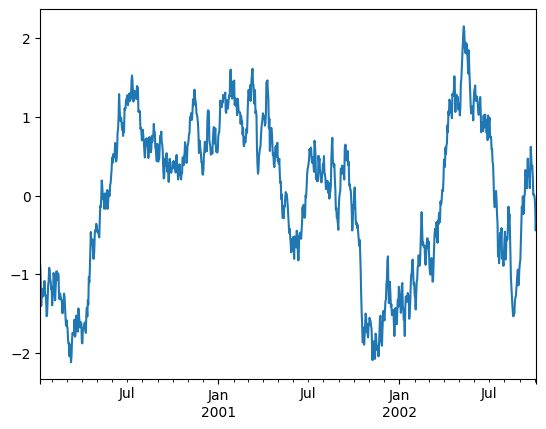

In [1350]:
transformed.plot()

In [1351]:
ts.groupby(lambda x: x.year).transform(lambda x: x.max() - x.min())

2000-01-08    0.879378
2000-01-09    0.879378
2000-01-10    0.879378
2000-01-11    0.879378
2000-01-12    0.879378
                ...   
2002-09-30    0.726825
2002-10-01    0.726825
2002-10-02    0.726825
2002-10-03    0.726825
2002-10-04    0.726825
Freq: D, Length: 1001, dtype: float64

In [1352]:
df_re = pd.DataFrame({"A": [1] * 10 + [5] * 10, "B": np.arange(20)})
df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [1353]:
df_re.groupby('A').rolling(4)

RollingGroupby [window=4,center=False,axis=0,method=single]

In [1354]:
df_re.groupby('A').rolling(4).mean()

B
A         
1 0    NaN
  1    NaN
  2    NaN
  3    1.5
  4    2.5
  5    3.5
  6    4.5
  7    5.5
  8    6.5
  9    7.5
5 10   NaN
  11   NaN
  12   NaN
  13  11.5
  14  12.5
  15  13.5
  16  14.5
  17  15.5
  18  16.5
  19  17.5

In [1355]:
df_re.groupby('A').rolling(4).B.mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [1356]:
df_re.groupby('A').rolling(1).sum()

B
A         
1 0    0.0
  1    1.0
  2    2.0
  3    3.0
  4    4.0
  5    5.0
  6    6.0
  7    7.0
  8    8.0
  9    9.0
5 10  10.0
  11  11.0
  12  12.0
  13  13.0
  14  14.0
  15  15.0
  16  16.0
  17  17.0
  18  18.0
  19  19.0

In [1357]:
df_re.groupby('A').rolling(4).apply(lambda x: x.max())

B
A         
1 0    NaN
  1    NaN
  2    NaN
  3    3.0
  4    4.0
  5    5.0
  6    6.0
  7    7.0
  8    8.0
  9    9.0
5 10   NaN
  11   NaN
  12   NaN
  13  13.0
  14  14.0
  15  15.0
  16  16.0
  17  17.0
  18  18.0
  19  19.0

In [1358]:
df_re.groupby('A').rolling(2).apply(lambda x: x.iloc[0])

B
A         
1 0    NaN
  1    0.0
  2    1.0
  3    2.0
  4    3.0
  5    4.0
  6    5.0
  7    6.0
  8    7.0
  9    8.0
5 10   NaN
  11  10.0
  12  11.0
  13  12.0
  14  13.0
  15  14.0
  16  15.0
  17  16.0
  18  17.0
  19  18.0

In [1359]:
df_re.groupby("A").expanding().sum()

B
A          
1 0     0.0
  1     1.0
  2     3.0
  3     6.0
  4    10.0
  5    15.0
  6    21.0
  7    28.0
  8    36.0
  9    45.0
5 10   10.0
  11   21.0
  12   33.0
  13   46.0
  14   60.0
  15   75.0
  16   91.0
  17  108.0
  18  126.0
  19  145.0

In [1360]:
df_re.groupby("A").expanding().apply(lambda x: x.sum())

B
A          
1 0     0.0
  1     1.0
  2     3.0
  3     6.0
  4    10.0
  5    15.0
  6    21.0
  7    28.0
  8    36.0
  9    45.0
5 10   10.0
  11   21.0
  12   33.0
  13   46.0
  14   60.0
  15   75.0
  16   91.0
  17  108.0
  18  126.0
  19  145.0

In [1361]:
df_re = pd.DataFrame(
    {
        "date": pd.date_range(start="2016-01-01", periods=4, freq="W"),
        "group": [1, 1, 2, 2],
        "val": [5, 6, 7, 8],
    }
).set_index("date")
df_re

,group,val
date,,
2016-01-03,1,5
2016-01-10,1,6
2016-01-17,2,7
2016-01-24,2,8


In [1362]:
df_re.groupby('group').resample('1D').ffill()

group  val
group date                  
1     2016-01-03      1    5
      2016-01-04      1    5
      2016-01-05      1    5
      2016-01-06      1    5
      2016-01-07      1    5
      2016-01-08      1    5
      2016-01-09      1    5
      2016-01-10      1    6
2     2016-01-17      2    7
      2016-01-18      2    7
      2016-01-19      2    7
      2016-01-20      2    7
      2016-01-21      2    7
      2016-01-22      2    7
      2016-01-23      2    7
      2016-01-24      2    8

In [1363]:
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [1364]:
speeds.groupby("class").nth(1)

,order,max_speed
class,,
bird,Psittaciformes,24.0
mammal,Primates,NaN


In [1365]:
speeds.groupby("class").nth([0, 1])

,order,max_speed
class,,
bird,Falconiformes,389.0
bird,Psittaciformes,24.0
mammal,Carnivora,80.2
mammal,Primates,NaN


In [1366]:
speeds.groupby("class").nth([-1])

,order,max_speed
class,,
bird,Psittaciformes,24.0
mammal,Carnivora,58.0


In [1367]:
speeds.groupby("class").head()

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [1368]:
sf = pd.Series([1, 1, 2, 3, 3, 3])
sf

0    1
1    1
2    2
3    3
4    3
5    3
dtype: int64

In [1369]:
sf.groupby(sf).count()

1    2
2    1
3    3
dtype: int64

In [1370]:
def filter_fn(x):
    print(x)
    print("-------------------------------------")
    return x.sum() > 2
sf.groupby(sf).filter(filter_fn)

0    1
1    1
dtype: int64
-------------------------------------
2    2
dtype: int64
-------------------------------------
3    3
4    3
5    3
dtype: int64
-------------------------------------


3    3
4    3
5    3
dtype: int64

In [1371]:
def filter_fn(x):
    return x.sum() > 58
sf.groupby(sf).filter(filter_fn)

Series([], dtype: int64)

In [1372]:
dff

,A,B,C
0,-0.868457,0.623410,0.754829
1,-1.148108,0.406926,-2.399002
2,-1.134634,-0.712058,0.405880
3,NaN,2.141675,-0.154637
4,NaN,NaN,1.880700
5,NaN,NaN,NaN
6,-0.456993,1.266971,NaN
7,-0.250812,-1.142630,NaN
8,-0.720401,1.091508,-0.128270
9,0.414953,1.793866,-0.926513


In [1373]:
dff.groupby("B").filter(lambda x: len(x) > 2, dropna=False)

,A,B,C
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [1374]:
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [1375]:
df.groupby("A").B.apply(lambda x: x.describe())

A       
1  count    4.000000
   mean     1.500000
   std      1.290994
   min      0.000000
   25%      0.750000
   50%      1.500000
   75%      2.250000
   max      3.000000
2  count    2.000000
   mean     4.500000
   std      0.707107
   min      4.000000
   25%      4.250000
   50%      4.500000
   75%      4.750000
   max      5.000000
3  count    2.000000
   mean     6.500000
   std      0.707107
   min      6.000000
   25%      6.250000
   50%      6.500000
   75%      6.750000
   max      7.000000
Name: B, dtype: float64

In [1376]:
grouped = df.groupby('A')['B']

def f(gr):
    print(gr)
    print("*" * 10)
    return gr
grouped.apply(f)

first  second
bar    one       0
       two       1
baz    one       2
       two       3
Name: 1, dtype: int64
**********
first  second
foo    one       4
       two       5
Name: 2, dtype: int64
**********
first  second
qux    one       6
       two       7
Name: 3, dtype: int64
**********


/tmp/ipykernel_1044/2952304546.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped.apply(f)


first  second
bar    one       0
       two       1
baz    one       2
       two       3
foo    one       4
       two       5
qux    one       6
       two       7
Name: B, dtype: int64

In [1377]:
grouped = df.groupby('A')['B']

def f(gr):
    
    return pd.DataFrame({'min': [gr.min(), gr.idxmin()], 'max': [gr.max(), gr.idxmax()]})
grouped.apply(f)

min         max
A                          
1 0           0           3
  1  (bar, one)  (baz, two)
2 0           4           5
  1  (foo, one)  (foo, two)
3 0           6           7
  1  (qux, one)  (qux, two)

In [1378]:
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [1379]:
df.groupby('A',).apply(lambda x: x)

/tmp/ipykernel_1044/1535063809.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby('A',).apply(lambda x: x)


A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [1380]:
df.groupby('A', group_keys=True).apply(lambda x: x)

A  B
A first second      
1 bar   one     1  0
        two     1  1
  baz   one     1  2
        two     1  3
2 foo   one     2  4
        two     2  5
3 qux   one     3  6
        two     3  7

In [1381]:
df.groupby('A', group_keys=False).apply(lambda x: x)

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [1382]:
df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6]], columns=["A", "B"])
g = df.groupby("A")

In [1383]:
df

,A,B
0,1,NaN
1,1,4.0
2,5,6.0


In [1384]:
g.nth(0)

,B
A,
1,NaN
5,6.0


In [1385]:
g.nth(0, dropna="any")

,B
A,
1,4.0
5,6.0


In [1386]:
business_dates = pd.date_range(start="4/1/2014", end="6/30/2014", freq="B")

df = pd.DataFrame(1, index=business_dates, columns=["a", "b"])
df

,a,b
2014-04-01,1,1
2014-04-02,1,1
2014-04-03,1,1
2014-04-04,1,1
2014-04-07,1,1
...,...,...
2014-06-24,1,1
2014-06-25,1,1
2014-06-26,1,1
2014-06-27,1,1


In [1387]:
df.groupby([df.index.year, df.index.month]).nth[1:, :-1]

a  b
2014 4  1  1
     4  1  1
     4  1  1
     4  1  1
     4  1  1
...    .. ..
     6  1  1
     6  1  1
     6  1  1
     6  1  1
     6  1  1

[65 rows x 2 columns]

In [1388]:
dfg = pd.DataFrame(list("aaabba"), columns=["A"])

dfg

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [1389]:
dfg.groupby('A').cumcount()

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [1390]:
dfg.groupby("A").cumcount(ascending=False)

0    3
1    2
2    1
3    1
4    0
5    0
dtype: int64

In [1391]:
dfg.groupby("A").ngroup()

0    0
1    0
2    0
3    1
4    1
5    0
dtype: int64

In [1392]:
dfg.groupby("A").ngroups

2

In [1393]:
df = pd.DataFrame(
    {
        "Store": np.random.choice(["Store_1", "Store_2"], n),
        "Product": np.random.choice(["Product_1", "Product_2"], n),
        "Revenue": (np.random.random(n) * 50 + 10).round(2),
        "Quantity": np.random.randint(1, 10, size=n),
    }
)
df

,Store,Product,Revenue,Quantity
0,Store_2,Product_1,26.26,9
1,Store_1,Product_2,55.34,8
2,Store_1,Product_2,41.77,6
3,Store_1,Product_1,56.57,1
4,Store_1,Product_1,54.96,4
5,Store_1,Product_1,41.85,1
6,Store_1,Product_1,53.32,9
7,Store_2,Product_1,10.63,7
8,Store_1,Product_1,39.90,2
9,Store_1,Product_2,48.65,6


In [1394]:
df.groupby(["Store", "Product"]).pipe(lambda grp: grp.Revenue.sum() / grp.Quantity.sum())

Store    Product  
Store_1  Product_1    14.505882
         Product_2     7.288000
Store_2  Product_1     2.305625
dtype: float64

In [1395]:
df['Revenue'].pipe(lambda x: x * 2)

0     52.52
1    110.68
2     83.54
3    113.14
4    109.92
5     83.70
6    106.64
7     21.26
8     79.80
9     97.30
Name: Revenue, dtype: float64

In [1396]:
df['Revenue'].apply(lambda x: x * 2)

0     52.52
1    110.68
2     83.54
3    113.14
4    109.92
5     83.70
6    106.64
7     21.26
8     79.80
9     97.30
Name: Revenue, dtype: float64

In [1397]:
df['Revenue'].map(lambda x: x * 2)

0     52.52
1    110.68
2     83.54
3    113.14
4    109.92
5     83.70
6    106.64
7     21.26
8     79.80
9     97.30
Name: Revenue, dtype: float64

In [1398]:
df.groupby(["Store", "Product"]).pipe(lambda grp: grp.Revenue.sum() / grp.Quantity.sum()).unstack().round(2)

Product,Product_1,Product_2
Store,,
Store_1,14.51,7.29
Store_2,2.31,NaN


In [1399]:
df = pd.DataFrame({"a": [1, 0, 0], "b": [0, 1, 0], "c": [1, 0, 0], "d": [2, 3, 4]})
df

,a,b,c,d
0,1,0,1,2
1,0,1,0,3
2,0,0,0,4


In [1400]:
df.groupby(df.sum(), axis=1).sum()

,1,9
0,2,2
1,1,3
2,0,4


## Windowing operations

In [1401]:
s = pd.Series(range(5))

In [1402]:
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [1403]:
s.rolling(window=2).sum()

0    NaN
1    1.0
2    3.0
3    5.0
4    7.0
dtype: float64

In [1404]:
for window in s.rolling(window=2):
    print(window)

0    0
dtype: int64
0    0
1    1
dtype: int64
1    1
2    2
dtype: int64
2    2
3    3
dtype: int64
3    3
4    4
dtype: int64


In [1405]:
s = pd.Series(range(5), index=pd.date_range('2020-01-01', periods=5, freq='1D'))
s

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
Freq: D, dtype: int64

In [1406]:
s.rolling(window='2D').sum()

2020-01-01    0.0
2020-01-02    1.0
2020-01-03    3.0
2020-01-04    5.0
2020-01-05    7.0
Freq: D, dtype: float64

In [1407]:
df = pd.DataFrame({'A': ['a', 'b', 'a', 'b', 'a'], 'B': range(5)})
df

,A,B
0,a,0
1,b,1
2,a,2
3,b,3
4,a,4


In [1408]:
df.groupby('A').expanding().sum()

B
A       
a 0  0.0
  2  2.0
  4  6.0
b 1  1.0
  3  4.0

In [1409]:
df = pd.DataFrame([[1, 2, 0.6], [2, 3, 0.4], [3, 4, 0.2], [4, 5, 0.7]])
df

,0,1,2
0,1,2,0.6
1,2,3,0.4
2,3,4,0.2
3,4,5,0.7


In [1410]:
def weighted_mean(x):
    print("X: ", x)
    arr = np.ones((1, x.shape[1]))
    arr[:, :2] = (x[:, :2] * x[:, 2]).sum(axis=0) / x[:, 2].sum()
    return arr
df.rolling(2, method="table", min_periods=0).apply(weighted_mean, raw=True, engine="numba")

X:  [[1.  2.  0.6]]
X:  [[1.  2.  0.6]
 [2.  3.  0.4]]
X:  [[2.  3.  0.4]
 [3.  4.  0.2]]
X:  [[3.  4.  0.2]
 [4.  5.  0.7]]


,0,1,2
0,1.000000,2.000000,1.0
1,1.800000,2.000000,1.0
2,3.333333,2.333333,1.0
3,1.555556,7.000000,1.0


In [1411]:
df = pd.DataFrame([[1, 2, 0.6], [2, 3, 0.4], [3, 4, 0.2], [4, 5, 0.7]])

df.ewm(0.5).mean()

,0,1,2
0,1.000000,2.000000,0.600000
1,1.750000,2.750000,0.450000
2,2.615385,3.615385,0.276923
3,3.550000,4.550000,0.562500


In [1412]:
s = pd.Series([np.nan, 1, 2, np.nan, np.nan, 3])
s

0    NaN
1    1.0
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [1413]:
s.rolling(window=3).sum()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
dtype: float64

In [1414]:
s.rolling(window=3, min_periods=1).sum()

0    NaN
1    1.0
2    3.0
3    3.0
4    2.0
5    3.0
dtype: float64

In [1415]:
s.rolling(window=3, min_periods=2).sum()

0    NaN
1    NaN
2    3.0
3    3.0
4    NaN
5    NaN
dtype: float64

In [1416]:
df = pd.DataFrame(
    {"x": 1},
    index=[
        pd.Timestamp("20130101 09:00:01"),
        pd.Timestamp("20130101 09:00:02"),
        pd.Timestamp("20130101 09:00:03"),
        pd.Timestamp("20130101 09:00:04"),
        pd.Timestamp("20130101 09:00:06"),
    ],
)


df["right"] = df.rolling("2s", closed="right").x.sum()  # default

df["both"] = df.rolling("2s", closed="both").x.sum()

df["left"] = df.rolling("2s", closed="left").x.sum()

df["neither"] = df.rolling("2s", closed="neither").x.sum()

df

,x,right,both,left,neither
2013-01-01 09:00:01,1,1.0,1.0,NaN,NaN
2013-01-01 09:00:02,1,2.0,2.0,1.0,1.0
2013-01-01 09:00:03,1,2.0,3.0,2.0,1.0
2013-01-01 09:00:04,1,2.0,3.0,2.0,1.0
2013-01-01 09:00:06,1,1.0,2.0,1.0,NaN


In [1417]:
def mad(x):
    print(x)
    return np.fabs(x - x.mean()).mean()


s = pd.Series(range(10))

s.rolling(window=4).apply(mad, raw=True)

[0. 1. 2. 3.]
[1. 2. 3. 4.]
[2. 3. 4. 5.]
[3. 4. 5. 6.]
[4. 5. 6. 7.]
[5. 6. 7. 8.]
[6. 7. 8. 9.]


0    NaN
1    NaN
2    NaN
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64